# <h1><center>PUC Minas - PONTIFÍCIA UNIVERSIDADE CATÓLICA DE MINAS GERAIS</center></h1>

<h2><center>Pós-Graduação em Ciência de Dados e Big Data</center></h2>

<h3><center>TRABALHO DE CONCLUSÃO DE CURSO</center><br>
TÍTULO:<br>
<br>
ALUNO: Wender Pereira Corrêa</h3>
Matrícula:
<p>Este notebook é referente ao Trabalho de Conclusão de Curso em Ciência de Dados e Big Data.</p>

#Leitura dos dados e importação das bibliotecas utilizadas

In [1]:
#IMPORTAÇÃO DAS BIBLIOTECAS
import pandas as pd
import numpy as np
import zipfile
import requests
from io import BytesIO
import os
import glob
import seaborn as sns
sns.set_style('whitegrid')
import time

In [2]:
#Importação da função Counter e da biblioteca matplotlib.pyplot
from collections import Counter
import matplotlib.pyplot as plt

In [3]:
#definição de configuração de dataframes
#pd.set_option('display.max_rows',1000)
#pd.set_option('display.max_columns',500)
#pd.set_option('display.width',1200)
#pd.set_option('display.precision',4)
#pd.set_option('display.expand_frame_repr',False)

In [4]:
#Plotação de um gráfico para mostrar a dispersão dos dados. 
#O % e inline significa que o gráfico será mostrado aqui no notebook, e não em um arquivo
%matplotlib inline

In [5]:
#Definindo a pasta de trabalho
dirCandidatoAnalise = "./candidatoAnalise"
dirCandidatoCassacaoAnalise = "./candidatoCassacaoAnalise" 
dirBemCandidato = "./bemCandidatoAnalise" 
 
os.makedirs(dirCandidatoAnalise, exist_ok=True)
os.makedirs(dirCandidatoCassacaoAnalise, exist_ok=True)
os.makedirs(dirBemCandidato, exist_ok=True)

In [6]:
def descompactar(nome_arquivo_compactado, diretorio):
    #Lê o arquivo compactado e extrai o conteúdo
    #print(nome_arquivo_compactado)
    filebytes = BytesIO(
        requests.get(nome_arquivo_compactado).content
    )
    myzip = zipfile.ZipFile(filebytes)
    myzip.extractall(diretorio)
    return "Concluído"

<b>1) Dados Politicos</b>

In [7]:
ca = 2014
while ca < 2022:
    urlCandidatoAnalise = "https://cdn.tse.jus.br/estatistica/sead/odsele/consulta_cand/consulta_cand_" + str(ca)+ ".zip"
    #descompactar(urlCandidatoAnalise,dirCandidatoAnalise)
    urlCandidatoCassacaoAnalise = "https://cdn.tse.jus.br/estatistica/sead/odsele/motivo_cassacao/motivo_cassacao_" + str(ca)+ ".zip"
    #descompactar(urlCandidatoCassacaoAnalise,dirCandidatoCassacaoAnalise)
    urlBemCandidatoAnalise = "https://cdn.tse.jus.br/estatistica/sead/odsele/bem_candidato/bem_candidato_" + str(ca)+ ".zip"
    #descompactar(urlBemCandidatoAnalise,dirBemCandidato)    
    ca+=2

<b>1) Dados Candidato</b>

In [8]:
print('Arquivos com extensão csv Candidato:')
concatenar = []
with os.scandir(dirCandidatoAnalise) as arqs:
    for arq in arqs:
        if arq.is_file() and  arq.name.endswith('.csv'):
             print(arq.name)
    path = dirCandidatoAnalise
    # csv files in the path
    files = glob.glob(path + "/*.csv")
    # defining an empty list to store 
    # content
    data_frame = pd.DataFrame()
    content = []
    # checking all the csv files in the 
    # specified path
    for filename in files:
        df = pd.read_csv(filename, encoding = "Latin 1", sep= ";", decimal = ',', 
            error_bad_lines=False,dtype={"SQ_CANDIDATO": int, "ANO_ELEICAO": int,"SG_UF" : "string", "NR_TURNO": int,"HH_GERACAO" : object ,"CD_TIPO_ELEICAO" : int,"NM_TIPO_ELEICAO" : "string","CD_ELEICAO" : "string","DS_ELEICAO" : "string","DT_ELEICAO" : "string","TP_ABRANGENCIA" : "string","SG_UE" : "string","NM_UE" : "string","CD_CARGO" : int,"DS_CARGO" : "string","NR_CANDIDATO" : int,"NM_CANDIDATO" : "string","NM_URNA_CANDIDATO" : "string","NM_SOCIAL_CANDIDATO" : "string","NR_CPF_CANDIDATO" : "string","NM_EMAIL" : "string","CD_SITUACAO_CANDIDATURA" : "string","DS_SITUACAO_CANDIDATURA" : "string","CD_DETALHE_SITUACAO_CAND" : "string","DS_DETALHE_SITUACAO_CAND" : "string","TP_AGREMIACAO" : "string","NR_PARTIDO" : int,"SG_PARTIDO" : "string","NM_PARTIDO" : "string","SQ_COLIGACAO" : "string","NM_COLIGACAO" : "string","DS_COMPOSICAO_COLIGACAO" : "string","CD_NACIONALIDADE" : int,"DS_NACIONALIDADE" : "string","SG_UF_NASCIMENTO" : "string","CD_MUNICIPIO_NASCIMENTO" : "string","NM_MUNICIPIO_NASCIMENTO" : "string","DT_NASCIMENTO" : "string","NR_IDADE_DATA_POSSE" : float ,"NR_TITULO_ELEITORAL_CANDIDATO" : "string","CD_GENERO" : int,"DS_GENERO" : "string","CD_GRAU_INSTRUCAO" : int,"DS_GRAU_INSTRUCAO" : "string","CD_ESTADO_CIVIL" : int,"DS_ESTADO_CIVIL" : "string","CD_OCUPACAO" : "string", "DS_OCUPACAO" : "string","VR_DESPESA_MAX_CAMPANHA" : "string","CD_SIT_TOT_TURNO" : "string","DS_SIT_TOT_TURNO" : "string","ST_REELEICAO" : "string","ST_DECLARAR_BENS" : "string","NR_PROTOCOLO_CANDIDATURA" : "string","NR_PROCESSO" : "string" ,"CD_SITUACAO_CANDIDATO_PLEITO" : "string","DS_SITUACAO_CANDIDATO_PLEITO" : "string","CD_SITUACAO_CANDIDATO_URNA" : "string", "DS_SITUACAO_CANDIDATO_URNA" : "string","ST_CANDIDATO_INSERIDO_URNA" : "string"})
        df.drop_duplicates()
        content.append(df)
    # converting content to data frame
    data_frame = pd.concat(content).drop_duplicates()

Arquivos com extensão csv Candidato:
consulta_cand_2014_AC.csv
consulta_cand_2014_AL.csv
consulta_cand_2014_AM.csv
consulta_cand_2014_AP.csv
consulta_cand_2014_BA.csv
consulta_cand_2014_BR.csv
consulta_cand_2014_BRASIL.csv
consulta_cand_2014_CE.csv
consulta_cand_2014_DF.csv
consulta_cand_2014_ES.csv
consulta_cand_2014_GO.csv
consulta_cand_2014_MA.csv
consulta_cand_2014_MG.csv
consulta_cand_2014_MS.csv
consulta_cand_2014_MT.csv
consulta_cand_2014_PA.csv
consulta_cand_2014_PB.csv
consulta_cand_2014_PE.csv
consulta_cand_2014_PI.csv
consulta_cand_2014_PR.csv
consulta_cand_2014_RJ.csv
consulta_cand_2014_RN.csv
consulta_cand_2014_RO.csv
consulta_cand_2014_RR.csv
consulta_cand_2014_RS.csv
consulta_cand_2014_SC.csv
consulta_cand_2014_SE.csv
consulta_cand_2014_SP.csv
consulta_cand_2014_TO.csv
consulta_cand_2016_AC.csv
consulta_cand_2016_AL.csv
consulta_cand_2016_AM.csv
consulta_cand_2016_AP.csv
consulta_cand_2016_BA.csv
consulta_cand_2016_BRASIL.csv
consulta_cand_2016_CE.csv
consulta_cand_2016_

In [9]:
data_frame.dtypes

DT_GERACAO                      object
HH_GERACAO                      object
ANO_ELEICAO                      int32
CD_TIPO_ELEICAO                  int32
NM_TIPO_ELEICAO                 string
                                 ...  
CD_SITUACAO_CANDIDATO_PLEITO    string
DS_SITUACAO_CANDIDATO_PLEITO    string
CD_SITUACAO_CANDIDATO_URNA      string
DS_SITUACAO_CANDIDATO_URNA      string
ST_CANDIDATO_INSERIDO_URNA      string
Length: 63, dtype: object

In [10]:
#Calcula o total e a % de valores ausentes
num_ausentes = data_frame.isna().sum()
porc_ausentes = data_frame.isna().sum() * 100 / len(data_frame)
df_ausentes = pd.DataFrame({
    'Coluna': data_frame.columns,
    'Dados ausentes': num_ausentes,
    'Porcentagem': porc_ausentes
})
df_ausentes

,Coluna,Dados ausentes,Porcentagem
DT_GERACAO,DT_GERACAO,0,0.0
HH_GERACAO,HH_GERACAO,0,0.0
ANO_ELEICAO,ANO_ELEICAO,0,0.0
CD_TIPO_ELEICAO,CD_TIPO_ELEICAO,0,0.0
NM_TIPO_ELEICAO,NM_TIPO_ELEICAO,0,0.0
...,...,...,...
CD_SITUACAO_CANDIDATO_PLEITO,CD_SITUACAO_CANDIDATO_PLEITO,0,0.0
DS_SITUACAO_CANDIDATO_PLEITO,DS_SITUACAO_CANDIDATO_PLEITO,0,0.0
CD_SITUACAO_CANDIDATO_URNA,CD_SITUACAO_CANDIDATO_URNA,0,0.0
DS_SITUACAO_CANDIDATO_URNA,DS_SITUACAO_CANDIDATO_URNA,0,0.0


,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,TP_ABRANGENCIA,...,DS_SIT_TOT_TURNO,ST_REELEICAO,ST_DECLARAR_BENS,NR_PROTOCOLO_CANDIDATURA,NR_PROCESSO,CD_SITUACAO_CANDIDATO_PLEITO,DS_SITUACAO_CANDIDATO_PLEITO,CD_SITUACAO_CANDIDATO_URNA,DS_SITUACAO_CANDIDATO_URNA,ST_CANDIDATO_INSERIDO_URNA
0,08/04/2021,11:38:25,2014,2,ELEIÇÃO ORDINÁRIA,1,143,Eleições Gerais 2014,05/10/2014,FEDERAL,...,SUPLENTE,N,S,54232014,3506420146010000,2,DEFERIDO,2,DEFERIDO,SIM
1,08/04/2021,11:38:25,2014,2,ELEIÇÃO ORDINÁRIA,1,143,Eleições Gerais 2014,05/10/2014,FEDERAL,...,SUPLENTE,N,S,56222014,5212120146010000,2,DEFERIDO,2,DEFERIDO,SIM
2,08/04/2021,11:38:25,2014,2,ELEIÇÃO ORDINÁRIA,1,143,Eleições Gerais 2014,05/10/2014,FEDERAL,...,SUPLENTE,N,S,54682014,3757720146010000,2,DEFERIDO,2,DEFERIDO,SIM
3,08/04/2021,11:38:25,2014,2,ELEIÇÃO ORDINÁRIA,1,143,Eleições Gerais 2014,05/10/2014,FEDERAL,...,SUPLENTE,N,S,55432014,4501920146010000,2,DEFERIDO,2,DEFERIDO,SIM
4,08/04/2021,11:38:25,2014,2,ELEIÇÃO ORDINÁRIA,1,143,Eleições Gerais 2014,05/10/2014,FEDERAL,...,SUPLENTE,N,N,55672014,4744720146010000,2,DEFERIDO,2,DEFERIDO,SIM


,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,TP_ABRANGENCIA,...,DS_SIT_TOT_TURNO,ST_REELEICAO,ST_DECLARAR_BENS,NR_PROTOCOLO_CANDIDATURA,NR_PROCESSO,CD_SITUACAO_CANDIDATO_PLEITO,DS_SITUACAO_CANDIDATO_PLEITO,CD_SITUACAO_CANDIDATO_URNA,DS_SITUACAO_CANDIDATO_URNA,ST_CANDIDATO_INSERIDO_URNA
558003,26/02/2022,07:32:12,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,...,ELEITO POR QP,N,S,-1,06003782920206240033,2,DEFERIDO,2,DEFERIDO,SIM
558004,26/02/2022,07:32:12,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,...,NÃO ELEITO,N,S,-1,06001765820206260401,2,DEFERIDO,2,DEFERIDO,SIM
558005,26/02/2022,07:32:12,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,...,ELEITO POR MÉDIA,S,S,-1,06003452920206260083,2,DEFERIDO,2,DEFERIDO,SIM
558006,26/02/2022,07:32:12,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,...,ELEITO,N,S,-1,06001334120206240090,2,DEFERIDO,2,DEFERIDO,SIM
558007,26/02/2022,07:32:12,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,...,NÃO ELEITO,N,S,-1,06007268020206260295,2,DEFERIDO,2,DEFERIDO,SIM


(array([ 26271.,      0.,      0., 498340.,      0.,      0.,  29180.,
             0.,      0., 558010.]),
 array([2014. , 2014.6, 2015.2, 2015.8, 2016.4, 2017. , 2017.6, 2018.2,
        2018.8, 2019.4, 2020. ]),
 <BarContainer object of 10 artists>)

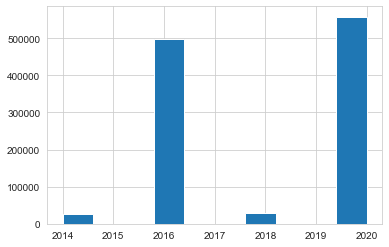

In [11]:
display(data_frame.head())
# Imprimindo as últimas linhas
display(data_frame.tail())
# Informações do nosso DataFrame
data_frame.describe()
# Dimensões do df_dados
data_frame.shape
plt.hist(x = data_frame['ANO_ELEICAO'])

<b> Matriz de correlação de atributos </b>

Text(-20.000000000000007, 0.5, 'características do núcleo da célula')

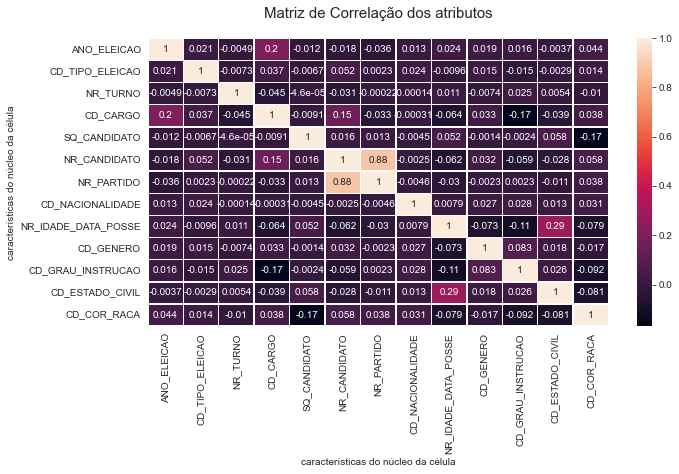

In [12]:
# O corr() método do Pandas DataFrame  é usado para calcular a matriz. 
# Por padrão, ele calcula o coeficiente de correlação de Pearson
correlation_mat = data_frame.corr(method='pearson')
# Definindo as configurações do Gráfico
fig = plt.figure(figsize=(8,4))
eixo = fig.add_axes([0, 0, 1, 1])
# Usando o método heatmap para traçar a Matriz
# O parâmetro ' annot=True' exibe os valores do coeficiente de correlação em cada célula.
sns.heatmap(correlation_mat, annot = True, linewidth=0.5)
# Definindo titulo e labels do gráfico
eixo.set_title('Matriz de Correlação dos atributos', fontsize=15, pad=20)
eixo.set_xlabel ("características do núcleo da célula")
eixo.set_ylabel ("características do núcleo da célula")

<b> 2 - Dados Cassação </b>

In [13]:
print('Arquivos com extensão csv Cassação:')
concatenar = []
with os.scandir(dirCandidatoCassacaoAnalise) as arqs:
    for arq in arqs:
        if arq.is_file() and  arq.name.endswith('.csv'):
             print(arq.name)
    path = dirCandidatoCassacaoAnalise
    # csv files in the path
    files = glob.glob(path + "/*.csv")
    # defining an empty list to store 
    # content
    data_frame_cassacao = pd.DataFrame()
    content_situacao = []
    # checking all the csv files in the 
    # specified path
    for filename in files:
        dfs = pd.read_csv(filename, encoding = "Latin 1", sep= ";", decimal = ',', error_bad_lines=False, dtype={"SQ_CANDIDATO": int, "ANO_ELEICAO": int})
        content_situacao.append(dfs)
    # converting content to data frame
    data_frame_cassacao = pd.concat(content_situacao).drop_duplicates()

Arquivos com extensão csv Cassação:
motivo_cassacao_2014_AC.csv
motivo_cassacao_2014_AL.csv
motivo_cassacao_2014_AM.csv
motivo_cassacao_2014_AP.csv
motivo_cassacao_2014_BA.csv
motivo_cassacao_2014_BR.csv
motivo_cassacao_2014_BRASIL.csv
motivo_cassacao_2014_CE.csv
motivo_cassacao_2014_DF.csv
motivo_cassacao_2014_ES.csv
motivo_cassacao_2014_GO.csv
motivo_cassacao_2014_MA.csv
motivo_cassacao_2014_MG.csv
motivo_cassacao_2014_MS.csv
motivo_cassacao_2014_MT.csv
motivo_cassacao_2014_PA.csv
motivo_cassacao_2014_PB.csv
motivo_cassacao_2014_PE.csv
motivo_cassacao_2014_PI.csv
motivo_cassacao_2014_PR.csv
motivo_cassacao_2014_RJ.csv
motivo_cassacao_2014_RN.csv
motivo_cassacao_2014_RO.csv
motivo_cassacao_2014_RR.csv
motivo_cassacao_2014_RS.csv
motivo_cassacao_2014_SC.csv
motivo_cassacao_2014_SE.csv
motivo_cassacao_2014_SP.csv
motivo_cassacao_2014_TO.csv
motivo_cassacao_2016_AC.csv
motivo_cassacao_2016_AL.csv
motivo_cassacao_2016_AM.csv
motivo_cassacao_2016_AP.csv
motivo_cassacao_2016_BA.csv
motivo_c

In [14]:
#Calcula o total e a % de valores ausentes
num_ausentes = data_frame_cassacao.isna().sum()
porc_ausentes = data_frame_cassacao.isna().sum() * 100 / len(data_frame_cassacao)
df_ausentes = pd.DataFrame({
    'Coluna': data_frame_cassacao.columns,
    'Dados ausentes': num_ausentes,
    'Porcentagem': porc_ausentes
})
df_ausentes

,Coluna,Dados ausentes,Porcentagem
DT_GERACAO,DT_GERACAO,0,0.0
HH_GERACAO,HH_GERACAO,0,0.0
ANO_ELEICAO,ANO_ELEICAO,0,0.0
CD_TIPO_ELEICAO,CD_TIPO_ELEICAO,0,0.0
NM_TIPO_ELEICAO,NM_TIPO_ELEICAO,0,0.0
CD_ELEICAO,CD_ELEICAO,0,0.0
DS_ELEICAO,DS_ELEICAO,0,0.0
SG_UF,SG_UF,0,0.0
SG_UE,SG_UE,0,0.0
NM_UE,NM_UE,0,0.0


,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,CD_ELEICAO,DS_ELEICAO,SG_UF,SG_UE,NM_UE,SQ_CANDIDATO,DS_MOTIVO_CASSACAO
0,05/04/2021,18:39:43,2014,1,Eleição Suplementar,268,Eleição Suplementar Governador AM,AM,AM,AMAZONAS,1345306401,Ausência de requisito de registro
1,05/04/2021,18:39:43,2014,1,Eleição Suplementar,268,Eleição Suplementar Governador AM,AM,AM,AMAZONAS,1345306408,Ficha limpa (LC 64/90)
1,05/04/2021,18:39:43,2014,1,Eleição Suplementar,304,Eleição Suplementar Governador - TO,TO,TO,TOCANTINS,-582929209,Ausência de requisito de registro
2,05/04/2021,18:39:43,2014,1,Eleição Suplementar,304,Eleição Suplementar Governador - TO,TO,TO,TOCANTINS,-582929208,Ausência de requisito de registro
3,05/04/2021,18:39:43,2014,1,Eleição Suplementar,304,Eleição Suplementar Governador - TO,TO,TO,TOCANTINS,-582929203,Ausência de requisito de registro


,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,CD_ELEICAO,DS_ELEICAO,SG_UF,SG_UE,NM_UE,SQ_CANDIDATO,DS_MOTIVO_CASSACAO
18143,26/02/2022,07:40:13,2020,2,Eleição Ordinária,426,Eleições Municipais 2020,MG,46094,ILICÍNEA,1152245766,Ausência de requisito de registro
18145,26/02/2022,07:40:13,2020,2,Eleição Ordinária,426,Eleições Municipais 2020,SP,62359,BOCAINA,892716418,Ausência de requisito de registro
18146,26/02/2022,07:40:13,2020,2,Eleição Ordinária,426,Eleições Municipais 2020,PA,4332,BRAGANÇA,-1732656223,Indeferimento de partido ou coligação.
18147,26/02/2022,07:40:13,2020,2,Eleição Ordinária,426,Eleições Municipais 2020,ES,56308,GOVERNADOR LINDENBERG,-1603432016,Ausência de requisito de registro
18148,26/02/2022,07:40:13,2020,2,Eleição Ordinária,426,Eleições Municipais 2020,SP,68535,PERUÍBE,892821909,Ficha limpa (LC 64/90)


(array([5.0000e+00, 0.0000e+00, 0.0000e+00, 1.9170e+04, 0.0000e+00,
        0.0000e+00, 2.6010e+03, 0.0000e+00, 0.0000e+00, 1.8149e+04]),
 array([2014. , 2014.6, 2015.2, 2015.8, 2016.4, 2017. , 2017.6, 2018.2,
        2018.8, 2019.4, 2020. ]),
 <BarContainer object of 10 artists>)

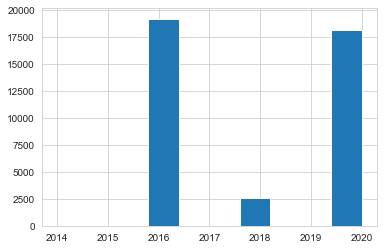

In [15]:
display(data_frame_cassacao.head())
# Imprimindo as últimas linhas
display(data_frame_cassacao.tail())
# Informações do nosso DataFrame
data_frame_cassacao.describe()
# Dimensões do df_dados
data_frame_cassacao.shape
plt.hist(x = data_frame_cassacao['ANO_ELEICAO'])

<b> Dados dos Bens do Candidatos </b>

In [16]:
print('Arquivos com extensão csv Bens:')
concatenar = []
with os.scandir(dirBemCandidato) as arqs:
    for arq in arqs:
        if arq.is_file() and  arq.name.endswith('.csv'):
             print(arq.name)
    path = dirBemCandidato
    # csv files in the path
    files = glob.glob(path + "/*.csv")
    # defining an empty list to store 
    # content
    data_frame_Bem_candidato = pd.DataFrame()
    content_situacao_bem = []
    # checking all the csv files in the 
    # specified path
    for filename in files:
        dfsb = pd.read_csv(filename, encoding = "Latin 1", sep= ";", decimal = ',', error_bad_lines=False, dtype={"SQ_CANDIDATO": int, "ANO_ELEICAO": int})
        content_situacao_bem.append(dfsb)
    # converting content to data frame
    data_frame_Bem_candidato = pd.concat(content_situacao_bem).drop_duplicates()

Arquivos com extensão csv Bens:
bem_candidato_2014_AC.csv
bem_candidato_2014_AL.csv
bem_candidato_2014_AM.csv
bem_candidato_2014_AP.csv
bem_candidato_2014_BA.csv
bem_candidato_2014_BR.csv
bem_candidato_2014_BRASIL.csv
bem_candidato_2014_CE.csv
bem_candidato_2014_DF.csv
bem_candidato_2014_ES.csv
bem_candidato_2014_GO.csv
bem_candidato_2014_MA.csv
bem_candidato_2014_MG.csv
bem_candidato_2014_MS.csv
bem_candidato_2014_MT.csv
bem_candidato_2014_PA.csv
bem_candidato_2014_PB.csv
bem_candidato_2014_PE.csv
bem_candidato_2014_PI.csv
bem_candidato_2014_PR.csv
bem_candidato_2014_RJ.csv
bem_candidato_2014_RN.csv
bem_candidato_2014_RO.csv
bem_candidato_2014_RR.csv
bem_candidato_2014_RS.csv
bem_candidato_2014_SC.csv
bem_candidato_2014_SE.csv
bem_candidato_2014_SP.csv
bem_candidato_2014_TO.csv
bem_candidato_2016_AC.csv
bem_candidato_2016_AL.csv
bem_candidato_2016_AM.csv
bem_candidato_2016_AP.csv
bem_candidato_2016_BA.csv
bem_candidato_2016_BRASIL.csv
bem_candidato_2016_CE.csv
bem_candidato_2016_ES.cs

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,SG_UF,SG_UE,NM_UE,SQ_CANDIDATO,NR_ORDEM_CANDIDATO,CD_TIPO_BEM_CANDIDATO,DS_TIPO_BEM_CANDIDATO,DS_BEM_CANDIDATO,VR_BEM_CANDIDATO,DT_ULTIMA_ATUALIZACAO,HH_ULTIMA_ATUALIZACAO
0,05/04/2021,18:39:13,2014,2,Eleição Ordinária,143,Eleições Gerais 2014,05/10/2014,AC,AC,ACRE,1410065574,23,41,Caderneta de poupança,OUROCAP TORCIDA PU,2552.25,12/07/2018,16:36:00
1,05/04/2021,18:39:13,2014,2,Eleição Ordinária,143,Eleições Gerais 2014,05/10/2014,AC,AC,ACRE,1410065722,1,32,Quotas ou quinhões de capital,PARTICIPAÇÃO DE 20% NA FIRMA AS U DE CASTRO LI...,8000.00,12/07/2018,16:36:00
2,05/04/2021,18:39:13,2014,2,Eleição Ordinária,143,Eleições Gerais 2014,05/10/2014,AC,AC,ACRE,1410065869,1,19,Outros bens imóveis,PROPRIETÁRIO DA EMPRESA E S DE MELO - CNPJ 04....,100000.00,12/07/2018,16:36:00
3,05/04/2021,18:39:13,2014,2,Eleição Ordinária,143,Eleições Gerais 2014,05/10/2014,AC,AC,ACRE,1410065409,4,61,Depósito bancário em conta corrente no País,SALDO EM CONTA BANCÁRIA (BANCO DO BRASIL),937.91,12/07/2018,16:36:00
4,05/04/2021,18:39:13,2014,2,Eleição Ordinária,143,Eleições Gerais 2014,05/10/2014,AC,AC,ACRE,1410065627,3,32,Quotas ou quinhões de capital,CLINICA MÉDICA,600000.00,12/07/2018,16:36:00


,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,SG_UF,SG_UE,NM_UE,SQ_CANDIDATO,NR_ORDEM_CANDIDATO,CD_TIPO_BEM_CANDIDATO,DS_TIPO_BEM_CANDIDATO,DS_BEM_CANDIDATO,VR_BEM_CANDIDATO,DT_ULTIMA_ATUALIZACAO,HH_ULTIMA_ATUALIZACAO
1013913,28/02/2022,07:30:45,2020,2,Eleição Ordinária,426,Eleições Municipais 2020,15/11/2020,CE,14176,IPU,-128342282,1,13,Terreno,"UM TERRENO LOCALZIADO NA TRAVESSA IBIAPABA, CA...",200000.0,15/11/2020,22:52:18
1013914,28/02/2022,07:30:45,2020,2,Eleição Ordinária,426,Eleições Municipais 2020,15/11/2020,MT,89931,SÃO JOSÉ DOS QUATRO MARCOS,-1667922591,3,29,Outros bens móveis,Bovino 13 a 24 meses Femea 4,7200.0,15/11/2020,22:37:08
1013915,28/02/2022,07:30:45,2020,2,Eleição Ordinária,426,Eleições Municipais 2020,15/11/2020,MG,45950,IBIRITÉ,1152227231,1,12,Casa,Casa,150000.0,30/10/2020,15:48:13
1013917,28/02/2022,07:30:45,2020,2,Eleição Ordinária,426,Eleições Municipais 2020,15/11/2020,MG,52558,SÃO JOÃO EVANGELISTA,1152242648,3,21,"Veículo automotor terrestre: caminhão, automóv...",I 30 2010,30000.0,17/11/2020,15:52:44
1013918,28/02/2022,07:30:45,2020,2,Eleição Ordinária,426,Eleições Municipais 2020,15/11/2020,PA,4537,CONCEIÇÃO DO ARAGUAIA,-1732827553,1,32,Quotas ou quinhões de capital,70% DO CAPITAL SOCIAL DA EMPRESA TRANSAQUINO T...,350000.0,06/08/2021,11:30:41


(array([  83053.,       0.,       0.,  977510.,       0.,       0.,
          93546.,       0.,       0., 1013919.]),
 array([2014. , 2014.6, 2015.2, 2015.8, 2016.4, 2017. , 2017.6, 2018.2,
        2018.8, 2019.4, 2020. ]),
 <BarContainer object of 10 artists>)

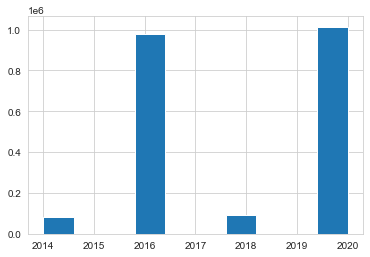

In [17]:
display(data_frame_Bem_candidato.head())
# Imprimindo as últimas linhas
display(data_frame_Bem_candidato.tail())
# Informações do nosso DataFrame
data_frame_Bem_candidato.describe()
# Dimensões do df_dados
data_frame_Bem_candidato.shape
#CD_TIPO_BEM_CANDIDATO,DS_TIPO_BEM_CANDIDATO,DS_BEM_CANDIDATO,VR_BEM_CANDIDATO
plt.hist(x = data_frame_Bem_candidato['ANO_ELEICAO'])

<b>ANÁLISE DADOS</b>

<b> Agrupamento de dados selecionando dados de interesse: </b> Dados do candidato 

In [18]:
#Seleção das colunas de interesse
df_consulta_candidato = data_frame[['SQ_CANDIDATO','ANO_ELEICAO','NR_CANDIDATO', 'NM_CANDIDATO', 'DS_CARGO','NR_PARTIDO','SG_PARTIDO','SG_UF','SG_UE','DS_SIT_TOT_TURNO','NR_IDADE_DATA_POSSE','DS_GENERO', 'DS_GRAU_INSTRUCAO','DS_ESTADO_CIVIL','DS_COR_RACA','DS_SIT_TOT_TURNO','ST_REELEICAO', 'TP_ABRANGENCIA','DS_SIT_TOT_TURNO','ST_REELEICAO','ST_DECLARAR_BENS','CD_GENERO','CD_GRAU_INSTRUCAO','DS_SITUACAO_CANDIDATURA', 'DT_NASCIMENTO']]

In [19]:
#Seleção das colunas de interesse
df_consulta_cassacao = data_frame_cassacao[['SQ_CANDIDATO','ANO_ELEICAO','DS_MOTIVO_CASSACAO']]
display(df_consulta_cassacao.head())
# Imprimindo as últimas linhas
display(df_consulta_cassacao.tail())
# Informações do nosso DataFrame
df_consulta_cassacao.describe()

,SQ_CANDIDATO,ANO_ELEICAO,DS_MOTIVO_CASSACAO
0,1345306401,2014,Ausência de requisito de registro
1,1345306408,2014,Ficha limpa (LC 64/90)
1,-582929209,2014,Ausência de requisito de registro
2,-582929208,2014,Ausência de requisito de registro
3,-582929203,2014,Ausência de requisito de registro


,SQ_CANDIDATO,ANO_ELEICAO,DS_MOTIVO_CASSACAO
18143,1152245766,2020,Ausência de requisito de registro
18145,892716418,2020,Ausência de requisito de registro
18146,-1732656223,2020,Indeferimento de partido ou coligação.
18147,-1603432016,2020,Ausência de requisito de registro
18148,892821909,2020,Ficha limpa (LC 64/90)


,SQ_CANDIDATO,ANO_ELEICAO
count,3.992500e+04,39925.000000
mean,2.045738e+07,2017.948353
std,1.180919e+09,1.933479
min,-1.993005e+09,2014.000000
25%,-1.538369e+09,2016.000000
50%,8.919356e+08,2018.000000
75%,1.022686e+09,2020.000000
max,1.411339e+09,2020.000000


<b> Agrupamento de dados selecionando dados de interesse: </b>Dados do Cassação 

In [20]:
m_df_candidato_cassacao = pd.merge(df_consulta_candidato, df_consulta_cassacao, on=['SQ_CANDIDATO','ANO_ELEICAO'], how="left")

In [21]:
display(m_df_candidato_cassacao.head())
# Imprimindo as últimas linhas
display(m_df_candidato_cassacao.tail())
# Informações do nosso DataFrame
m_df_candidato_cassacao.describe()

,SQ_CANDIDATO,ANO_ELEICAO,NR_CANDIDATO,NM_CANDIDATO,DS_CARGO,NR_PARTIDO,SG_PARTIDO,SG_UF,SG_UE,DS_SIT_TOT_TURNO,...,ST_REELEICAO,TP_ABRANGENCIA,DS_SIT_TOT_TURNO,ST_REELEICAO,ST_DECLARAR_BENS,CD_GENERO,CD_GRAU_INSTRUCAO,DS_SITUACAO_CANDIDATURA,DT_NASCIMENTO,DS_MOTIVO_CASSACAO
0,1410065661,2014,54444,GILDOMAR OLIVEIRA GOMES,DEPUTADO ESTADUAL,54,PPL,AC,AC,SUPLENTE,...,N,FEDERAL,SUPLENTE,N,S,2,7,APTO,16/09/1972,NaN
1,1410065850,2014,40140,WILSON DE MELO LUNA,DEPUTADO ESTADUAL,40,PSB,AC,AC,SUPLENTE,...,N,FEDERAL,SUPLENTE,N,S,2,4,APTO,06/04/1971,NaN
2,1410065722,2014,11223,KIEFER ROBERTO CAVALCANTE LIMA,DEPUTADO ESTADUAL,11,PP,AC,AC,SUPLENTE,...,N,FEDERAL,SUPLENTE,N,S,2,2,APTO,16/09/1968,NaN
3,1410065737,2014,43777,FRANCINEUDO SOUZA DA COSTA,DEPUTADO ESTADUAL,43,PV,AC,AC,SUPLENTE,...,N,FEDERAL,SUPLENTE,N,S,2,8,APTO,01/10/1985,NaN
4,1410065799,2014,43250,MICHELE SARAIVA SAMPAIO,DEPUTADO ESTADUAL,43,PV,AC,AC,SUPLENTE,...,N,FEDERAL,SUPLENTE,N,N,4,8,APTO,19/04/1977,NaN


,SQ_CANDIDATO,ANO_ELEICAO,NR_CANDIDATO,NM_CANDIDATO,DS_CARGO,NR_PARTIDO,SG_PARTIDO,SG_UF,SG_UE,DS_SIT_TOT_TURNO,...,ST_REELEICAO,TP_ABRANGENCIA,DS_SIT_TOT_TURNO,ST_REELEICAO,ST_DECLARAR_BENS,CD_GENERO,CD_GRAU_INSTRUCAO,DS_SITUACAO_CANDIDATURA,DT_NASCIMENTO,DS_MOTIVO_CASSACAO
1114719,-517292105,2020,11456,ALBERTINO VIEL,VEREADOR,11,PP,SC,83615,ELEITO POR QP,...,N,MUNICIPAL,ELEITO POR QP,N,S,2,3,APTO,20/05/1962,NaN
1114720,893008355,2020,51003,MARIA APARECIDA ALVES DOS SANTOS GARCIA,VEREADOR,51,PATRIOTA,SP,64157,NÃO ELEITO,...,N,MUNICIPAL,NÃO ELEITO,N,S,4,8,APTO,24/12/1987,NaN
1114721,892987285,2020,22333,CLENIL MENDES DOS SANTOS,VEREADOR,22,PL,SP,68950,ELEITO POR MÉDIA,...,S,MUNICIPAL,ELEITO POR MÉDIA,S,S,2,8,APTO,22/11/1961,NaN
1114722,-517470358,2020,22,HILARIO REFFATTI,PREFEITO,22,PL,SC,81515,ELEITO,...,N,MUNICIPAL,ELEITO,N,S,2,8,APTO,20/07/1949,NaN
1114723,893049816,2020,65171,ROMILDO SILVESTRE REZENDE DA SILVA,VEREADOR,65,PC do B,SP,68535,NÃO ELEITO,...,N,MUNICIPAL,NÃO ELEITO,N,S,2,4,APTO,03/08/1974,NaN


,SQ_CANDIDATO,ANO_ELEICAO,NR_CANDIDATO,NR_PARTIDO,NR_IDADE_DATA_POSSE,CD_GENERO,CD_GRAU_INSTRUCAO
count,1.114724e+06,1.114724e+06,1.114724e+06,1.114724e+06,1.114651e+06,1.114724e+06,1.114724e+06
mean,3.638329e+07,2.018013e+03,2.886408e+04,3.108859e+01,4.531814e+01,2.652535e+00,5.703951e+00
std,1.143599e+09,2.043658e+00,2.132544e+04,2.033771e+01,1.198006e+01,9.393679e-01,1.778375e+00
min,-1.993005e+09,2.014000e+03,1.000000e+01,1.000000e+01,-9.510000e+02,-4.000000e+00,-4.000000e+00
25%,-5.829339e+08,2.016000e+03,1.322200e+04,1.400000e+01,3.700000e+01,2.000000e+00,4.000000e+00
50%,8.919058e+08,2.020000e+03,2.212500e+04,2.300000e+01,4.500000e+01,2.000000e+00,6.000000e+00
75%,1.086245e+09,2.020000e+03,4.400000e+04,4.500000e+01,5.300000e+01,4.000000e+00,7.000000e+00
max,1.411349e+09,2.020000e+03,9.099900e+04,9.000000e+01,9.990000e+02,4.000000e+00,8.000000e+00


<b> Tratamento dos dados da Idade </b>

In [22]:
#removendo dados com todas linhas faltando dados
m_df_candidato_cassacao.dropna(how='all', inplace=True)
#descobrindo a idade média
mediaIdade = round(m_df_candidato_cassacao['NR_IDADE_DATA_POSSE'].mean(),0)
print(mediaIdade)
# Preenchendo a coluna com o valor da média:
m_df_candidato_cassacao.update(m_df_candidato_cassacao['NR_IDADE_DATA_POSSE'].fillna(mediaIdade))
# Dimensões do df_dados
m_df_candidato_cassacao.shape

45.0


(1114724, 26)

In [23]:
m_df_candidato_cassacao['NR_IDADE_DATA_POSSE'].describe().astype('int')

count    1114724
mean          45
std           11
min         -951
25%           37
50%           45
75%           53
max          999
Name: NR_IDADE_DATA_POSSE, dtype: int32

<b> Criação de DataSet com dados para tratamento de distorções: </b>

In [24]:
idade_max = m_df_candidato_cassacao[m_df_candidato_cassacao['NR_IDADE_DATA_POSSE'] > 104]
idade_min = m_df_candidato_cassacao[m_df_candidato_cassacao['NR_IDADE_DATA_POSSE'] < 18]

In [25]:
#Seleção das colunas de interesse
df_ida_max = idade_max[['ANO_ELEICAO','SG_UF','NR_CANDIDATO','NR_IDADE_DATA_POSSE','DT_NASCIMENTO','NM_CANDIDATO','DT_NASCIMENTO']]
df_ida_max

,ANO_ELEICAO,SG_UF,NR_CANDIDATO,NR_IDADE_DATA_POSSE,DT_NASCIMENTO,NM_CANDIDATO,DT_NASCIMENTO
40476,2016,AM,12345,944.0,09/04/1072,NAILSON ALVES DE CAMPOS,09/04/1072
41781,2016,AM,45888,999.0,31/01/0976,MARIA IZABEL PINTO BARBOSA,31/01/0976
42443,2016,AM,45000,999.0,27/09/0072,LUCAS DOS SANTOS CORREA,27/09/0072
43467,2016,AM,40333,999.0,30/03/0970,ERISVALDO FERREIRA TAVARES,30/03/0970
148418,2016,MG,22456,999.0,21/08/0065,REINALDO DUARTE FERNANDES,21/08/0065
233986,2016,PE,21021,999.0,28/09/0076,TATIANO PATRICIO DA COSTA CUNHA,28/09/0076
353182,2016,RR,55111,999.0,01/04/0082,VANDERSON ANTONIO PORTO CAMPOS,01/04/0082
377845,2016,RS,15,967.0,27/05/1049,ALAOR PASTORIZA RIBEIRO,27/05/1049
544411,2018,PA,10700,825.0,26/12/1193,MAURO CEZAR MELO RIBEIRO,26/12/1193
544412,2018,PA,10700,825.0,26/12/1193,MAURO CEZAR MELO RIBEIRO,26/12/1193


Fonte: Repositório de dados eleitorais ( https://www.tse.jus.br/hotsites/catalogo-publicacoes/pdf/relatorio_eleicoes/relatorio-eleicoes-2014.pdf ) Relatório das Eleições 2014
Parte III – Um Olhar Infográfico - 52 considerou idades com Inválidas e sem tratamentos

In [26]:
#Seleção das colunas de interesse
df_ida_min = idade_min[['ANO_ELEICAO','SG_UF','NR_CANDIDATO','NR_IDADE_DATA_POSSE','DT_NASCIMENTO','NM_CANDIDATO','DT_NASCIMENTO']]
df_ida_min

,ANO_ELEICAO,SG_UF,NR_CANDIDATO,NR_IDADE_DATA_POSSE,DT_NASCIMENTO,NM_CANDIDATO,DT_NASCIMENTO
111287,2016,CE,51200,12.0,13/12/2004,FRANCISCO FABIO GUEDES UCHÔA,13/12/2004
119728,2016,MS,55222,-951.0,12/12/2968,JAIME CARDOSO DA CRUZ,12/12/2968
572215,2020,AM,27206,17.0,24/02/2003,FRANCINEIA OLIVEIRA DE SOUZA,24/02/2003
682854,2020,PA,10700,17.0,30/06/2003,DEYSE ADRIELE DA SILVA SARMANHO,30/06/2003
879018,2020,PE,36111,16.0,03/03/2004,LUIZ ALMEIDA,03/03/2004


In [27]:
for index, row in df_ida_max.iterrows():
    m_df_candidato_cassacao.at[index , 'NR_IDADE_DATA_POSSE' ] = mediaIdade
    print(index)
    print('Candidato: ' + str(row['NR_CANDIDATO']))
    print('Nome: ' + str(row['NM_CANDIDATO']))
    print('Data Nascimento: ' + str(row['DT_NASCIMENTO']))
    print('Idade Antiga: ' + str(row['NR_IDADE_DATA_POSSE']))
    print('Idade Aualizada: ' + str(mediaIdade))
    print('--------------------------------------')

40476
Candidato: 12345
Nome: NAILSON ALVES DE CAMPOS
Data Nascimento: DT_NASCIMENTO    09/04/1072
DT_NASCIMENTO    09/04/1072
Name: 40476, dtype: object
Idade Antiga: 944.0
Idade Aualizada: 45.0
--------------------------------------
41781
Candidato: 45888
Nome: MARIA IZABEL PINTO BARBOSA
Data Nascimento: DT_NASCIMENTO    31/01/0976
DT_NASCIMENTO    31/01/0976
Name: 41781, dtype: object
Idade Antiga: 999.0
Idade Aualizada: 45.0
--------------------------------------
42443
Candidato: 45000
Nome: LUCAS DOS SANTOS CORREA
Data Nascimento: DT_NASCIMENTO    27/09/0072
DT_NASCIMENTO    27/09/0072
Name: 42443, dtype: object
Idade Antiga: 999.0
Idade Aualizada: 45.0
--------------------------------------
43467
Candidato: 40333
Nome: ERISVALDO FERREIRA TAVARES
Data Nascimento: DT_NASCIMENTO    30/03/0970
DT_NASCIMENTO    30/03/0970
Name: 43467, dtype: object
Idade Antiga: 999.0
Idade Aualizada: 45.0
--------------------------------------
148418
Candidato: 22456
Nome: REINALDO DUARTE FERNANDES
Da

In [28]:
for index, row in df_ida_min.iterrows():
    m_df_candidato_cassacao.at[index , 'NR_IDADE_DATA_POSSE' ] = 18
    print(index)
    print('Candidato: ' + str(row['NR_CANDIDATO']))
    print('Nome: ' + str(row['NM_CANDIDATO']))
    print('Data Nascimento: ' + str(row['DT_NASCIMENTO']))
    print('Idade Antiga: ' + str(row['NR_IDADE_DATA_POSSE']))
    print('Idade Aualizada: ' + str('18'))
    print('--------------------------------------')

111287
Candidato: 51200
Nome: FRANCISCO FABIO GUEDES UCHÔA
Data Nascimento: DT_NASCIMENTO    13/12/2004
DT_NASCIMENTO    13/12/2004
Name: 111287, dtype: object
Idade Antiga: 12.0
Idade Aualizada: 18
--------------------------------------
119728
Candidato: 55222
Nome: JAIME CARDOSO DA CRUZ
Data Nascimento: DT_NASCIMENTO    12/12/2968
DT_NASCIMENTO    12/12/2968
Name: 119728, dtype: object
Idade Antiga: -951.0
Idade Aualizada: 18
--------------------------------------
572215
Candidato: 27206
Nome: FRANCINEIA OLIVEIRA DE SOUZA
Data Nascimento: DT_NASCIMENTO    24/02/2003
DT_NASCIMENTO    24/02/2003
Name: 572215, dtype: object
Idade Antiga: 17.0
Idade Aualizada: 18
--------------------------------------
682854
Candidato: 10700
Nome: DEYSE ADRIELE DA SILVA SARMANHO
Data Nascimento: DT_NASCIMENTO    30/06/2003
DT_NASCIMENTO    30/06/2003
Name: 682854, dtype: object
Idade Antiga: 17.0
Idade Aualizada: 18
--------------------------------------
879018
Candidato: 36111
Nome: LUIZ ALMEIDA
Data Na

In [29]:
m_df_candidato_cassacao[m_df_candidato_cassacao['NR_IDADE_DATA_POSSE'] > 104]

,SQ_CANDIDATO,ANO_ELEICAO,NR_CANDIDATO,NM_CANDIDATO,DS_CARGO,NR_PARTIDO,SG_PARTIDO,SG_UF,SG_UE,DS_SIT_TOT_TURNO,...,ST_REELEICAO,TP_ABRANGENCIA,DS_SIT_TOT_TURNO,ST_REELEICAO,ST_DECLARAR_BENS,CD_GENERO,CD_GRAU_INSTRUCAO,DS_SITUACAO_CANDIDATURA,DT_NASCIMENTO,DS_MOTIVO_CASSACAO


In [30]:
m_df_candidato_cassacao[m_df_candidato_cassacao['NR_IDADE_DATA_POSSE'] < 18]

,SQ_CANDIDATO,ANO_ELEICAO,NR_CANDIDATO,NM_CANDIDATO,DS_CARGO,NR_PARTIDO,SG_PARTIDO,SG_UF,SG_UE,DS_SIT_TOT_TURNO,...,ST_REELEICAO,TP_ABRANGENCIA,DS_SIT_TOT_TURNO,ST_REELEICAO,ST_DECLARAR_BENS,CD_GENERO,CD_GRAU_INSTRUCAO,DS_SITUACAO_CANDIDATURA,DT_NASCIMENTO,DS_MOTIVO_CASSACAO


In [31]:
m_df_candidato_cassacao['NR_IDADE_DATA_POSSE'].describe().astype('int')

count    1114724
mean          45
std           11
min           18
25%           37
50%           45
75%           53
max          101
Name: NR_IDADE_DATA_POSSE, dtype: int32

In [32]:
#Calcula o total e a % de valores ausentes
num_ausentes = m_df_candidato_cassacao.isna().sum()
porc_ausentes = m_df_candidato_cassacao.isna().sum() * 100 / len(m_df_candidato_cassacao)
df_ausentes = pd.DataFrame({
    'Coluna': m_df_candidato_cassacao.columns,
    'Dados ausentes': num_ausentes,
    'Porcentagem': porc_ausentes
})
df_ausentes

,Coluna,Dados ausentes,Porcentagem
SQ_CANDIDATO,SQ_CANDIDATO,0,0.000000
ANO_ELEICAO,ANO_ELEICAO,0,0.000000
NR_CANDIDATO,NR_CANDIDATO,0,0.000000
NM_CANDIDATO,NM_CANDIDATO,0,0.000000
DS_CARGO,DS_CARGO,0,0.000000
NR_PARTIDO,NR_PARTIDO,0,0.000000
SG_PARTIDO,SG_PARTIDO,0,0.000000
SG_UF,SG_UF,0,0.000000
SG_UE,SG_UE,0,0.000000
DS_SIT_TOT_TURNO,DS_SIT_TOT_TURNO,0,0.000000


In [33]:
data_frame['SQ_CANDIDATO'].unique()
data_frame.dtypes

DT_GERACAO                      object
HH_GERACAO                      object
ANO_ELEICAO                      int32
CD_TIPO_ELEICAO                  int32
NM_TIPO_ELEICAO                 string
                                 ...  
CD_SITUACAO_CANDIDATO_PLEITO    string
DS_SITUACAO_CANDIDATO_PLEITO    string
CD_SITUACAO_CANDIDATO_URNA      string
DS_SITUACAO_CANDIDATO_URNA      string
ST_CANDIDATO_INSERIDO_URNA      string
Length: 63, dtype: object

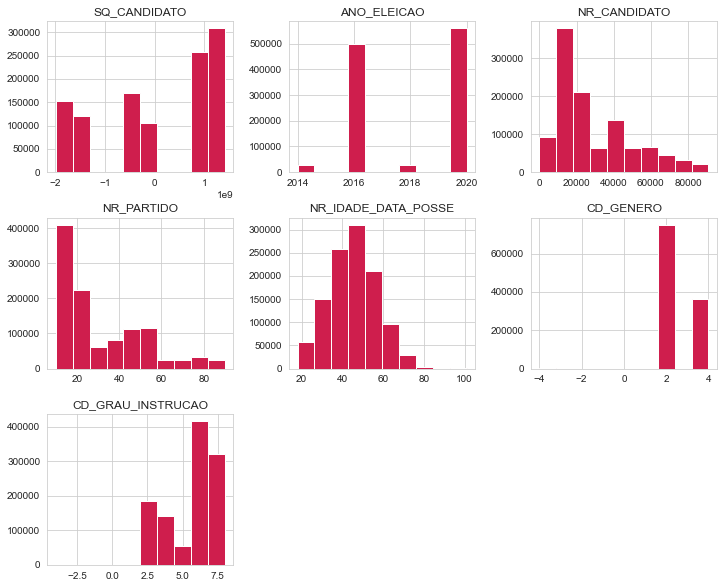

In [34]:
# Definindo as configurações do Gráfico
m_df_candidato_cassacao.hist(color="#cf1e4d", figsize=(12,10))
plt.show()

<b> Selecionando alguns dados para análise </b>

In [35]:
#Seleção das colunas de interesse
df_candidato_cassacao = m_df_candidato_cassacao[['SQ_CANDIDATO','ANO_ELEICAO','NR_CANDIDATO', 'NM_CANDIDATO', 'DS_CARGO','NR_PARTIDO','SG_PARTIDO' ,'SG_UF','SG_UE','DS_SIT_TOT_TURNO','NR_IDADE_DATA_POSSE','DS_GENERO', 'DS_GRAU_INSTRUCAO','DS_ESTADO_CIVIL','DS_COR_RACA','DS_SIT_TOT_TURNO','ST_REELEICAO', 'TP_ABRANGENCIA','DS_SIT_TOT_TURNO','ST_REELEICAO','ST_DECLARAR_BENS','CD_GENERO','CD_GRAU_INSTRUCAO', 'DS_MOTIVO_CASSACAO','DS_SITUACAO_CANDIDATURA']]

In [36]:
df_candidato_cassacao

,SQ_CANDIDATO,ANO_ELEICAO,NR_CANDIDATO,NM_CANDIDATO,DS_CARGO,NR_PARTIDO,SG_PARTIDO,SG_UF,SG_UE,DS_SIT_TOT_TURNO,...,DS_SIT_TOT_TURNO,DS_SIT_TOT_TURNO,DS_SIT_TOT_TURNO,ST_REELEICAO,ST_REELEICAO,ST_DECLARAR_BENS,CD_GENERO,CD_GRAU_INSTRUCAO,DS_MOTIVO_CASSACAO,DS_SITUACAO_CANDIDATURA
0,1410065661,2014,54444,GILDOMAR OLIVEIRA GOMES,DEPUTADO ESTADUAL,54,PPL,AC,AC,SUPLENTE,...,SUPLENTE,SUPLENTE,SUPLENTE,N,N,S,2,7,NaN,APTO
1,1410065850,2014,40140,WILSON DE MELO LUNA,DEPUTADO ESTADUAL,40,PSB,AC,AC,SUPLENTE,...,SUPLENTE,SUPLENTE,SUPLENTE,N,N,S,2,4,NaN,APTO
2,1410065722,2014,11223,KIEFER ROBERTO CAVALCANTE LIMA,DEPUTADO ESTADUAL,11,PP,AC,AC,SUPLENTE,...,SUPLENTE,SUPLENTE,SUPLENTE,N,N,S,2,2,NaN,APTO
3,1410065737,2014,43777,FRANCINEUDO SOUZA DA COSTA,DEPUTADO ESTADUAL,43,PV,AC,AC,SUPLENTE,...,SUPLENTE,SUPLENTE,SUPLENTE,N,N,S,2,8,NaN,APTO
4,1410065799,2014,43250,MICHELE SARAIVA SAMPAIO,DEPUTADO ESTADUAL,43,PV,AC,AC,SUPLENTE,...,SUPLENTE,SUPLENTE,SUPLENTE,N,N,N,4,8,NaN,APTO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114719,-517292105,2020,11456,ALBERTINO VIEL,VEREADOR,11,PP,SC,83615,ELEITO POR QP,...,ELEITO POR QP,ELEITO POR QP,ELEITO POR QP,N,N,S,2,3,NaN,APTO
1114720,893008355,2020,51003,MARIA APARECIDA ALVES DOS SANTOS GARCIA,VEREADOR,51,PATRIOTA,SP,64157,NÃO ELEITO,...,NÃO ELEITO,NÃO ELEITO,NÃO ELEITO,N,N,S,4,8,NaN,APTO
1114721,892987285,2020,22333,CLENIL MENDES DOS SANTOS,VEREADOR,22,PL,SP,68950,ELEITO POR MÉDIA,...,ELEITO POR MÉDIA,ELEITO POR MÉDIA,ELEITO POR MÉDIA,S,S,S,2,8,NaN,APTO
1114722,-517470358,2020,22,HILARIO REFFATTI,PREFEITO,22,PL,SC,81515,ELEITO,...,ELEITO,ELEITO,ELEITO,N,N,S,2,8,NaN,APTO


In [37]:
m_df_candidato_bem_cassacao = pd.merge(df_candidato_cassacao, data_frame_Bem_candidato, on=['SQ_CANDIDATO','ANO_ELEICAO'], how="left")

In [38]:
m_df_candidato_bem_cassacao['DS_MOTIVO_CASSACAO'].unique()

array([nan, 'Ausência de requisito de registro ',
       'Ficha limpa (LC 64/90)', 'Conduta vedada (Lei 9.504/97).',
       'Indeferimento de partido ou coligação.',
       'Abuso de poder (LC 64/90)', 'Compra de voto (Lei 9.504/97).',
       'Impugnação', 'Gasto ilícito de recursos (Lei 9.504/97).',
       'Partido Invalidado'], dtype=object)

Text(-20.000000000000007, 0.5, 'características do núcleo da célula')

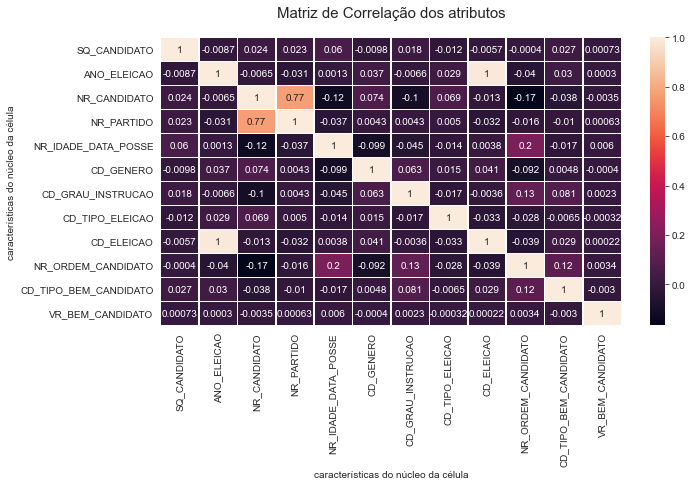

In [39]:
# Gráfico de Matriz de Correlação 
df_small = m_df_candidato_bem_cassacao.copy()
# O corr() método do Pandas DataFrame  é usado para calcular a matriz. 
# Por padrão, ele calcula o coeficiente de correlação de Pearson
correlation_mat = df_small.corr(method='pearson')
# Definindo as configurações do Gráfico
fig = plt.figure(figsize=(8,4))
eixo = fig.add_axes([0, 0, 1, 1])
# Usando o método heatmap para traçar a Matriz
# O parâmetro ' annot=True' exibe os valores do coeficiente de correlação em cada célula.
sns.heatmap(correlation_mat, annot = True, linewidth=0.5)
# Definindo titulo e labels do gráfico
eixo.set_title('Matriz de Correlação dos atributos', fontsize=15, pad=20)
eixo.set_xlabel ("características do núcleo da célula")
eixo.set_ylabel ("características do núcleo da célula")

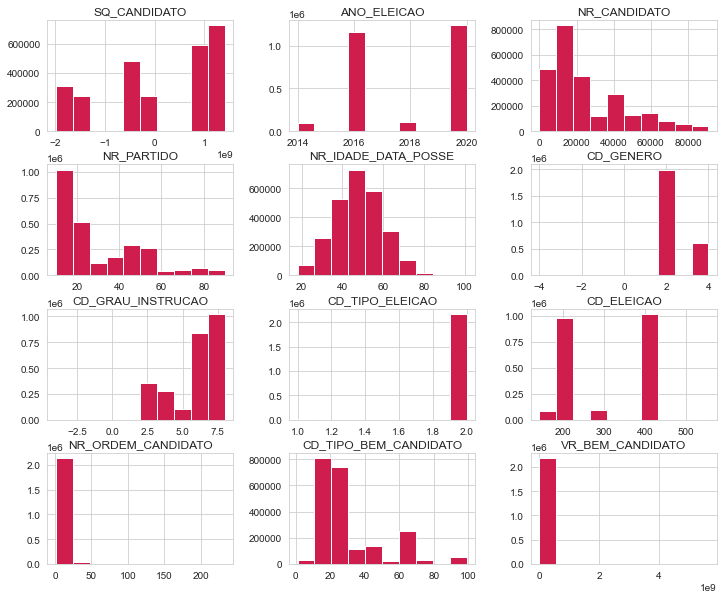

In [40]:
# Gráfico Histogramas 
df_small = m_df_candidato_bem_cassacao.copy()
# Definindo as configurações do Gráfico
df_small.hist(color="#cf1e4d", figsize=(12,10))
plt.show()

In [ ]:
m_df_candidato_bem_cassacao

In [ ]:
m_df_candidato_bem_cassacao['DS_MOTIVO_CASSACAO'].unique()

In [ ]:
m_df_candidato_bem_cassacao['DS_CARGO'].unique()

In [ ]:
cassados = m_df_candidato_bem_cassacao.loc[m_df_candidato_bem_cassacao['DS_MOTIVO_CASSACAO'].notnull()]

In [ ]:
cassados['DS_CARGO'].unique()

Para iniciar a exploração dos dados será apresentado um sumário estatístico 
das variáveis com dados numéricos

In [ ]:
data_frame_Bem_candidato.describe().round(2).astype(str)

In [ ]:
#Seleção das colunas de interesse
cassados[['SQ_CANDIDATO','ANO_ELEICAO','VR_BEM_CANDIDATO']]

In [ ]:
cassados[['ANO_ELEICAO','VR_BEM_CANDIDATO']].boxplot(figsize=(16,4))

In [ ]:
fig, ax1 = plt.subplots(figsize=(15,5))
ax2 = ax1.twinx()
ax1.plot(cassados[['ANO_ELEICAO','VR_BEM_CANDIDATO']], 'b', linewidth=0.5)

In [ ]:
#Descrição estatística do dataframe df_bem após agrupamento
cassados['VR_BEM_CANDIDATO'].describe().astype('int')

In [ ]:
data_frame_bem_maior_10_mil = data_frame_Bem_candidato.loc[(data_frame_Bem_candidato['VR_BEM_CANDIDATO'] > 10000000)]

In [ ]:
data_frame_bem_maior_10_mil.loc[(data_frame_bem_maior_10_mil['VR_BEM_CANDIDATO'] == data_frame_Bem_candidato['VR_BEM_CANDIDATO'].max())]

In [ ]:
data_frame_bem_maior_10_mil.describe().round(2).astype(str)

In [ ]:
data_frame_bem_maior_10_mil[['SQ_CANDIDATO','DS_TIPO_BEM_CANDIDATO','VR_BEM_CANDIDATO']]

In [ ]:
#Plotagem do histograma dos valores dos bens dos candidatos - corrigido
cassados.VR_BEM_CANDIDATO.hist(bins=100)
plt.style.use('seaborn-pastel')
plt.xlabel("Valor")
plt.ylabel("Número de candidatos")
plt.title("Total de bens dos candidatos")
plt.show()

In [ ]:
#Criação de um dataframe final com candidatos eleitos
df_eleitos = data_frame[data_frame.DS_SIT_TOT_TURNO.isin(['ELEITO POR MÉDIA','ELEITO POR QP'])]

In [ ]:
#Transformação de valores categóricos em valores inteiros
dadosCategoricos = pd.get_dummies(data_frame[['NR_IDADE_DATA_POSSE','DS_GENERO', 'DS_GRAU_INSTRUCAO','DS_ESTADO_CIVIL', 'DS_COR_RACA', 'DS_SIT_TOT_TURNO' ]])

In [ ]:
m_df_candidato_bem_cassacao.loc[(m_df_candidato_bem_cassacao['SQ_CANDIDATO'] == 1022458107)]

In [ ]:
m_df_candidato_bem_cassacao['DS_SITUACAO_CANDIDATURA'].unique()

In [ ]:
m_df_candidato_bem_cassacao

<b>Regressão Linear</b> 
De acordo com o google: "A regressão linear quantifica a relação entre uma ou mais variáveis ​​preditoras e uma variável de resultado. Por exemplo, a regressão linear pode ser usada para quantificar os impactos relativos de idade, sexo e dieta (as variáveis ​​preditoras) na altura (a variável de desfecho)."

O modelo de regressão linear é baseado em uma equação de primeiro grau, com a fórmula sendo: y = ax + b. O "x" é o coeficiente angular e o "b" é o coeficiente linear.

Coeficiente angular: indica a inclinação da reta Coeficiente linear: realiza a intersecção com o eixo x

A fórmula da regressão linear busca, justamente, encontrar o valor de a e de b. Neste caso, utilizaremos esse modelo para estimar um novo valor baseado nos atributos de entrada.

Ajustaremos uma equação linear entre os dados observados, ou seja, encontraremo uma reta que melhor explica a relação entre os dados.

Para saber mais sobre a regressão linear visite: https://oestatistico.com.br/regressao-linear-simples/

In [ ]:
#Contagem das opções da coluna DS_GENERO
genero_candidatos_eleitos = Counter(df_eleitos['DS_GENERO'])
genero_candidatos_eleitos

In [ ]:
#Contagem das opções da coluna DS_GENERO
genero_candidatos_cassados = Counter(cassados['DS_GENERO'])
genero_candidatos_cassados

In [ ]:
#Plotagem das informações de gênero dos candidatos
plt.style.use('seaborn-pastel')
plt.pie(genero_candidatos_cassados.values(), labels = genero_candidatos_cassados.keys(), 
        autopct = '%1.1f%%', textprops={'fontsize': 16})
plt.axis("image")
plt.title("Gênero dos Candidatos Cassados", fontsize=18)
plt.show()

In [ ]:
idade_cassados = Counter(cassados['NR_IDADE_DATA_POSSE'])
#idade_cassados

In [ ]:
idade_publico = Counter(m_df_candidato_bem_cassacao['NR_IDADE_DATA_POSSE'])
#idade_publico

In [ ]:
#Plotagem da idade dos candidatos
plt.style.use('ggplot')
plt.bar(idade_publico.keys(), idade_publico.values())
plt.xlabel('Idade')
plt.title('Idade dos Candidatos')
plt.show()
#------------------------------------
#Plotagem da idade dos candidatos
plt.style.use('ggplot')
plt.bar(idade_cassados.keys(), idade_cassados.values())
plt.xlabel('Idade')
plt.title('Idade dos Candidatos Cassados')
plt.show()

In [ ]:
idade_cal = Counter(m_df_candidato_bem_cassacao['NR_PARTIDO'])
#idade_cal

In [ ]:
m_df_candidato_bem_cassacao['VR_BEM_CANDIDATO'].describe().astype('int')

In [ ]:
data_frame_bem_maior_10_mil = data_frame_Bem_candidato.loc[(data_frame_Bem_candidato['VR_BEM_CANDIDATO'] > 10000000)]

In [ ]:
data_frame_bem_menor_10_mil = data_frame_Bem_candidato.loc[(data_frame_Bem_candidato['VR_BEM_CANDIDATO'] < 10000000)]

In [ ]:
data_frame_bem_menor_10_mil.info()

In [ ]:
data_frame_Bem_candidato.sort_values(by='VR_BEM_CANDIDATO', ascending=False, inplace = True)

In [ ]:
plt.hist(x = data_frame_bem_maior_10_mil['VR_BEM_CANDIDATO'])

In [ ]:
for index, row in data_frame_bem_maior_10_mil.iterrows():
    print(index)
    print('Candidato: ' + str(row['SQ_CANDIDATO']))
    print('Ano: ' + str(row['ANO_ELEICAO']))
    print('ID Bem: ' + str(row['CD_TIPO_BEM_CANDIDATO']))
    print('Tipo de Bem: ' + str(row['DS_TIPO_BEM_CANDIDATO']))
    print('Descrição: ' + str(row['DS_BEM_CANDIDATO']))
    print('Valor ' + str(row['VR_BEM_CANDIDATO']) + '\n')

In [ ]:
df1 = data_frame_bem_menor_10_mil.loc[(data_frame_bem_menor_10_mil['DS_TIPO_BEM_CANDIDATO'] == 45)]

In [ ]:
data_frame_Bem_candidato['VR_BEM_CANDIDATO'].describe().astype('int')

In [ ]:
for index, row in data_frame_bem_maior_10_mil.iterrows():
    print(index)
    print('Candidato: ' + str(row['SQ_CANDIDATO']))
    print('Ano: ' + str(row['ANO_ELEICAO']))
    print('Tipo de Bem: ' + str(row['DS_TIPO_BEM_CANDIDATO']))
    print('Descrição: ' + str(row['DS_BEM_CANDIDATO']))
    print('Valor ' + str(row['VR_BEM_CANDIDATO']) + '\n')

In [ ]:
#Criação de um dataframe com bens dos candidatos até R$  R$ 10.000.000,00 
df_consolidado_10mi = cassados.loc[(cassados['VR_BEM_CANDIDATO'] < 10000000)]
#Criação de um dataframe com bens dos candidatos eleitos até R$  R$ 10.000.000,00 
df_consolidado_eleitos_10mi = cassados.loc[(cassados['VR_BEM_CANDIDATO'] < 10000000)]

In [ ]:
#Plotagem dos bens de candidatos até R$  R$ 10.000.000,00 
df_consolidado_10mi.VR_BEM_CANDIDATO.hist(bins=100)
plt.style.use('seaborn-pastel')
plt.xlabel("Valor")
plt.ylabel("Número de candidatos")
plt.title("Total de bens dos candidatos até 10 mi")
plt.show()
#Plotagem dos bens de candidatos eleitos até R$  R$ 10.000.000,00 
df_consolidado_eleitos_10mi.VR_BEM_CANDIDATO.hist(bins=100)
plt.style.use('ggplot')
plt.xlabel("Valor")
plt.ylabel("Número de candidatos eleitos")
plt.title("Total de bens dos candidatos eleitos até 10 mi")
plt.show()

In [ ]:
data_frame_bem_maior_10_mil['VR_BEM_CANDIDATO']

In [ ]:
for index, row in data_frame_bem_maior_10_mil.iterrows():
    print(index)
    print('Candidato: ' + str(row['SQ_CANDIDATO']))
    print('Ano: ' + str(row['ANO_ELEICAO']))
    print('Tipo de Bem: ' + str(row['DS_TIPO_BEM_CANDIDATO']))
    print('Descrição: ' + str(row['DS_BEM_CANDIDATO']))
    print('Valor ' + str(row['VR_BEM_CANDIDATO']) + '\n')

In [ ]:
maior_10mi = m_df_candidato_bem_cassacao.loc[(m_df_candidato_bem_cassacao['VR_BEM_CANDIDATO'] > 10000000)]

In [ ]:
df_10_mil = m_df_candidato_bem_cassacao.loc[(m_df_candidato_bem_cassacao['VR_BEM_CANDIDATO'] > 10000000)]

In [ ]:
maior_10mi['VR_BEM_CANDIDATO'].describe().astype('int')

In [ ]:
df_10_mil

In [ ]:
df_nao_eleito = df_10_mil.query("VR_BEM_CANDIDATO > 10000000 & DS_SIT_TOT_TURNO == 'NÃO ELEITO'")

In [ ]:
heights = np.array(m_df_candidato_bem_cassacao['ANO_ELEICAO'])

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # set plot style
plt.hist(heights)
plt.title('Quantidade de Registros por Ano')
plt.xlabel('Ano')

In [ ]:
m_df_candidato_bem_cassacao.info()

In [ ]:
heights = np.array(m_df_candidato_bem_cassacao['NR_IDADE_DATA_POSSE'])

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # set plot style
plt.hist(heights)
plt.title('Idade na Data da Posse')
plt.xlabel('Faixa Idade')

In [ ]:
data_frame_Bem_candidato.loc[(data_frame_Bem_candidato['SQ_CANDIDATO'] == 957857202)]

In [ ]:
#Plotagem do histograma dos valores dos bens dos candidatos
data_frame_bem_maior_10_mil.VR_BEM_CANDIDATO.hist(bins=100) 
plt.style.use('seaborn-pastel')
plt.xlabel("Valor")
plt.ylabel("Número de bens")
plt.title("Bens candidatos - valores")
plt.show()

In [ ]:
print('------------------------------------/------------------------------------/------------------------------------')
print('Para correção dos dados de renda insconsisência, optou-se por atualizar os valores acima de R$ 10.000.000,00 dos candidatos não eleitos por 0')
print('------------------------------------/------------------------------------/------------------------------------')
for index, row in df_nao_eleito.iterrows():
    m_df_candidato_bem_cassacao.at[index , 'VR_BEM_CANDIDATO' ] = 0
    print(index)
    print('Candidato: ' + str(row['NR_CANDIDATO']))
    print('Nome: ' + str(row['NM_CANDIDATO']))
    print('Tipo de Bem: ' + str(row['DS_TIPO_BEM_CANDIDATO']))
    print('Descrição: ' + str(row['DS_BEM_CANDIDATO']))    
    print('Valor Antigo: ' + str(row['VR_BEM_CANDIDATO']))
    print('Valor Atualizado: ' + str('0'))
    print('------------------------------------')

In [ ]:
df_10_mil_remo = m_df_candidato_bem_cassacao.loc[(m_df_candidato_bem_cassacao['VR_BEM_CANDIDATO'] > 10000000)]

In [ ]:
#df_10_mil_remo['VR_BEM_CANDIDATO'].describe().astype('int')

In [ ]:
#data_frame_Bem_candidato['VR_BEM_CANDIDATO'].describe().astype('int')

In [ ]:
 for index, row in df_10_mil_remo.iterrows():
    if row['DS_BEM_CANDIDATO'] == "#NULO#" :
        print(index)
        print('Candidato: ' + str(row['SQ_CANDIDATO']))
        print('Ano: ' + str(row['ANO_ELEICAO']))
        print('Tipo de Bem: ' + str(row['DS_TIPO_BEM_CANDIDATO']))
        print('Descrição: ' + str(row['DS_BEM_CANDIDATO']))
        print('Valor Antigo ' + str(row['VR_BEM_CANDIDATO']))
        print('Valor Atualizado: ' + str('0'))
        m_df_candidato_bem_cassacao.at[index,   'VR_BEM_CANDIDATO'] = 0
        print('------------------------------------')

In [ ]:
 for index, row in df_10_mil_remo.iterrows():
    #print(index)
    #print('Candidato: ' + str(row['SQ_CANDIDATO']))
    #print('Ano: ' + str(row['ANO_ELEICAO']))
    #print('Tipo de Bem: ' + str(row['DS_TIPO_BEM_CANDIDATO']))
    #print('Descrição: ' + str(row['DS_BEM_CANDIDATO']))
    #print('Valor ' + str(row['VR_BEM_CANDIDATO']) + '\n')
    print(str(index) + ' ' + str(row['VR_BEM_CANDIDATO']) + ' #' + str(row['VR_BEM_CANDIDATO']) + ' - ' + str(row['DS_BEM_CANDIDATO'])  )
    if row['DS_BEM_CANDIDATO'] == "#NULO#" :
        m_df_candidato_bem_cassacao.at[index,   'VR_BEM_CANDIDATO'] = 0

In [ ]:
m_df_candidato_bem_cassacao.at[2598,	'VR_BEM_CANDIDATO'] =196031864   #196031864.0 - LAGINHA AGRO INDUSTRIAL S/A			
m_df_candidato_bem_cassacao.at[2602,	'VR_BEM_CANDIDATO'] =14987952 	 #14987952.0 - LUG TAXI AEREO LTDA			
m_df_candidato_bem_cassacao.at[2626,	'VR_BEM_CANDIDATO'] =16299739 	 #16299739.0 - INCORPORAÇÃO AO CAPITAL DE LAGINHA AGRO INDUSTRIAL S/A DE 6.999.888 AÇÕES ON			
m_df_candidato_bem_cassacao.at[18936,	'VR_BEM_CANDIDATO'] =18323942 	 #18323942.0 - PARTICIPACAO SOCIETARIA NA EMPRESA AYMADA EMPREENDIMENTOS, PARTICIPACOES E ADMINISTRACAO LTDA			
m_df_candidato_bem_cassacao.at[20240,	'VR_BEM_CANDIDATO'] =24476744 	 #24476744.0 - QUOTAS DO CAPITAL SOCIAL DA EMPRESA IMOBILIARIA BIANCA LTDA			
m_df_candidato_bem_cassacao.at[23921,	'VR_BEM_CANDIDATO'] =16390838 	 #16390838.0 - 7.500 QUOTAS DA GUARARAPES ENTERPRISES AND INVESTIMENTS LTD.			
m_df_candidato_bem_cassacao.at[23925,	'VR_BEM_CANDIDATO'] =40127541 	 #40127541.0 - 742 QUOTAS DA SABE ALIMENTOS LTDA. CNPJ: 08.864.807/0001-84			
m_df_candidato_bem_cassacao.at[26495,	'VR_BEM_CANDIDATO'] =23408877 	 #23408877.0 - CRÉDITO NA EMPRESA ALFREDO KAEFER   CIA LTDA - CNPJ 01.266.025/0001-77			
m_df_candidato_bem_cassacao.at[26500,	'VR_BEM_CANDIDATO'] =69574420 	 #69574420.0 - CRÉDITO DE ALIENAÇÃO DE AÇÕES A RECEBER DE CLARICE ROMAN. CPF 580.780.539-91.			
m_df_candidato_bem_cassacao.at[28404,	'VR_BEM_CANDIDATO'] =15269313 	 #15269313.2 - GM5 - INDUSTRIA E COMÉRCIO LTDA 97%			
m_df_candidato_bem_cassacao.at[33012,	'VR_BEM_CANDIDATO'] =10780000 	 #10780000.0 - 98,0% DAS COTAS PATRIMONIAL DO CS DA EMPRESA GENESIS-MS - CONSTRUCAO, COMERCIO E CONSULTORIA LTDA. INSCRITA NO CNPJ. M		30.	326.0001-30 DE ACORDO COM PL DE 31.12.2012
m_df_candidato_bem_cassacao.at[33782,	'VR_BEM_CANDIDATO'] =18000000 	 #18000000.0 - 50% DA EMPRESA POLY PIXELS COMERCIAL LTDA-EPP			
m_df_candidato_bem_cassacao.at[33784,	'VR_BEM_CANDIDATO'] =18000000 	 #18000000.0 - 50% DA EMPRESA CR ACRILICOS INDUSTRIA COMÉRCIO IMPORTAÇÃO E EXPORTAÇÃO LTDA			
m_df_candidato_bem_cassacao.at[37053,	'VR_BEM_CANDIDATO'] =10036108 	 #10036108.35 - APLICAÇÕES FINANCEIRAS			
m_df_candidato_bem_cassacao.at[39774,	'VR_BEM_CANDIDATO'] =20250000 	 #20250000.0 - 90% DAS QUOTAS SOCIAIS DA EMPRESA SIAL			
m_df_candidato_bem_cassacao.at[39927,	'VR_BEM_CANDIDATO'] =13398026 	 #13398026.19 - SALDO BANCO DE BRASÍLIA S/A EM 31/12/2013			
m_df_candidato_bem_cassacao.at[39957,	'VR_BEM_CANDIDATO'] =19762999 	 #19762999.0 - PARTICIPAÇÃO DE 99,99% NA SOCIEDADE REMMO PARTICIPAÇÕES S/A			
m_df_candidato_bem_cassacao.at[40235,	'VR_BEM_CANDIDATO'] =11370000 	 #113700 - 50% DO IMÓVEL RURAL DENOMINADO FAZENDA AGROPEMA COM 11.370.00 HA NO MUNICIPIO DE COCALINHO-MT			
m_df_candidato_bem_cassacao.at[40532,	'VR_BEM_CANDIDATO'] =150000000   #150000000.0 - LETRA TESSOURO NACIONAL N. 2945.76 H			
m_df_candidato_bem_cassacao.at[40533,	'VR_BEM_CANDIDATO'] =150000000   #150000000.0 - LETRA TESSOURO NACIONAL N. 344.141 H			
m_df_candidato_bem_cassacao.at[40534,	'VR_BEM_CANDIDATO'] =150000000   #150000000.0 - LETRA TESSOURO NACIONAL N. 344.142 H			
m_df_candidato_bem_cassacao.at[40536,	'VR_BEM_CANDIDATO'] =150000000   #150000000.0 - LETRA TESSOURO NACIONAL N. 3086.76 H			
m_df_candidato_bem_cassacao.at[42342,	'VR_BEM_CANDIDATO'] =37082240 	 #37082240.93 - QUOTAS DE CAPITALNA FIRMA EUCATUR-EMP. UNIÃO CASCAVEL T.T LTDA. CGC 76.080.738/0001-78, PARTICIPACAO DO DECLARANTE R		2,9	8 E PARTICIPACAO DO CONJUGE R$3.708.293,66
m_df_candidato_bem_cassacao.at[48790,	'VR_BEM_CANDIDATO'] =1003471   #100347177.3 - 50% DE UM CAMINHAO BASCULANTE MERCEDES/BENZ L 1620 14 TON ANO 2007/2007 PLACA HRO-9644			
m_df_candidato_bem_cassacao.at[48957,	'VR_BEM_CANDIDATO'] =28926563 	 #28926563.05 - BTG PACTUAL - SALDO EM 31/12/2013			
m_df_candidato_bem_cassacao.at[48962,	'VR_BEM_CANDIDATO'] =16796389 	 #16796389.59 - SHOPPING CENTERS IGUATEMI FORTALEZA 2.987.785 AÇOES ORD. NOMINATIVAS			
m_df_candidato_bem_cassacao.at[48976,	'VR_BEM_CANDIDATO'] =10882579 	 #10882579.45 - VIDEOMAR REDE NORDESTE S/A - VR RECEBIDO DA REDUÇAO DO INV. DA CALILA NA VIDEOMAR SEM ALTERAR NUMERO DE AÇOES			
m_df_candidato_bem_cassacao.at[48983,	'VR_BEM_CANDIDATO'] =72705609 	 #72705609.41 - JEREISSATI PARTICIPAÇOES S/A - 13.235.465 AÇOES ORDINARIAS NOMINAIS PROVENIENTES DO INVENTARIO DE HUGO JEREISSATI E		TRE	IRMAOS
m_df_candidato_bem_cassacao.at[48993,	'VR_BEM_CANDIDATO'] =56392228 	 #56392228.54 - CALILA ADMINISTRAÇAO E COMERCIO S/A - SALDO DE AÇOES EM 2012 1.310.787 AÇOES ORDINARIAS CLASSE A			
m_df_candidato_bem_cassacao.at[48994,	'VR_BEM_CANDIDATO'] =15460171   #154601710.99 - CALILA INVESTIMENTOS S/A TOTAL DE AÇOES 1.944.032 CLASSE A			
m_df_candidato_bem_cassacao.at[53811,	'VR_BEM_CANDIDATO'] =1041020 	 #10410200.0 - UMA AREA DE TERRAS COM 1.041,7 HA. DEN. FAZENDA TAQUARUSSU, LOCALIZADA NO MUNICIPIO DE MARACAJU-MS, CFE MATRICULAS N. 6484		58	4810 E 6538.
m_df_candidato_bem_cassacao.at[54487,	'VR_BEM_CANDIDATO'] =2522000 	 #25220000.0 - 97%DA EMPRESA CONSTRUTORA AL-WI LTDA			
m_df_candidato_bem_cassacao.at[54587,	'VR_BEM_CANDIDATO'] =2135000000	 #2135000000.0 - IMOVEIS 2135.000.000.00			
m_df_candidato_bem_cassacao.at[55001,	'VR_BEM_CANDIDATO'] =468822 	 #46882208.0 - AÇÕES DO PARANÁ BANCO, 20.530.611 ON E 1.829.461 PN			
m_df_candidato_bem_cassacao.at[55003,	'VR_BEM_CANDIDATO'] =151414 	 #15141424.38 - ADIANTAMENTO PARA FUTURO AUMENTO DE CAPITAL NA INVEST BENS S/A			
m_df_candidato_bem_cassacao.at[55012,	'VR_BEM_CANDIDATO'] =672563 	 #67256356.69 - CDB PARANÁ BANCO			
m_df_candidato_bem_cassacao.at[55022,	'VR_BEM_CANDIDATO'] =458212 	 #45821231.79 - PARTICIPAÇÃO ACIONARIA EMPRESA J. MALUCELL ADM. E PARTICIPAÇÃO S/A			
m_df_candidato_bem_cassacao.at[60325,	'VR_BEM_CANDIDATO'] =653000 	 #65300000.0 - CASA AURENY III VLR 320.000.00 IMOVEL COMERCIAL VLR 83.000.00 TERRENOS NO AURENY III VLR 250.000.00			
m_df_candidato_bem_cassacao.at[60546,	'VR_BEM_CANDIDATO'] =128000 	 #12800000.0 - IMOVEL AREA DE 159.812,00 M2 LOCALIZADO NO KM 78 - ROD CASTELO BRANCO			
m_df_candidato_bem_cassacao.at[64175,	'VR_BEM_CANDIDATO'] =340000 	 #34000000.0 - PROP.  RURAL FAZENDA IPANEMA EM DUERÉ TO			
m_df_candidato_bem_cassacao.at[64798,	'VR_BEM_CANDIDATO'] =130000 	 #13000000.0 - LCA BB AGRONEGOCIO-LIQUIDEZ IMEDIATA			
m_df_candidato_bem_cassacao.at[65732,	'VR_BEM_CANDIDATO'] =15000000 	 #15000000.0 - 500KG OURO INSITU			
m_df_candidato_bem_cassacao.at[65733,	'VR_BEM_CANDIDATO'] =120000 	 #12000000.0 - 100% EMPRESA SOBERANA MINERAÇÃO			
m_df_candidato_bem_cassacao.at[66650,	'VR_BEM_CANDIDATO'] =102550 	 #10255006.81 - ADIANTAMENTO PARA AUMENTO DE CAPITAL DA EMPRESA PHD PARTICIPAÇÕES SOCIETÁRIAS LTDA - CNPJ 09.359.331/0001-97			
m_df_candidato_bem_cassacao.at[66763,	'VR_BEM_CANDIDATO'] =104102 	 #10410200.0 - UMA AREA DE TERRAS COM 1.041,7 HA. DEN. FAZENDA TAQUARUSSU, LOCALIZADA NO MUNICIPIO DE MARACAJU-MS, CFE MATRICULAS N. 6484		58	4810 E 6538.
m_df_candidato_bem_cassacao.at[68805,	'VR_BEM_CANDIDATO'] =257328 	 #25732878.25 - 40.440.810 QUOTAS CAP.-JOTA LESSA PARTIC.LTDA.			
m_df_candidato_bem_cassacao.at[73087,	'VR_BEM_CANDIDATO'] =115000 	 #11500000.0 - PARTICIPACAO SOCIEDADE POR COTAS DE PARTICIPACAO SCP			
m_df_candidato_bem_cassacao.at[74947,	'VR_BEM_CANDIDATO'] =174349 	 #17434902.0 - QUOTAS DE 74,872% DO VALOR TOTAL DA EMPRESA PRIORE EMPREENDIMENTOS E PARTICIPAÇOES			
m_df_candidato_bem_cassacao.at[75918,	'VR_BEM_CANDIDATO'] =120000 	 #12000000.0 - LOTE SUL EM DF			
m_df_candidato_bem_cassacao.at[83036,	'VR_BEM_CANDIDATO'] =120000 	 #12000000.0 - CASA - USA			
m_df_candidato_bem_cassacao.at[83215,	'VR_BEM_CANDIDATO'] =347178 	 #34717856.0 - 70% DAS QUOTAS DA EMPRESA CAP HOLDING LTDA			
m_df_candidato_bem_cassacao.at[84902,	'VR_BEM_CANDIDATO'] =22243986 	 #22243986.0 - 100% DO CAPITAL DO SOCIAL DA EMPRESA ADCL PARTICIPAÇÕES LTDA CNPJ 61.769.065/0001-69			
m_df_candidato_bem_cassacao.at[86454,	'VR_BEM_CANDIDATO'] =10092334 	 #10092334.82 - PARTICIPAÇÃO NO CAPITAL SOCIAL DA EMRPESA NUTRISA NUTRIMENTO AGROPASTORIL S/A			
m_df_candidato_bem_cassacao.at[91830,	'VR_BEM_CANDIDATO'] =23314441 	 #23314441.2 - 37067103 ACOES PASAMA PARTICIPACOES SA			
m_df_candidato_bem_cassacao.at[96737,	'VR_BEM_CANDIDATO'] =26718520 	 #26718520.0 - TERRENO SITUADO NA RUA JOSE MARIA RIOS VILA IVONETE			
m_df_candidato_bem_cassacao.at[128174,	'VR_BEM_CANDIDATO'] =20000 	     #20000000.0 - CASA EM ALVENARIA			
m_df_candidato_bem_cassacao.at[140230,	'VR_BEM_CANDIDATO'] =12000000 	 #12000000.0 - Fiat UNO, ano 2005, Placa JOU 6434			
m_df_candidato_bem_cassacao.at[150889,	'VR_BEM_CANDIDATO'] =10405407    #104054076.0 - IMÓVEL RESIDENCIAL EM IRECE			
m_df_candidato_bem_cassacao.at[163191,	'VR_BEM_CANDIDATO'] =15000000 	 #15000000.0 - SITIO RIACHO CLARO			
m_df_candidato_bem_cassacao.at[164026,	'VR_BEM_CANDIDATO'] =14182484 	 #14182484.62 - CASAS E OUTROS MOVEIS E IMOVEIS ,TITULOS, CONTAS BANCARIAS			
m_df_candidato_bem_cassacao.at[171539,	'VR_BEM_CANDIDATO'] =10000000    #1000000000.0 - UM PONTO COMERCIAL  - AVENIDA PRESIDENTE GETULIO VARGAS, N. 3903			
m_df_candidato_bem_cassacao.at[184024,	'VR_BEM_CANDIDATO'] =250000 	 #25000000.0 - CARRO			
m_df_candidato_bem_cassacao.at[197211,	'VR_BEM_CANDIDATO'] =12000000 	 #12000000.0 - FAZENDA TITULADA ALIANÇA, 1590 HA, NO MUNICÍPIO DE MONTE DO CARMO - TO			
m_df_candidato_bem_cassacao.at[206412,	'VR_BEM_CANDIDATO'] =12000000 	 #12000000.0 - Q 151 CASA 10 BARROLANDIA			
m_df_candidato_bem_cassacao.at[213746,	'VR_BEM_CANDIDATO'] =18000000 	 #18000000.0 - CASA FINANCIADA			
m_df_candidato_bem_cassacao.at[219789,	'VR_BEM_CANDIDATO'] =12000000 	 #12000000.0 - DE ALVENARIA RUA GRANDE 1529			
m_df_candidato_bem_cassacao.at[225254,	'VR_BEM_CANDIDATO'] =49245591 	 #49245591.0 - APARTAMENTO DE ANO 122 EDIF FIRENZE LOCALIZADO NA RUA CAMPO LARGO N 369 ADQ MAJORE EMPREEND. IMOBILIARIOS LTDA CNPJ 07		1	-73
m_df_candidato_bem_cassacao.at[226828,	'VR_BEM_CANDIDATO'] =50000000 	 #50000000.0 - RUA DE CIRCULAÇÃO SN Q J4 L 11 JARDIM SCALA			
m_df_candidato_bem_cassacao.at[238215,	'VR_BEM_CANDIDATO'] =20000 	     #20000000.0 - IMOVEL RURAL DENOMINADO DE CHACARA CALINO NO MUNICIPIO DE ANTÔNIO JOÃO - MS.			
m_df_candidato_bem_cassacao.at[245986,	'VR_BEM_CANDIDATO'] =15000000 	 #15000000.0 - 1 SOBRADO EM ALVENARIA			
m_df_candidato_bem_cassacao.at[251872,	'VR_BEM_CANDIDATO'] =18000000 	 #18000000.0 - 5 HECTARES DE TERRA NO CÓRREGO DA PIMENTA			
m_df_candidato_bem_cassacao.at[316649,	'VR_BEM_CANDIDATO'] =15000000 	 #15000000.0 - COM PLANTIU DE 4000 PES DE CACAU			
m_df_candidato_bem_cassacao.at[319588,	'VR_BEM_CANDIDATO'] =15553337 	 #15553337.51 - ADIANTAMENTO PARA FUTURO AUMENTO DE CAPITAL NA EMPRESA P H D PARTICIPAÇOES SOCIETÁRIAS LTDA - CNPJ 09.359.331.0001-9		ATU	AL
m_df_candidato_bem_cassacao.at[330983,	'VR_BEM_CANDIDATO'] =15000000 	 #15000000.0 - 50% CASA RESIDENCIAL EM MURUTINGA DO SUL			
m_df_candidato_bem_cassacao.at[336088,	'VR_BEM_CANDIDATO'] =200000000   #200000000.0 - UMA CASA SITUADA A RUA CAETÉ N.458 NO BAIRRO CRUZEIRO CELESTE			
m_df_candidato_bem_cassacao.at[363312,	'VR_BEM_CANDIDATO'] =12003000 	 #12003000.0 - CAPITAL SOCIAL - CRD			
m_df_candidato_bem_cassacao.at[366240,	'VR_BEM_CANDIDATO'] =100000000   #100000000.0 - LOTE RURAL DENOMINADO SANTA RITA LOCALIZADO NA QUINTA LINHA SETOR LEITÃO			
m_df_candidato_bem_cassacao.at[369159,	'VR_BEM_CANDIDATO'] =20000 		 #20000000.0 - QUOTAS DE CAPITAL SOCIAL FERTIMOURÃO CNPJ 80.768.153/0001-12			
m_df_candidato_bem_cassacao.at[372718,	'VR_BEM_CANDIDATO'] =11188490 	 #11188490.0 - 760.000 QUOTAS DE CAPITAL SOCIAL DA EMPRESA REIMAC REDENÇÃO IMPLEMENTOS E MÁQUINAS AGRÍCOLES LTDA, CNPJ:04.741.161-000			
m_df_candidato_bem_cassacao.at[372728,	'VR_BEM_CANDIDATO'] =11742044 	 #11742044.0 - UM IMÓVEL RURAL, LOCALIZADO NO MUNICÍPIO DE SANTANA DO ARAGUAIA, COM UMA ÁREA TOTAL DE 5.683.1495 HA, EM 13-05-2012 DE		SAN	TIAGO GUIMARÃES, CPF:016.149.887-65 E GILDA SANTIAGO GUIMARÃES.
m_df_candidato_bem_cassacao.at[378989,	'VR_BEM_CANDIDATO'] =12000000 	 #12000000.0 - FAZENDA REUNIDAS PORTEIRÃO  COM 3.091,13			
m_df_candidato_bem_cassacao.at[404967,	'VR_BEM_CANDIDATO'] =15000000    #1500000000.0 - CASA E CHACARA RUA ITAPETINGA N. 84 - VENDA NOVA			
m_df_candidato_bem_cassacao.at[404968,	'VR_BEM_CANDIDATO'] =25000000    #2500000000.0 - LOJAS RUA PADRE PEDRO PINTO BAIRRO LETICIA - VENDA NOVA N. 3510,3520,3530,3540,3540-A			
m_df_candidato_bem_cassacao.at[407413,	'VR_BEM_CANDIDATO'] =40000000    #400000000.0 - ESCLARECIMENTO Á DECLARAÇÃO DE BENS: VALORES ATUALIZADOS DOS ATIVOS REALIZÁVEIS E PERMANENTES NAS COTAS DE CAPITAL A		ONA	DOS
m_df_candidato_bem_cassacao.at[407418,	'VR_BEM_CANDIDATO'] =20000 		 #20000000.0 - ESCLARECIMENTO Á DECLARAÇÃO DE BENS: VALORES ATUALIZADOS DE MERCADO DOS IMOVEIS AQUI RELACIONADOS			
m_df_candidato_bem_cassacao.at[414225,	'VR_BEM_CANDIDATO'] =14000000 	 #14000000.0 - PROPRIEDADE LOCALIZADA NA GLEBA ITAIPAVAS, FLORESTA DO  ARAGUAIA, MEDINDO 14 ALQUEIRES			
m_df_candidato_bem_cassacao.at[426909,	'VR_BEM_CANDIDATO'] =2500000     #250000000.0 - CASA DE ALVENARIA			
m_df_candidato_bem_cassacao.at[426910,	'VR_BEM_CANDIDATO'] =2000000     #200000000.0 - CHACARA DENOMINADA BALÃO MAGICO PROXIMO A COMUNIDADE DE MULATA			
m_df_candidato_bem_cassacao.at[434004,	'VR_BEM_CANDIDATO'] =3562100 	 #35621000.0 - VW VOYAGE 1,6 ANO 2013/2014 PLACA NRY 8801 ALIENADO AO BANCO VOLKSWAGEN			
m_df_candidato_bem_cassacao.at[463746,	'VR_BEM_CANDIDATO'] =1500000     #150000000.0 - CASA-			
m_df_candidato_bem_cassacao.at[478738,	'VR_BEM_CANDIDATO'] =46500000 	 #46500000.0 - UM IMOVEL RURAL 7,260 HA			
m_df_candidato_bem_cassacao.at[479802,	'VR_BEM_CANDIDATO'] =37700000 	 #37700000.0 - UMA SAVEIRO 1.6CS MOD 2011 COR PRETA NINJA ADUIRIDO DA CAVESA CAMPINA GRANDE VEICULOS LTDA CNPJ 08.816.563/0001-64 CON		0	8915 EM 19/02/2011
m_df_candidato_bem_cassacao.at[481160,	'VR_BEM_CANDIDATO'] =12654545 	 #12654545.45 - UM IMÓVEL RURAL DENOMINADO FZENDA CONFIANÇAS, LOCALIZADO NO MUNICÍPIO DE CANAÃ DOS CARAJÁS-PA, BRASIL			
m_df_candidato_bem_cassacao.at[507165,	'VR_BEM_CANDIDATO'] =10700000 	 #10700000.0 - AREA RURAL EM CONDOMINIO 16,17%			
m_df_candidato_bem_cassacao.at[508594,	'VR_BEM_CANDIDATO'] =20000 		 #20000000.0 - UM TERRENO URBANO CONSTITUIDO PELO LOTE 15 DA QUADRA 01, COM 360M2, CONTENDO UMA CASA MEDINDO 48,09 M2 LOCALIZADO NA RUA DE		JU	LHO 09-TRIANON/MATR 554DO 3OFICIO
m_df_candidato_bem_cassacao.at[533860,	'VR_BEM_CANDIDATO'] =40000000 	 #40000000.0 - FORD KA SE 1.5 SD			
m_df_candidato_bem_cassacao.at[536562,	'VR_BEM_CANDIDATO'] =15000000 	 #15000000.0 - VEICULO AUTOMOVÉL, GOL ANO 2010,			
m_df_candidato_bem_cassacao.at[542683,	'VR_BEM_CANDIDATO'] =13589905 	 #13589905.0 - DEPOSITO EM MOEDA ESTRANGEIRA - 249 ESTADOS UNIDOS			
m_df_candidato_bem_cassacao.at[570138,	'VR_BEM_CANDIDATO'] =10450000 	 #10450000.0 - FLAVIO COSTA NEGÓCIOS IMOBILIÁRIOS			
m_df_candidato_bem_cassacao.at[579954,	'VR_BEM_CANDIDATO'] =27000000 	 #27000000.0 - UMA CASA SOBRE POSTA ALTA ADQUQIRIDO NA CONDIÇOES DE FINANCIAMENTO NO BANCO INTERMEDIUM			
m_df_candidato_bem_cassacao.at[582168,	'VR_BEM_CANDIDATO'] =17100000 	 #17100000.0 - QUOTAS DA EMPRESA CBJ INVESTIMENTOS E PARTICIPAÇOES SOCIETÁRIAS LTDA			
m_df_candidato_bem_cassacao.at[596539,	'VR_BEM_CANDIDATO'] =25672000 	 #25672000.0 - VEICULO HYUNDAI HB20 ANO 2014, 2015			
m_df_candidato_bem_cassacao.at[596937,	'VR_BEM_CANDIDATO'] =20000 		 #20000000.0 - AV. MARGINAL TIETE, 346 CENTRO PORTO PIAUI			
m_df_candidato_bem_cassacao.at[602670,	'VR_BEM_CANDIDATO'] =50000000 	 #50000000.0 - FAZENDA			
m_df_candidato_bem_cassacao.at[606748,	'VR_BEM_CANDIDATO'] =11000000 	 #11000000.0 - UM IMOVEL RURAL DENOMINADO FAZENDA SORRISO METALICO, EM URUTAI-GO,			
m_df_candidato_bem_cassacao.at[633696,	'VR_BEM_CANDIDATO'] =10439000 	 #10439000.0 - 9490 CABEÇAS DE BOVINO			
m_df_candidato_bem_cassacao.at[658104,	'VR_BEM_CANDIDATO'] =150000000   #150000000.0 - 11 ALGUERES			
m_df_candidato_bem_cassacao.at[671126,	'VR_BEM_CANDIDATO'] =15000000 	 #15000000.0 - IMÓVEL RURAL N. L1-A NO MUNICIPIO DE PONTA PORÃ COM AREA DE 9,2890 HA			
m_df_candidato_bem_cassacao.at[674530,	'VR_BEM_CANDIDATO'] =14000000 	 #14000000.0 - SANTANA ANO 2006			
m_df_candidato_bem_cassacao.at[707069,	'VR_BEM_CANDIDATO'] =16000000 	 #16000000.0 - EMPRESA FRANCISCO ASSIS F. T. I. ME			
m_df_candidato_bem_cassacao.at[723012,	'VR_BEM_CANDIDATO'] =15000000 	 #15000000.0 - BENFEITORIAS DO IMOVEL RURAL COM AREA DE 653,4 HA MUN SANTA TEREZINHA, EM 03/06/14, CFE MAT 6086,6087,6088 E 6089 DO 1		LA	RICA
m_df_candidato_bem_cassacao.at[732057,	'VR_BEM_CANDIDATO'] =16296000 	 #16296000.0 - EMPRESA MINERALLIS CAP CONSULT E INTERMDEDIAÇÃO			
m_df_candidato_bem_cassacao.at[732167,	'VR_BEM_CANDIDATO'] =18000000 	 #18000000.0 - FAZENDA AGUIAR EM CAMPO VERDE			
m_df_candidato_bem_cassacao.at[739547,	'VR_BEM_CANDIDATO'] =12995330 	 #12995330.0 - AÇÕES - INDÚSTRIAS TÊXTEIS NAJAR S.A.			
m_df_candidato_bem_cassacao.at[749244,	'VR_BEM_CANDIDATO'] =15000000 	 #15000000.0 - UMA CASA DE ALVENARIA SITUADA NA AV. PARAISO QUADRA 04 LOTE 17 B - BAIRRO: IDEPENDENCIA			
m_df_candidato_bem_cassacao.at[764535,	'VR_BEM_CANDIDATO'] =80000000 	 #80000000.0 - 01 FAZENDA DE 403,00HA, DIVINÓPOLIS DO TOCANTINS			
m_df_candidato_bem_cassacao.at[780537,	'VR_BEM_CANDIDATO'] =10963437 	 #10963437.0 - CASA SITA À RUA MARIO BASTOS LOTE 7BQUADRA 5 JARDIM MERCEDES			
m_df_candidato_bem_cassacao.at[786359,	'VR_BEM_CANDIDATO'] =23500000 	 #23500000.0 - TERRA RURAL EM CAJUEIRO - DISTRITO PALMARES			
m_df_candidato_bem_cassacao.at[789618,	'VR_BEM_CANDIDATO'] =100000000   #1000000000.0 - 1 PREDIO COBERTURA			
m_df_candidato_bem_cassacao.at[802368,	'VR_BEM_CANDIDATO'] =11500000 	 #11500000.0 - CASA EM CARAPICUÍBA - SP. ADQUIRIDA EM 10/07/2015 COM ENTRADA DE 97.500,00, SENDO 80.000,00 EM DINHEIRO ADQUIRIDO  DE		IMO	NA COOPMIL E BANCO DO BRASIL E 17.500,00 ATRAVES DE UM VEICULO CELTA
m_df_candidato_bem_cassacao.at[805983,	'VR_BEM_CANDIDATO'] =200000000   #200000000.0 - TERRENO LOCALIZADO NA Q:31 L:22 ANAPOLIS GO			
m_df_candidato_bem_cassacao.at[826789,	'VR_BEM_CANDIDATO'] =35000000 	 #35000000.0 - AUTOMOVEL TIPO PICK UP FIAT STRADA 2013, PLACA OTX 5720.			
m_df_candidato_bem_cassacao.at[863977,	'VR_BEM_CANDIDATO'] =15000000 	 #15000000.0 - Q. 12 MR 03 LOTE 14 SETOR OESTE			
m_df_candidato_bem_cassacao.at[871260,	'VR_BEM_CANDIDATO'] =63810000 	 #63810000.0 - SESSENTA E TRES MILHOES E OITOCENTOS E DEZ MIL QUUOTAS DE CAPITAL DA EMPRESA SEMPRE EDITORA SEMPRE EDITORA LTDA			
m_df_candidato_bem_cassacao.at[871281,	'VR_BEM_CANDIDATO'] =28592923    #285929233.0 - DUZENTOS E OITENTA E CINCO MILHOES NOVECENTOS E VINTE  E NOVE MIL E DUZENTOS E TRINTA QUOTAS DE CAPITAL DA EMPRESA V		IPA	COES LTDA
m_df_candidato_bem_cassacao.at[877493,	'VR_BEM_CANDIDATO'] =30000000    #300000000.0 - 4 CASAS AVALIADA NO MESMO TERRENO NO VALOR			
m_df_candidato_bem_cassacao.at[877764,	'VR_BEM_CANDIDATO'] =30142500 	 #30142500.0 - CASA RUA SALINAS NA CIDADE DE DIVINÓPOLIS			
m_df_candidato_bem_cassacao.at[891304,	'VR_BEM_CANDIDATO'] =50640483 	 #50640483.2 - 3.364,24 HECTARES DE TERRA, DENOMINADO FAZENDA SANTO ANTONIO, LOCALIZADO NA GLEBA NHANDU, NOVO MUNDO - MT			
m_df_candidato_bem_cassacao.at[894772,	'VR_BEM_CANDIDATO'] =23692595 	 #13692595.0 - CREDITO JUNTO COPASUL CNPJ 03.902.129/0001-83			
m_df_candidato_bem_cassacao.at[899686,	'VR_BEM_CANDIDATO'] =25000000 	 #15000000.0 - TERRENO NA AVENIDA SONHOS ESQUINA COM RUA CONCHAS BAIRRO CIDADE NOVA ITU			
m_df_candidato_bem_cassacao.at[903363,	'VR_BEM_CANDIDATO'] =20092334 	 #10092334.84 - AÇÕES			
m_df_candidato_bem_cassacao.at[913342,	'VR_BEM_CANDIDATO'] =240000000   #540000000.0 - SISTEMA INTREGADO DE ASSISTENCIA A SAUDE HUMANA - SIASHUM			
m_df_candidato_bem_cassacao.at[932482,	'VR_BEM_CANDIDATO'] =20000 		 #80000000.0 - PROBIEDADE RURAL DE 23 ALQUEIRES NA REGIÃO DO BOA NOVA MUNICIPIO DE CAMPINAÇU GO			
m_df_candidato_bem_cassacao.at[945530,	'VR_BEM_CANDIDATO'] =20832237 	 #10832237.71 - 100% DAS QUOTAS DA EMPRESA ABT PARTICIPAÇÕES LTDA			
m_df_candidato_bem_cassacao.at[951094,	'VR_BEM_CANDIDATO'] =25000000 	 #15000000.0 - IMÓVE SITUADO NA AV. EUNICE DOS REIS, N° 418 NO JARDIM BARRETO, OLARIAS			
m_df_candidato_bem_cassacao.at[961500,	'VR_BEM_CANDIDATO'] =22000000 	 #32000000.0 - TRES CASAS			
m_df_candidato_bem_cassacao.at[974931,	'VR_BEM_CANDIDATO'] =25000000 	 #25000000.0 - 01 CASA RESIDENCIAL, SITUADA À RUA CAPITÃO BRAGA, 191, CENTRO, EM SANTO ANTÔNIO DO GRAMA, MG			
m_df_candidato_bem_cassacao.at[988722,	'VR_BEM_CANDIDATO'] =25000000 	 #55000000.0 - RUA A-24 QD 45 LT 08 / BAIRRO DA VITÓRIA			
m_df_candidato_bem_cassacao.at[998086,	'VR_BEM_CANDIDATO'] =27000000 	 #17000000.0 - 01 CASA RESIDENCIAL LOCALIZADA NA CIDADE DE AVELINÓPOLIS GO.			
m_df_candidato_bem_cassacao.at[1040780,	'VR_BEM_CANDIDATO'] =40000000 	 #40000000.0 - CASA RESIDENCIAL ITUPIRANGA-PA			
m_df_candidato_bem_cassacao.at[1051938,	'VR_BEM_CANDIDATO'] =13572900 	 #13572900.0 - 13.572.900 QUOTAS DO CAPITAL SOCIAL DA EMPRESA COMETA CENTER CAR PARTICIPAÇOES LTDA CNPJ 20.098.255/0001-46			
m_df_candidato_bem_cassacao.at[1051951,	'VR_BEM_CANDIDATO'] =286144 	 #28614400.0 - 28.614.400 QUOTAS DO CAPITAL SOCIAL DA EMPRESA COMETA MOTOCENTER PARTI. LTDA CNPJ 20.097.992/0001-24			
m_df_candidato_bem_cassacao.at[1055090,	'VR_BEM_CANDIDATO'] =2000000 	 #200000000.0 - Rua José Barreto de Souza  - Bairro Laudelino Freire			
m_df_candidato_bem_cassacao.at[1059975,	'VR_BEM_CANDIDATO'] =1044000 	 #10440000.0 - QUOTAS DE CAPITAL SOCIAL DA EMPRESA ELGLOBAL CONST. LTDA CNPJ 05.743.389/0001-89			
m_df_candidato_bem_cassacao.at[1066565,	'VR_BEM_CANDIDATO'] =206172 	 #20617245.0 - CREDITO REF EMPRESTIMO A FERNANDO FIGUEIREDO P/ FUTURA AQUISICAO			
m_df_candidato_bem_cassacao.at[1066605,	'VR_BEM_CANDIDATO'] =314495 	 #31449571.91 - CREDITO A RECEBER REF. EMPRESTIMO A MATEUS EDUARDO VIANA			
m_df_candidato_bem_cassacao.at[1074305,	'VR_BEM_CANDIDATO'] =240000 	 #24000000.0 - DUAIS CASAS, UMA EM CASTANHAL R$ 120.000.00, OUTRA NA CIDADE DE MARAPANIN-PA R$ 100.000.00 E UM CARRO FIT/UNO WAY NO V		20	.000.00
m_df_candidato_bem_cassacao.at[1075047,	'VR_BEM_CANDIDATO'] =200000 	 #20000000.0 - UM IMOVEL COMERCIAL E RESIDENCIAL, LOCALIZADO NA RUA ANTONIO DINIZ GONÇALVES			
m_df_candidato_bem_cassacao.at[1076096,	'VR_BEM_CANDIDATO'] =104244 	 #10424473.0 - PARTICIPAÇÃO DE 82,31% NA EMPRESA WANDER NOGUEIRA SERVIÇOS DE TERRAPLANAGEM LTDA.			
m_df_candidato_bem_cassacao.at[1076128,	'VR_BEM_CANDIDATO'] =500000 	 #50000000.0 - VEICULO AUTOMOTOR TIPO CAMINHÃO, F4000 ANO 2001			
m_df_candidato_bem_cassacao.at[1078712,	'VR_BEM_CANDIDATO'] =242662 	 #24266263.0 - IMOVEL - LOCALIZADO A R. ESTACIO DE SÁ, 199-PR. LARANJEIRAS			
m_df_candidato_bem_cassacao.at[1093394,	'VR_BEM_CANDIDATO'] =1500000 	 #150000000.0 - 01 RESIDENCIA LOCALIZADA NA RUA ANTÔNIO LAURINDO ULIANA, BREJETUBA			
m_df_candidato_bem_cassacao.at[1102260,	'VR_BEM_CANDIDATO'] =139578 	 #13957841.0 - 11.442(ONZE MIL QUATROCENTOS E QUARENTA E DUAS) CABEÇAS DE GADO			
m_df_candidato_bem_cassacao.at[1106307,	'VR_BEM_CANDIDATO'] =1063430 	 #106343050.94 - 1.143.382 AÇÕES ORDINÁRIAS DA ADMINISTRADORA BAIA FORMOSA S/A			
m_df_candidato_bem_cassacao.at[1111964,	'VR_BEM_CANDIDATO'] =1500000 	 #1500000000.0 - 1 CASA NO RESIDENCIAL MONTSERRAT MUNICIPIO DE BETIM			
m_df_candidato_bem_cassacao.at[1112912,	'VR_BEM_CANDIDATO'] =10126 		 #101269141.08 - AÇÕES EMPRESAS CAPITAL FECHADO			
m_df_candidato_bem_cassacao.at[1112914,	'VR_BEM_CANDIDATO'] =16208 		 #162085122.11 - QUOTAS EMPRESAS DE SOCIEDADE LIMITADA			
m_df_candidato_bem_cassacao.at[1117007,	'VR_BEM_CANDIDATO'] =300000 	 #300000000.0 - DUAS CASAS NA AVENIDA PRESIDENTE MEDICE N. 1639 BAIRRO ,MUNDIAL			
m_df_candidato_bem_cassacao.at[1127542,	'VR_BEM_CANDIDATO'] =300000 	 #30000000.0 - PREDIO DO CARAJÁS HOTEL NO CENTRO DE PARAUAPEBAS PÁ			
m_df_candidato_bem_cassacao.at[1131479,	'VR_BEM_CANDIDATO'] =220000 	 #22000000.0 - FAZENDA TAGUARI			
m_df_candidato_bem_cassacao.at[1139516,	'VR_BEM_CANDIDATO'] =1000000 	 #100000000.0 - TERRENO URBANO, 459 M2, RUA PARANA, 353, BAIRRO SANTA MARIA - PASSO FUNDO			
m_df_candidato_bem_cassacao.at[1141034,	'VR_BEM_CANDIDATO'] =130000 	 #13000000.0 - SOBRADO RUA RIO EUFRATES 254 FRG SUB DIVIDIDO EM TRES ALUGUEIS			
m_df_candidato_bem_cassacao.at[1145025,	'VR_BEM_CANDIDATO'] =299921 	 #29992143.35 - 165 (CENTO E SESSENTA E CINCO) PINTURAS CADASTRADAS			
m_df_candidato_bem_cassacao.at[1145032,	'VR_BEM_CANDIDATO'] =346500 	 #34650000.0 - 99%DA EMPRESA DORIA ADMINISTRAÇÃO DE BENS LTDA			
m_df_candidato_bem_cassacao.at[1145036,	'VR_BEM_CANDIDATO'] =374000 	 #37400000.0 - 100% DA EMPRESA D. EMPREENDIMENTOS - EIRELI			
m_df_candidato_bem_cassacao.at[1145045,	'VR_BEM_CANDIDATO'] =221442 	 #22144234.08 - FUNDO DE INVESTIMENTO DE SEUS DEPENDENTES EM DIVERSAS INSTITUIÇÕES FINANCEIRAS			
m_df_candidato_bem_cassacao.at[1145052,	'VR_BEM_CANDIDATO'] =124260 	 #12426000.0 - 01 IMÓVEL NO JARDIM AMÉRICA, NA CIDADE DE SÃO PAULO - SP			
m_df_candidato_bem_cassacao.at[1146565,	'VR_BEM_CANDIDATO'] =1500000 	 #150000000.0 - 01 TERRENO COM 150 ALQUEIRES			
m_df_candidato_bem_cassacao.at[1147832,	'VR_BEM_CANDIDATO'] =220000 	 #22000000.0 - CASA E CARRO			
m_df_candidato_bem_cassacao.at[1165095,	'VR_BEM_CANDIDATO'] =180000 	 #18000000.0 - CASA DE MADEIRA MEDINDO 6X8			
m_df_candidato_bem_cassacao.at[1170131,	'VR_BEM_CANDIDATO'] =150500 	 #15050000.0 - TERRENO RURAL 9,0HA LOCALIZADO EST GERAL RIB GABIROBA RIO DO OESTE			
m_df_candidato_bem_cassacao.at[1173158,	'VR_BEM_CANDIDATO'] =241126 	 #24112632.9 - SENNA HOLDING			
m_df_candidato_bem_cassacao.at[1173159,	'VR_BEM_CANDIDATO'] =1359434 	 #135943476.34 - PRODUTOS AGRICOLAS			
m_df_candidato_bem_cassacao.at[1175407,	'VR_BEM_CANDIDATO'] =192000 	 #19200000.0 - PROPRIEDADE RURAL COM ÁREA DE 641,2043 HECTARES MATRICULA 18.195			
m_df_candidato_bem_cassacao.at[1178603,	'VR_BEM_CANDIDATO'] =200000 	 #20000000.0 - GRANJA			
m_df_candidato_bem_cassacao.at[1183081,	'VR_BEM_CANDIDATO'] =131418 	 #13141800.0 - REBANHO BOVINO 9009 CABEÇAS DE BOVINOS			
m_df_candidato_bem_cassacao.at[1197717,	'VR_BEM_CANDIDATO'] =150000 	 #15000000.0 - UMA CASA NO BAIRRO VISTA ALEGRE			
m_df_candidato_bem_cassacao.at[1205106,	'VR_BEM_CANDIDATO'] =300000 	 #300000000.0 - De alvenaria com quatro andares, na cidade nova II we 17 n. 11			
m_df_candidato_bem_cassacao.at[1212993,	'VR_BEM_CANDIDATO'] =161995 	 #16199530.0 - UMA AREA DE TERRAS URBANAS			
m_df_candidato_bem_cassacao.at[1228562,	'VR_BEM_CANDIDATO'] =190000 	 #19000000.0 - CONDOMINIO FLOR DE LIZ, COM UMA ÁREA DE TERRA COM 27.000M2,SITUADO NA RUA FRANCISCO BARROS, MARTINELLI, PENEDO,DIVIDIDO			
m_df_candidato_bem_cassacao.at[1230655,	'VR_BEM_CANDIDATO'] =250000 	 #250000000.0 - CASA, CARRO E AUTOMÓVEL			
m_df_candidato_bem_cassacao.at[1233188,	'VR_BEM_CANDIDATO'] =650065 	 #650065000.0 - FIAT UNO 1996			
m_df_candidato_bem_cassacao.at[1241594,	'VR_BEM_CANDIDATO'] =10365 		 #10365250.0 - 5923 CABEÇAS DE GADO FEMEA, COM IDADE DE MAIS DE 36 MESES			
m_df_candidato_bem_cassacao.at[1245558,	'VR_BEM_CANDIDATO'] =150000 	 #15000000.0 - 10 LOTES DE TERRA NO BAIRRO CENTENÁRIO - BOA VISTA/RR			
m_df_candidato_bem_cassacao.at[1247118,	'VR_BEM_CANDIDATO'] =106000 	 #10600000.0 - CASA FINANCIADA TRES QUARTOS			
m_df_candidato_bem_cassacao.at[1251520,	'VR_BEM_CANDIDATO'] =101710 	 #10171039.0 - CEF AG1529 CONTA 001-00.003.887-0			
m_df_candidato_bem_cassacao.at[1257103,	'VR_BEM_CANDIDATO'] =236350 	 #23635000.0 - APLICAÇÃO EM LETRA DE CRÉDITO IMOBILIÁRIO PELA CEF			
m_df_candidato_bem_cassacao.at[1269748,	'VR_BEM_CANDIDATO'] =605141 	 #60514129.0 - 28,36% CAPITAL DA EMPRESA RICARDO ZEMA PARTICIPAÇÕES LTDA, CNPJ: 20.028.361/0001-53			
m_df_candidato_bem_cassacao.at[1276020,	'VR_BEM_CANDIDATO'] =122316478   #122316478.0 - COTAS DE CAPITAL - AGROPECUARIA MARGARIDA LTDA CNPJ 37.486.735/0001-87			
m_df_candidato_bem_cassacao.at[1276034,	'VR_BEM_CANDIDATO'] =201290211   #201290211.41 - FUNDO DE INVESTIMENTO - BANCO BTG PACTUAL S.A. - CNPJ 59.281.253/0001-23 - VN FIQ DE FIM CP - IE 105 - BRASIL			
m_df_candidato_bem_cassacao.at[1276564,	'VR_BEM_CANDIDATO'] =13000000 	 #13000000.0 - FAZENDA			
m_df_candidato_bem_cassacao.at[1276568,	'VR_BEM_CANDIDATO'] =13000000 	 #13000000.0 - FAZENDA			
m_df_candidato_bem_cassacao.at[1276572,	'VR_BEM_CANDIDATO'] =13000000 	 #13000000.0 - FAZENDA			
m_df_candidato_bem_cassacao.at[1281668,	'VR_BEM_CANDIDATO'] =10237500 	 #10237500.0 - PARTICIPAÇÃO SOCIEDADE POR COTAS DE PARTICIPAÇÃO - SCP			
m_df_candidato_bem_cassacao.at[1283259,	'VR_BEM_CANDIDATO'] =27700000 	 #27700000.0 - FAZENDA SANTA MARIA COM AREA DE 1.899.8770 HA, LT 27/1 GL 06 LH 65 - SANTA LUZIA DO OESTE - RO.			
m_df_candidato_bem_cassacao.at[1287193,	'VR_BEM_CANDIDATO'] =15959773 	 #15959773.64 - ARFA DE TERRAS COM 1248 87 HA DENTRO DE UMA ÁREA MAIOR DENOMINADA FAZENDA SANTA LAURA, EM CAMPO VERDE. MATRICULA 4 7			
m_df_candidato_bem_cassacao.at[1289449,	'VR_BEM_CANDIDATO'] =14339107 	 #14339107.4 - CEF. AG. 2848-7 CONTA 001.000261150.0, FUNDO DE INVESTIMENTOS.			
m_df_candidato_bem_cassacao.at[1289450,	'VR_BEM_CANDIDATO'] =35054120 	 #35054120.83 - RECEBIMENTO DE PRECATORIOS DE NATUREZA INDENIZATÓRIA, PAGOS PELO TJ RO, OFÍCIOS 481, 482, 452, 606, 687, 777 e 851/2			
m_df_candidato_bem_cassacao.at[1292650,	'VR_BEM_CANDIDATO'] =13352273 	 #13352273.53 - ARR Participações Sociais LTDA			
m_df_candidato_bem_cassacao.at[1300217,	'VR_BEM_CANDIDATO'] =27700000 	 #27700000.0 - FAZENDA SANTA MARIA COM AREA DE 1.899.8770 HA, LT 27/1 GL 06 LH 65 - SANTA LUZIA DO OESTE - RO.			
m_df_candidato_bem_cassacao.at[1303635,	'VR_BEM_CANDIDATO'] =11655000 	 #11655000.0 - Participação na empresa Apti Alimentos Ltda			
m_df_candidato_bem_cassacao.at[1305407,	'VR_BEM_CANDIDATO'] =15000000 	 #15000000.0 - 10 lotes de terras no Bairro Centenario Boa Vista RR			
m_df_candidato_bem_cassacao.at[1306695,	'VR_BEM_CANDIDATO'] =44150000 	 #44150000.0 - 100% das quotas da empresa D. Empreendimentos			
m_df_candidato_bem_cassacao.at[1306697,	'VR_BEM_CANDIDATO'] =11296000 	 #11296000.0 - casa na Rua Itália - São Paulo - SP			
m_df_candidato_bem_cassacao.at[1306699,	'VR_BEM_CANDIDATO'] =76800000 	 #76800000.0 - Cotas da empresa CFJ Administração Ltda.			
m_df_candidato_bem_cassacao.at[1306706,	'VR_BEM_CANDIDATO'] =48995000 	 #48995000.0 - Crédito das quotas da Empresa CFJ Participações S/A			
m_df_candidato_bem_cassacao.at[1306717,	'VR_BEM_CANDIDATO'] =24424972 	 #24424972.0 - Aquisição de ações da empresa DB S/A			
m_df_candidato_bem_cassacao.at[1306728,	'VR_BEM_CANDIDATO'] =24424970 	 #24424970.0 - Aquisição de ações da empresa DB S/A			
m_df_candidato_bem_cassacao.at[1307338,	'VR_BEM_CANDIDATO'] =10212284 	 #10212284.3 - 44 FRAÇÕES DE TERRA E ESTABELICIMENTOS RURAIS COM SEMOVENTES E BENS DA ATIVIDADE RURAL			
m_df_candidato_bem_cassacao.at[1307449,	'VR_BEM_CANDIDATO'] =110262071   #110262071.42 - ADIANTAMENTO PARA FUTURO AUMENTO DE CAPITAL EMPRESA OG ADMINISTRAÇÃO DE BENS LTDA. ¿ CNPJ 05981107/0001-81 EM 2012		NTO	NO VALOR DE R$ 12.314.419,60 EM 2013 ADIANTAMENTO NO VALOR DE R$ 12.552.
m_df_candidato_bem_cassacao.at[1307461,	'VR_BEM_CANDIDATO'] =17338022 	 #17338022.0 - 17338022 QUOTAS DE CAPITAL DA EMPRESA OG ADMINISTRAÇÃO DE BENS LTDA CNPJ 05981107/0001-85			
m_df_candidato_bem_cassacao.at[1307469,	'VR_BEM_CANDIDATO'] =24615894 	 #24615894.75 - QUOTAS DE CAPITAL DA EMPRESA LOGS HOLDINGS CORPORATION APORTE DE CAPITAL DE 2009 A 2016 TOTAL DE US$ 12.972.646,12 =		.51	4,75, EM 2017 APORTE DE US$ 600.000,00 = R$ 1.897.380,00, PERFAZENDO TO
m_df_candidato_bem_cassacao.at[1307482,	'VR_BEM_CANDIDATO'] =20100000 	 #20100000.0 - DEBENTURES- OS SECURITIZADORA ¿ ADQUIRIDO EM 2011 R$ 9.600.000,00 AQUISIÇÃO EM 2012 APLICADO 1.700.000,00 E RESGATADO		300	.000,00 APLICAÇÃO EM 2013 R$ 1.600,000,00 EM 2014 AQUISIÇÃO DEBENTURE
m_df_candidato_bem_cassacao.at[1309554,	'VR_BEM_CANDIDATO'] =20450000 	 #20450000.0 - Quotas AGROP Taquarussu - Valor Contábil R$ 8.350.000,00			
m_df_candidato_bem_cassacao.at[1311933,	'VR_BEM_CANDIDATO'] =22750000 	 #22750000.0 - IMOVEL RURAL DENOMINADO FAZENDA SAO JOSE, SITUADO NA SESMARIA MARZAGAO, NO MUNICIPIO DE ROSARIO OETE/MT, SOB MATRICULA		DO	RGI DE ROSARIO OESTE/MT, COM AREA DE 13.068 HA
m_df_candidato_bem_cassacao.at[1312462,	'VR_BEM_CANDIDATO'] =44150000 	 #44150000.0 - 100% das quotas da empresa D. Empreendimentos			
m_df_candidato_bem_cassacao.at[1312464,	'VR_BEM_CANDIDATO'] =11296000 	 #11296000.0 - casa na Rua Itália - São Paulo - SP			
m_df_candidato_bem_cassacao.at[1312466,	'VR_BEM_CANDIDATO'] =76800000 	 #76800000.0 - Cotas da empresa CFJ Administração Ltda.			
m_df_candidato_bem_cassacao.at[1312473,	'VR_BEM_CANDIDATO'] =48995000 	 #48995000.0 - Crédito das quotas da Empresa CFJ Participações S/A			
m_df_candidato_bem_cassacao.at[1319951,	'VR_BEM_CANDIDATO'] =105718880   #105718880.0 - POSSUI 52.859.440 ACOES ORDINARIA NOMINATIVAS E 52.859.440 ACOES PREFERENCIAIS NOMINATIVAS JUNTO A EMPRESA BIPAR INV		E	PARTICIPACOES, CFE AGO E BOLETIM DE SUBSCRICAO 19/12/2011
m_df_candidato_bem_cassacao.at[1322814,	'VR_BEM_CANDIDATO'] =15000000 	 #15000000.0 - REDENÇÃO/PA - FAZENDA PAU D  ARCO			
m_df_candidato_bem_cassacao.at[1328055,	'VR_BEM_CANDIDATO'] =14000000 	 #14000000.0 - AREA DE TERRA DE 402,4615 HA, DENOMINADA FAZENDA FLUMINENSE, NR. NA S.R.F. 4698323-6, ADQ. EM 06/05/99 DE PEDRO GONCAL		NET	O, CPF 655.510.879-72 POR R$-19.740,00 105
m_df_candidato_bem_cassacao.at[1328056,	'VR_BEM_CANDIDATO'] =27000000 	 #27000000.0 - AREA DE TERRA C/ 1.080,4031 HA DENOMINADA FAZENDA SAO MATEUS, LOCALIZADA NO MUNICIPO DE GENERAL CARNEIRO, MATRICULA R			
m_df_candidato_bem_cassacao.at[1328067,	'VR_BEM_CANDIDATO'] =16000000 	 #16000000.0 - AREA DE TERRAS C/ 824,7092 HA DENOMINADA FAZENDA NOSSA SENHORA APARECIDA, LOCALIZADA NO MUNIC. DE NOVO SANTO ANTONIO/M		NA	MATR. 15822 CFE ESCRITURA PUBLICA DE COMP E VENDA EM 10/12/2012
m_df_candidato_bem_cassacao.at[1328073,	'VR_BEM_CANDIDATO'] =31449571 	 #31449571.91 - CREDITOS A RECEBER REF EMPRESTIMO A MATEUS EDUARDO ONÇALVES VIANA			
m_df_candidato_bem_cassacao.at[1328074,	'VR_BEM_CANDIDATO'] =12000000 	 #12000000.0 - UMA AREA DE TERRA DENOMINADA FAZENDA NOVA ALVORADA, C/ AREA DE 15,1789 HA, SITUADA NO MUN. DE CAMPINAPOLIS/MT, ADO. EM		5 D	E COMERCIAL MACIEL   VIEIRA LTDA CNPJ 03.771.144/0001
m_df_candidato_bem_cassacao.at[1328079,	'VR_BEM_CANDIDATO'] =23554245 	 #23554245.0 - CREDITO REF EMPRESTIMO A FERNANDO FIGUEREDO FUTURA AQUISICAO DE TERRA			
m_df_candidato_bem_cassacao.at[1328083,	'VR_BEM_CANDIDATO'] =20000 		 #20000000.0 - FAZENDA SAO MATEUS, C/ AREA DE 800,00 HA, SITUADA NO MUN. DE GENERAL CARNEIRO/MT, HAVIDA POR PERMUTA, EM 28/07/03, C/ ANGEL		LON	HESE E OUTROS, MATRICULA 47.404, C/ FAZENDA PIRAJUBA, C/ AREA DE
m_df_candidato_bem_cassacao.at[1328085,	'VR_BEM_CANDIDATO'] =41000000 	 #41000000.0 - UMA AREA DE TERRAS COM 2.065,0 HA, MATRICULA NR.42536, ADQUIRIDO DE AVELINO SPRESSAO, CPF. 261.963.368-00 EM 16.08.96			
m_df_candidato_bem_cassacao.at[1328098,	'VR_BEM_CANDIDATO'] =11000000 	 #11000000.0 - UMA AREA DE TERRA DENOMINADA FAZENDA SAO MATEUS, C/ AREA DE MUN. DE GENERAL CARNEIRO/MT, ADQ. EM 06/04/2004 DE CLEITON		RO	CHA - MATRICULA 34.724
m_df_candidato_bem_cassacao.at[1328104,	'VR_BEM_CANDIDATO'] =26593763 	 #26593763.0 - ACOES NO VALOR DE R$ 1,00 CADA UMA DA VIAGRI PARTICIPACOES S.A CNPJ 21.979.099/0001-95, ATRAVES DA INTEGRALIZACAO DAS		CAP	ITAL DA SOCIEDADE LIMITADA AGRICOLA ALVOR
m_df_candidato_bem_cassacao.at[1328838,	'VR_BEM_CANDIDATO'] =20493000 	 #20493000.0 - SIAL CONSTRUÇÕES CIVIS LTDA			
m_df_candidato_bem_cassacao.at[1330692,	'VR_BEM_CANDIDATO'] =20450000 	 #20450000.0 - Quotas AGROP Taquarussu - Valor Contábil R$ 8.350.000,00			
m_df_candidato_bem_cassacao.at[1335641,	'VR_BEM_CANDIDATO'] =44347900 	 #44347900.0 - QUOTAS DE CAPITAL (95,0%) DA EMPRESA RAF CONSTRUCOES E PARTICIPACOES LTDA - CNPJ: 32.932.253/0001-90 - CONSTITUIDA EM		.	
m_df_candidato_bem_cassacao.at[1335753,	'VR_BEM_CANDIDATO'] =18099369 	 #18099369.0 - EMPRESA REPAV-RPSÁRIO			
m_df_candidato_bem_cassacao.at[1336326,	'VR_BEM_CANDIDATO'] =20000 		 #20000000.0 - Participação Societaria na empresa Riverside Empreendimentos Imobiliarios CNPJ 08.594.311/0001-38			
m_df_candidato_bem_cassacao.at[1341354,	'VR_BEM_CANDIDATO'] =19989989 	 #19989989.0 - Reservas de Capital Empresa Sgon Participações e Empreendimentos S/A			
m_df_candidato_bem_cassacao.at[1342472,	'VR_BEM_CANDIDATO'] =25950000 	 #25950000.0 - 100% DAS COTAS DO CAPITAL DE BULOKE LP SEDIADA NO REINO UNIDO, APORTE DE CAPITAL EM 23/04/2013 R$ 20.270.000,00 (US$ 1		E	APORTE DE CAPITAL EM 18/11/2013 R$ 5.680.000,00 (US$ 2.500.000)
m_df_candidato_bem_cassacao.at[1342474,	'VR_BEM_CANDIDATO'] =81491202 	 #81491202.09 - APORTE PARA AUMENTO DE CAPITAL NA HELLEVA EMPREENDIMENTOS E PARTICIPACOES LTDA, CNPJ 10.808.864/0001-98 E APORTE DE		DE	ZEMBRO DE 2016 NO VALOR DE R$ 22.100.000,00 E APORTE DE CAPITAL EM 2017
m_df_candidato_bem_cassacao.at[1342481,	'VR_BEM_CANDIDATO'] =17634892 	 #17634892.42 - JUROS SOBRE O CAPITAL PROPRIO DE OCP PARTICIPACOES LTDA, CNPJ 07.440.155/0001-98, CREDITO A MEU FAVOR EM 31/12/2015		MAD	O EM CONTRATO DE MUTUO EM 02/01/2016 - JUROS CREDITADOS EM 2016 R$ 2.48
m_df_candidato_bem_cassacao.at[1342482,	'VR_BEM_CANDIDATO'] =70351923 	 #70351923.0 - 70.351.923 COTAS DO CAPITAL DE OCP PARTICIPACOES LTDA, CNPJ 07.440.155/0001-98, INTEGRALIZADAS POR 7.424 COTAS DE CRIS		. Q	UIM. FARM. LTDA CNPJ 44.734.671/0001-51.
m_df_candidato_bem_cassacao.at[1342483,	'VR_BEM_CANDIDATO'] =25587555 	 #25587555.42 - JUROS SOBRE O CAPITAL PROPRIO DE OCP PARTICIPACOES LTDA, CNPJ 07.440.155/0001-98, TRANSFORMADO EM CONTRATO DE MUTUO		17	- JUROS CREDITADOS EM 2017 R$ 2.544.678,79 - JUROS CREDITADOS EM 2018
m_df_candidato_bem_cassacao.at[1342494,	'VR_BEM_CANDIDATO'] =11064293 	 #11064293.01 - JUROS SOBRE O CAPITAL PROPRIO DE OCP PARTICIPACOES LTDA, CNPJ 07.440.155/0001-98, CREDITO A MEU FAVOR EM 31/12/2014,		ADO	EM CONTRATO DE MUTUO EM 02/01/215 - JUROS CREDITADOS EM 2015 R$ 1.484.
m_df_candidato_bem_cassacao.at[1342498,	'VR_BEM_CANDIDATO'] =28831799 	 #28831799.72 - JUROS SOBRE O CAPITAL PROPRIO DE OCP PARTICIPACOES LTDA, CNPJ 07.440.155/0001-98, CREDITO A MEU FAVOR EM 31/12/2017,		ADO	EM CONTRATO DE MUTUO EM 02/01/2018 - JUROS CREDITADOS EM 2018 R$ 1.077
m_df_candidato_bem_cassacao.at[1342499,	'VR_BEM_CANDIDATO'] =12825376 	 #12825376.7 - APLICADO NO VIDA GERADOR DE BENEFICIO LIVRE (VGBL) - ITAU PREVIDENCIA E SEGUROS S/A			
m_df_candidato_bem_cassacao.at[1342500,	'VR_BEM_CANDIDATO'] =47707500 	 #47707500.0 - 50% DAS COTAS DO CAPITAL DE BREST INTERNATIONAL LP SEDIADO NO REINO UNIDO, APORTE EM 13/11/12 R$ 20.835.000,00 (US$ 10		AP	ORTE DE CAPITAL EM 10/12/2013 R$ 13.860.000,00 (US$ 6.000.000), APORT
m_df_candidato_bem_cassacao.at[1342505,	'VR_BEM_CANDIDATO'] =31581745 	 #31581745.0 - 31.581.745 COTAS DO CAPITAL DE HELLEVA EMPREENDIMENTOS E PARTICIPACOES LTDA, CNPJ 10.808.864/0001-98. CAPITALIZACAO DE		VA	LOR DE R$ 1.900.000,00 EM 31/08/2010 E APORTE EM MOEDA NO VALOR DE R$
m_df_candidato_bem_cassacao.at[1346763,	'VR_BEM_CANDIDATO'] =23736468 	 #23736468.75 - SALDO DE EMPRESTIMO À EMPRESA ALVORAN PARTICIPAÇOES LTDA			
m_df_candidato_bem_cassacao.at[1346774,	'VR_BEM_CANDIDATO'] =25086520 	 #25086520.67 - EMPRESTIMO CONCEDIDO A MONTEMOR			
m_df_candidato_bem_cassacao.at[1347368,	'VR_BEM_CANDIDATO'] =18800000 	 #18800000.0 - Sócio Proprietário da Empresa Ciro Nogueira Comércio de Motocicletas Ltda ¿ 02.297.980/0001-61, partic. de 94% do Cap.			
m_df_candidato_bem_cassacao.at[1348447,	'VR_BEM_CANDIDATO'] =20163675 	 #20163675.98 - EMPRESTIMO FIRMADO COM SR. LUCIANO DE MELO CPF 19559305468 CONF CONTRATOS. R$ 20.163.675,98			
m_df_candidato_bem_cassacao.at[1353083,	'VR_BEM_CANDIDATO'] =29758163 	 #29758163.0 - 60% CAP HOLDING LTDA			
m_df_candidato_bem_cassacao.at[1353977,	'VR_BEM_CANDIDATO'] =60514129 	 #60514129.0 - 28,36% CAPITAL DA EMPRESA RICARDO ZEMA PARTICIPAÇÕES LTDA, CNPJ: 20.028.361/0001-53			
m_df_candidato_bem_cassacao.at[1357415,	'VR_BEM_CANDIDATO'] =13145500 	 #13145500.0 - BENFEITORIAS IMPLANTADAS - PROPRIEDADE RURAL FAZENDA MONTANA - ÁREA DE 4.536.000 HA. - CUMARÚ DO NORTE/PA			
m_df_candidato_bem_cassacao.at[1382263,	'VR_BEM_CANDIDATO'] =18000000 	 #18000000.0 - chacara com 277 lotes medindo 20x 50 cada			
m_df_candidato_bem_cassacao.at[1383425,	'VR_BEM_CANDIDATO'] =140000000   #1400000000.0 - aPARTAMENTO LOCALIZADO NA AVENIDA ALASCA, RESIDENCIAL VILA LOBOS			
m_df_candidato_bem_cassacao.at[1385535,	'VR_BEM_CANDIDATO'] =82546460 	 #82546460.0 - um lote de terra, localizado em Boa Vista do Ramos, área 5.154 metros, com perímetro de 320 linear.			
m_df_candidato_bem_cassacao.at[1395560,	'VR_BEM_CANDIDATO'] =290000000   #290000000.0 - Terra localizada a Rua Emanuel Mafra, medindo 35x50m:1° Casa: 10x8 metros, 2° Casa: 9x12 metros, 3°Casa: 9x12 metros			
m_df_candidato_bem_cassacao.at[1409320,	'VR_BEM_CANDIDATO'] =80000000 	 #80000000.0 - Medindo aproximadamente 28 mil m² (vinte e oito) mil metros quadrados situada na Rua 15 de Novembro, n. 925, na cidade		nha	s BA
m_df_candidato_bem_cassacao.at[1409321,	'VR_BEM_CANDIDATO'] =15000000 	 #15000000.0 - Medindo aproximadamente 1000 (mil) m² mil metros quadrados, situada na rua José Galdino Maia, n. 10, Centro, Alagoinha			
m_df_candidato_bem_cassacao.at[1409329,	'VR_BEM_CANDIDATO'] =60000000 	 #60000000.0 - Sócio majoritário da Faculdade FATEC- Faculdade de Tecnologia e Ciência da Bahia, intuição de ensino superior			
m_df_candidato_bem_cassacao.at[1410989,	'VR_BEM_CANDIDATO'] =120000010   #120000010.0 - CASA			
m_df_candidato_bem_cassacao.at[1420501,	'VR_BEM_CANDIDATO'] =20295000 	 #20295000.0 - 99% das cotas de capital da empresa SA nacional de veículos ltda.			
m_df_candidato_bem_cassacao.at[1427207,	'VR_BEM_CANDIDATO'] =86237720 	 #86237720.0 - UMA POUPANÇA BB AGENCIA 3460-6			
m_df_candidato_bem_cassacao.at[1431019,	'VR_BEM_CANDIDATO'] =57266550 	 #57266550.0 - SALDO EM POUPANÇA B. BRADESCO $2.953,49, SALDO EM APLICAÇÃO B. BRASIL $54.313,06,			
m_df_candidato_bem_cassacao.at[1439346,	'VR_BEM_CANDIDATO'] =30000000 	 #30000000.0 - Um caminhão ano 1982, placa JLG3J28, COR PRATA			
m_df_candidato_bem_cassacao.at[1454546,	'VR_BEM_CANDIDATO'] =38900000 	 #38900000.0 - HONDA/CIVIC RXS 2012/2013			
m_df_candidato_bem_cassacao.at[1455135,	'VR_BEM_CANDIDATO'] =82375200 	 #82375200.0 - LOTE NO MUNICIPIO DE CORRENTINA- DESTRITO DO ROS´´ÁRIO- LOTEAMENTO PRIMAVERA DO OESTE			
m_df_candidato_bem_cassacao.at[1463506,	'VR_BEM_CANDIDATO'] =15000000 	 #15000000.0 - FAZENDO UTILIZADAS PARA FINS AGRICOLAS			
m_df_candidato_bem_cassacao.at[1476905,	'VR_BEM_CANDIDATO'] =40000000 	 #40000000.0 - SITUADO NA RUA MARIA QUITÉRIA, N. 245, CENTRO, TERRA NOVA-BA			
m_df_candidato_bem_cassacao.at[1477569,	'VR_BEM_CANDIDATO'] =22130724 	 #22130724.41 - EMPREENDIMENTO DENOMINADO EDIFICIO MANSAO WILDBERGER SITUADO NA RUA RODRIGUES LIMA, 04, APTO 3901, VITORIA SALVADOR			
m_df_candidato_bem_cassacao.at[1477611,	'VR_BEM_CANDIDATO'] =14737500 	 #14737500.0 - QUOTAS DA EMPRESA GALILEO INDUSTRIA E COMERCIO LTDA			
m_df_candidato_bem_cassacao.at[1477620,	'VR_BEM_CANDIDATO'] =46339150 	 #46339150.0 - QUOTAS DA EMPRESA SERRANA EMPREENDIMENTOS E PARTICIPACOES LTDA			
m_df_candidato_bem_cassacao.at[1488173,	'VR_BEM_CANDIDATO'] =250000000   #250000000.0 - 01 Imóvel empresarial, denominada olaria Santo Antônio, BR 174, KM 09 -  Cáceres/MT			
m_df_candidato_bem_cassacao.at[1493613,	'VR_BEM_CANDIDATO'] =16516136 	 #16516136.6 - VR REF CONTRATO DE SCP COM MARIA CLARA MATOS MARRA SOCIA OSTENSIVA REPRESENTANTE DOS SOCIOS MATEUS MATOS MARRA E DANIE		MAR	RA. IRPF 2019, EXERCICIO 2020.
m_df_candidato_bem_cassacao.at[1495369,	'VR_BEM_CANDIDATO'] =12947035 	 #12947035.2 - 25% Fazenda da Casinha, do município de Lages ¿ SC, com área total 1.278,91 Ha			
m_df_candidato_bem_cassacao.at[1497291,	'VR_BEM_CANDIDATO'] =20000 		 #20000000.0 - FERTIMOURAO AGRICOLA LTDA			
m_df_candidato_bem_cassacao.at[1514073,	'VR_BEM_CANDIDATO'] =15000000 	 #15000000.0 - 51% DA FAZENDA MUNDO NOVO, LOCALIZADA NO MUNICIPIO DE TUCURU-MS, COM AREA TOTAL DE 1.443,53 HA. - MATRICULA 3.444 DO C		TEM	I-MS.
m_df_candidato_bem_cassacao.at[1554434,	'VR_BEM_CANDIDATO'] =13470600 	 #13470600.0 - ÁREA DE 41,5HAS SÍTIO BAIRRO PEDRA BRANCA - NAZARÉ PAULISTA			
m_df_candidato_bem_cassacao.at[1565467,	'VR_BEM_CANDIDATO'] =10440000 	 #10440000.0 - 10.440.000 quotas de capital social da empresa Elglobal Construtora LTDA			
m_df_candidato_bem_cassacao.at[1569128,	'VR_BEM_CANDIDATO'] =150000000   #150000000.0 - Av. Fernando Guilhon, n. 77 Bairro Goaiabarana			
m_df_candidato_bem_cassacao.at[1569461,	'VR_BEM_CANDIDATO'] =39514000 	 #39514000.0 - CHEVROLET ONIX ANP 2017/2018			
m_df_candidato_bem_cassacao.at[1579838,	'VR_BEM_CANDIDATO'] =50000000 	 #50000000.0 - 01 FAZENDA COM ÁREA DE 430 ALQUEIRES NO MUNICÍPIO DE IPAMERI-GO			
m_df_candidato_bem_cassacao.at[1579840,	'VR_BEM_CANDIDATO'] =50000000 	 #50000000.0 - 01 FAZENDA COM ÁREA DE 430 ALQUEIRES NO MUNICÍPIO DE IPAMERI-GO			
m_df_candidato_bem_cassacao.at[1595603,	'VR_BEM_CANDIDATO'] =150000000   #150000000.0 - IMÓVEL COM TERRENO SITUADO NA ZONA URBANA DA SEDE DE SÃO GONÇALO DO AMARANTE COM FRENTE PARA A RUA MENEZES POMENTEL			
m_df_candidato_bem_cassacao.at[1605487,	'VR_BEM_CANDIDATO'] =18335000 	 #18335000.0 - 7334 - CABEÇAS DE GADO			
m_df_candidato_bem_cassacao.at[1633955,	'VR_BEM_CANDIDATO'] =29557000 	 #29557000.0 - DEPOSITO EM MOEDA ESTRANGEIRA			
m_df_candidato_bem_cassacao.at[1639455,	'VR_BEM_CANDIDATO'] =54000000 	 #54000000.0 - 33% da Empresa TG PACIFIC			
m_df_candidato_bem_cassacao.at[1639460,	'VR_BEM_CANDIDATO'] =15000000 	 #15000000.0 - Cond. Fazenda Boa Vista, Porto Feliz			
m_df_candidato_bem_cassacao.at[1647935,	'VR_BEM_CANDIDATO'] =419248040   #419248040.0 - avenida professora heloisa beatriz figueira, 421, SAntanésia			
m_df_candidato_bem_cassacao.at[1686856,	'VR_BEM_CANDIDATO'] =111825 	 #11182510.0 - lote urbano- 2.889.105 800m2			
m_df_candidato_bem_cassacao.at[1690024,	'VR_BEM_CANDIDATO'] =1800000 	 #180000000.0 - Casa em alvenaria localizada na rua Rio de Janeiro quadra A LOTE 7, setor Urias Magalhães, Goiânia/GO			
m_df_candidato_bem_cassacao.at[1691238,	'VR_BEM_CANDIDATO'] =10482612 	 #10482612.0 - franco Suiço empreendimentos imobiliarios			
m_df_candidato_bem_cassacao.at[1707446,	'VR_BEM_CANDIDATO'] =82506 		 #82506260.0 - caderneta de poupança			
m_df_candidato_bem_cassacao.at[1709546,	'VR_BEM_CANDIDATO'] =500000 	 #500000000.0 - Casa localizada na Rua Brasília, n1129, Jardim Novo Horizonte			
m_df_candidato_bem_cassacao.at[1709547,	'VR_BEM_CANDIDATO'] =300000 	 #30000000.0 - Camionete Ranger - Ano 2001			
m_df_candidato_bem_cassacao.at[1743819,	'VR_BEM_CANDIDATO'] =463950 	 #46395072.0 - automovel marca JAC ano 2015 placa PQD 8318			
m_df_candidato_bem_cassacao.at[1753890,	'VR_BEM_CANDIDATO'] =193956 	 #193956000.0 - 1 imóvel, na Rua Engenheiro Renato Bitarães, Bairro Bela Vista, em Manhuaçu, financiado pela CEF			
m_df_candidato_bem_cassacao.at[1764936,	'VR_BEM_CANDIDATO'] =302000 	 #30200000.0 - 200HA DE TERRAS			
m_df_candidato_bem_cassacao.at[1766759,	'VR_BEM_CANDIDATO'] =350000 	 #350000000.0 - CASA			
m_df_candidato_bem_cassacao.at[1766760,	'VR_BEM_CANDIDATO'] =350000 	 #350000000.0 - CASA			
m_df_candidato_bem_cassacao.at[1777992,	'VR_BEM_CANDIDATO'] =118900 	 #11890000.0 - QUOTAS DE HTF LOCAÇÃO DE IMOVEIS LTDA			
m_df_candidato_bem_cassacao.at[1779890,	'VR_BEM_CANDIDATO'] =350000 	 #35000000.0 - Uma área de terra de 697 Ha., em Jacuizinho/RS.			
m_df_candidato_bem_cassacao.at[1784810,	'VR_BEM_CANDIDATO'] =130000010   #130000010.0 - UMA CASA  EM LIMOEIRO - PE			
m_df_candidato_bem_cassacao.at[1786039,	'VR_BEM_CANDIDATO'] =1375934 	 #137593420.07 - Saldo em conta Poupança Itau			
m_df_candidato_bem_cassacao.at[1789598,	'VR_BEM_CANDIDATO'] =141248 	 #14124839.25 - SEMOVENTES TOTAL DE 9770 CABEÇAS - SENDO EM CONDOMINIO 50% COM ZELITO ALVES RIBEIRO - MEAÇÃO 4.885 CABEÇAS EM VALOR DE		23/	09/2020 R$ 14.124.839,25
m_df_candidato_bem_cassacao.at[1791489,	'VR_BEM_CANDIDATO'] =171922 	 #171922430.0 - 50% de uma casa na área urbana localizada a Avenida São Jeronimo, n. 2341/ 2345, bairro Morada do Sol.			
m_df_candidato_bem_cassacao.at[1799692,	'VR_BEM_CANDIDATO'] =140000 	 #140000000.0 - residencial			
m_df_candidato_bem_cassacao.at[1819011,	'VR_BEM_CANDIDATO'] =155000 	 #15500000.0 - carro fiatpalio			
m_df_candidato_bem_cassacao.at[1830266,	'VR_BEM_CANDIDATO'] =360000 	 #36000000.0 - UM IMOVEL RURAL DENOMINADO DE FAZENDA UNIAO LOCALIZADA NO MARANHAO			
m_df_candidato_bem_cassacao.at[1837252,	'VR_BEM_CANDIDATO'] =165585 	 #16558526.83 - Participação Societária AEROBIC SCA em 07/11/2019 - 1.850.484 Ações Class 1 Preference Share em EUR 3.663.958,32 x 4,5			
m_df_candidato_bem_cassacao.at[1837263,	'VR_BEM_CANDIDATO'] =115121 	 #115121600.43 - Participação Sociedade R B Integralziado EUR 15.400.000,00 equivalentes a USD 18.045.20 x 3,7149			
m_df_candidato_bem_cassacao.at[1844185,	'VR_BEM_CANDIDATO'] =350828 	 #35082879.23 - AÇÕES COMPANHIA TAPAJÓS PARTICIPAÇÕES S.A			
m_df_candidato_bem_cassacao.at[1844235,	'VR_BEM_CANDIDATO'] =102375 	 #10237511.0 - QUOTAS FUNDO DE INVESTIMENTO FUNDING I (BANCO INDUSVAL)			
m_df_candidato_bem_cassacao.at[1844236,	'VR_BEM_CANDIDATO'] =204516 	 #20451629.9 - AÇÕES DA COMPANHIA DAKANG FIAGRIL PARTICIPAÇÕES S.A			
m_df_candidato_bem_cassacao.at[1854831,	'VR_BEM_CANDIDATO'] =179999 	 #17999999.0 - QUOTAS DO CAPITAL SOCIAL DA EMPRESA PAUPEDRA PEDREIRAS PAVIMENTAÇÕES E CONSTRUÇÕES LTDA			
m_df_candidato_bem_cassacao.at[1857312,	'VR_BEM_CANDIDATO'] =500000 	 #500000000.0 - IMÓVEL URBANO - CASA			
m_df_candidato_bem_cassacao.at[1861543,	'VR_BEM_CANDIDATO'] =67610 		 #67610430.0 - RESIDENCIAL			
m_df_candidato_bem_cassacao.at[1861612,	'VR_BEM_CANDIDATO'] =100923 	 #10092334.82 - PARTICIPACAO NO CAPITAL SOCIAL DA EMPRESA NUTRISA NUTRIMENTO AGROPASTORIL S/A			
m_df_candidato_bem_cassacao.at[1866771,	'VR_BEM_CANDIDATO'] =34739 		 #34739910.0 - QUOTA EMPRESA FAMILIA ST PARTICIPAÇÕES LTDA			
m_df_candidato_bem_cassacao.at[1866775,	'VR_BEM_CANDIDATO'] =1021883 	 #102188388.69 - QUOTA EMPRESA ST E FILHOS LTDA			
m_df_candidato_bem_cassacao.at[1866787,	'VR_BEM_CANDIDATO'] =1455000 	 #14550000.0 - AÇÕES EMPRESA STARA FINANCEIRA			
m_df_candidato_bem_cassacao.at[1868611,	'VR_BEM_CANDIDATO'] =58988524 	 #58988524.46 - 50% matrícula 69.636 Fazenda São Mateus I com área de 1.432,9846ha, localizada na zona rural do município de General		MT	
m_df_candidato_bem_cassacao.at[1868612,	'VR_BEM_CANDIDATO'] =45917132 	 #45917132.08 - 50% matrícula 69.637 Fazenda São Mateus II com área de 1.142.4652ha, localizada na zona rural do município de Genera		#NOME?	
m_df_candidato_bem_cassacao.at[1868618,	'VR_BEM_CANDIDATO'] =33015601 	 #33015601.92 - 50% da matrícula 68.665 Fazenda Alvorada I-A com área de 245,3264ha, localizada na Zona Rural do município de Genera		#NOME?	
m_df_candidato_bem_cassacao.at[1868619,	'VR_BEM_CANDIDATO'] =13629158 	 #13629158.04 - 50% MATRÍCUL 68.861 FAZENDA ALVORADA III COM ÁREA DE 435,4183 HA LOCALZIADA NA ZONA RURAL DO MUNICÍPIO DE GENERAL CA			
m_df_candidato_bem_cassacao.at[1868620,	'VR_BEM_CANDIDATO'] =17555424 	 #17555424.0 - 50% MATRÍCULA 68.862 FAZENDA ALVORADA IV COM 462,9475HA LOCALIZADA NA ZONA RURAL DO MUNICÍPIO DE GENERAL CARNEIRO-MT			
m_df_candidato_bem_cassacao.at[1868624,	'VR_BEM_CANDIDATO'] =10758366 	 #10758366.72 - 50% da matrícula 68.666 Fazenda Alvorada I-B, com área de 350,2072ha localizada na zona rural do município de Genera		#NOME?	
m_df_candidato_bem_cassacao.at[1868625,	'VR_BEM_CANDIDATO'] =38490470 	 #38490470.0 - 50% VEÍCULOS, MÁQUINAS E EQUIPAMENTOS RURAIS			
m_df_candidato_bem_cassacao.at[1877255,	'VR_BEM_CANDIDATO'] =150000000   #150000000.0 - chacara na regiao bananal,.			
m_df_candidato_bem_cassacao.at[1899961,	'VR_BEM_CANDIDATO'] =560000000   #560000000.0 - casa sedicencial - mat 41443  e 41444			
m_df_candidato_bem_cassacao.at[1937342,	'VR_BEM_CANDIDATO'] =238782080   #238782080.0 - Rosa Pizelli d Abronzo, 429 - Nova Piracicaba - Piracicaba - SP			
m_df_candidato_bem_cassacao.at[1943541,	'VR_BEM_CANDIDATO'] =14200000 	 #14200000.0 - UM IMOVEL RURAL SITUADO NO SITIO JACARÉ, A MARGEM DIREITA DA RODOVIA  CE 085, SENTIDO FORTALEZA- EM SÃO GONÇALO DO AMA		, D	ISTRITO PECEM  AREA TOTAL 37,82Ha.
m_df_candidato_bem_cassacao.at[1962802,	'VR_BEM_CANDIDATO'] =133520000   #133520000.0 - AQUISICAO DE UM LOTE DE TERRENO DENOMINADO LOTE 15 - QUADRAZ - CONDOMINIO RESIDENCIAL MONACO - HORTOLANDIA/SP, DQ. D		PR.	LTDA, CNPJ 07.563.019/0001-95
m_df_candidato_bem_cassacao.at[1980029,	'VR_BEM_CANDIDATO'] =15000000 	 #15000000.0 - MAQUINARIOS E IMPLEMENTOS AGRICOLAS CONFORME ANOTADO NA DECLARACAO DE IMPOSTO DE RENDA 2019/2020			
m_df_candidato_bem_cassacao.at[1980042,	'VR_BEM_CANDIDATO'] =14402092 	 #14402092.5 - 2371,2 HECTARES FAZ PARANAVAI EM NIOAQUE-MS ADIQUIRIDO EM 2016			
m_df_candidato_bem_cassacao.at[1992443,	'VR_BEM_CANDIDATO'] =25474345 	 #25474345.1 - 38,5391% DE PARTICIPAÇÃO DO CAPITAL SOCIAL DA EMPRESA COMERCIAL IVAIPORÃ LTDA. CNPJ N. 75.274.423/0001-07.			
m_df_candidato_bem_cassacao.at[1992460,	'VR_BEM_CANDIDATO'] =20501864 	 #20501864.0 - 92,96% DO CAPITAL SOCIAL DA EMPRESA IVAIPORÃ PARICIPAÇÕES LTDA. CNPJ N. 24.495.355/0001-67.			
m_df_candidato_bem_cassacao.at[1998274,	'VR_BEM_CANDIDATO'] =63810000 	 #63810000.0 - SESSENTA E TRES MILHOES E OITOCENTOS E DEZ MIL QUOTAS  NA EMPRESA SEMPRE EDITORA LTDA			
m_df_candidato_bem_cassacao.at[1998297,	'VR_BEM_CANDIDATO'] =285929233   #285929233.0 - DUZENTAS E OITENTA E CINCO MILHOES NOVECENOS E VINTE E NOVE MIL  E DUZENTAS E TRINTA E TRES QUOTAS DE CAPITAL DA EMP		PAR	TIPACOES LTDA
m_df_candidato_bem_cassacao.at[2000001,	'VR_BEM_CANDIDATO'] =400000000   #400000000.0 - ESCLARECIMENTO A DECLARACAO DE BENS: VALORES ATUALIZADOS DOS ATIVOS REALIZAVEIS E PERMANTES NA COTAS DE CAPITAL AQUI		DOS	
m_df_candidato_bem_cassacao.at[2000006,	'VR_BEM_CANDIDATO'] =22000000 	 #22000000.0 - ESCLARECIMENTO A DECLARACAO DE BENS: VALORES ATUALIZADOS DE MERCADO DOS IMOVEIS AQUI RELACIONADOS			
m_df_candidato_bem_cassacao.at[2003266,	'VR_BEM_CANDIDATO'] =25000000 	 #25000000.0 - 50 alqueires de terra, propriedade agrícola proximo ao Distrito Alto Alegre			
m_df_candidato_bem_cassacao.at[2016939,	'VR_BEM_CANDIDATO'] =12800000 	 #12800000.0 - Disponibilidades em aplicações financeiras			
m_df_candidato_bem_cassacao.at[2021925,	'VR_BEM_CANDIDATO'] =10193457 	 #10193457.06 - BANCO BRADESCO S/A			
m_df_candidato_bem_cassacao.at[2022044,	'VR_BEM_CANDIDATO'] =12000000 	 #12000000.0 - 50% DE PARTICIPAÇÃO NA EMPRESA REZATO E SYNERGIA EMPREENDIMENTOS MOBILIARIOS LTDA, CNPJ 20.435.343/0001-96.			
m_df_candidato_bem_cassacao.at[2022046,	'VR_BEM_CANDIDATO'] =12000000 	 #12000000.0 - 50% DE PARTICIPAÇÃO NA EMPRESA JUIZ DE FORA E GARANTIA ENGENHARIA LTDA, CNPJ 66.460.080/0001-76.			
m_df_candidato_bem_cassacao.at[2028989,	'VR_BEM_CANDIDATO'] =29612800 	 #29612800.0 - SEMOVENTES - 10.576 BOVINOS E EQUINOS, EM PROPRIEDADES DIVERSAS CONF FICHAS SANITÁRIAS DO IMA E DA ADAB			
m_df_candidato_bem_cassacao.at[2030247,	'VR_BEM_CANDIDATO'] =54751700 	 #54751700.0 - 01 CASA			
m_df_candidato_bem_cassacao.at[2035524,	'VR_BEM_CANDIDATO'] =50000000 	 #50000000.0 - FAZENDA SÃO JUDAS TADEUS COM 1250 HECTARE, SITUADA NO MUNICIPIO DE TAPUHAH - MT - BR 338 - KM 22 A DIREITA			
m_df_candidato_bem_cassacao.at[2043547,	'VR_BEM_CANDIDATO'] =38166800 	 #38166800.0 - 01 CAMINHONETE/ ABER/]C.DUPLA A DIESEL MMC/L20 ANO MOD. 2008,PLACA NHM 5025,			
m_df_candidato_bem_cassacao.at[2043550,	'VR_BEM_CANDIDATO'] =15929890 	 #15929890.0 - 01 AUTOMÓVEL GM CORSA SUPER S GASOLINA ANO 1999/2000, PLACA HPE 1268 CO0R CINZA			
m_df_candidato_bem_cassacao.at[2047171,	'VR_BEM_CANDIDATO'] =250000000   #250000000.0 - 01 Imóvel Residencial de Alvenaria, localizada na Rua Primavera, s/n, bairro centro -  Curvelândia/MT			
m_df_candidato_bem_cassacao.at[2051184,	'VR_BEM_CANDIDATO'] =12000000 	 #12000000.0 - AREA RURAL COM 9885,0 HECTARES, LOCALIZADA NO MUNICIPIO DE TABAPORÃ/MT COM BENFEITORIAS			
m_df_candidato_bem_cassacao.at[2059960,	'VR_BEM_CANDIDATO'] =49937150 	 #49937150.0 - Financiada			
m_df_candidato_bem_cassacao.at[2063630,	'VR_BEM_CANDIDATO'] =99167000 	 #99167000.0 - PARTE IDEAL DE 110,00M2, OU SEJA 45,83%, DO IMOVEL URBANO SOB O N 01, DA QUADRA N 06, NO LOTEA RESIDENCIAL SAN DIEGO,		O P	ERTOLIANO DOS SANTOS, 323, EM PÉROLA PR. RUA IPE, N 12-A. M 12543
m_df_candidato_bem_cassacao.at[2065037,	'VR_BEM_CANDIDATO'] =261158670   #261158670.0 - rural 210 m			
m_df_candidato_bem_cassacao.at[2074689,	'VR_BEM_CANDIDATO'] =11049000 	 #11049000.0 - IMÓVEIS			
m_df_candidato_bem_cassacao.at[2095053,	'VR_BEM_CANDIDATO'] =15000000 	 #15000000.0 - 2 FAZENDAS			
m_df_candidato_bem_cassacao.at[2106110,	'VR_BEM_CANDIDATO'] =20163675 	 #20163675.98 - EMPRESTIMO FIRMADO COM O SR. LUCIANO DE MELO - CPF 195.593.054-68 CONFORME CONTRATOS, SENDO AMORTIZADO NESSE ANO CAL		20	08 O VALOR DE R$ 1.498.491,00 E ACRESCIDOS DE NOVOS EMPRESTIMOS NO VAL
m_df_candidato_bem_cassacao.at[2110301,	'VR_BEM_CANDIDATO'] =25000000 	 #25000000.0 - 30 GALPÕES QUE TOTALIZAM:			
m_df_candidato_bem_cassacao.at[2149341,	'VR_BEM_CANDIDATO'] =314084000   #314084000.0 - Um imovél com 2 pavimentos - situado na rua dalia, n° 71 no Bairro bom jardim, Ipatinga-MG, no Valor de R$314.084,00			
m_df_candidato_bem_cassacao.at[2154431,	'VR_BEM_CANDIDATO'] =50635573 	 #50635573.0 - Ações da Companhia Fechada Morena Rosa SA			
m_df_candidato_bem_cassacao.at[2179571,	'VR_BEM_CANDIDATO'] =11000000 	 #11000000.0 - 223,89 HAS. DE TERRAS PARA USO RURAL, MATRICULAS 50.480,  12.019, 29.997			
m_df_candidato_bem_cassacao.at[2185828,	'VR_BEM_CANDIDATO'] =40000000 	 #40000000.0 - terreno em forma de lote, localizado na Rua Boa Vista, 152, bairro Mãe Dágua, na cidade de Olhos Dágua			
m_df_candidato_bem_cassacao.at[2185830,	'VR_BEM_CANDIDATO'] =40000000 	 #40000000.0 - imóvel em construção, localizado na Rua Geraldo Alves, 85, bairro Mãe Dágua, na cidade de Olhos Dágua			
m_df_candidato_bem_cassacao.at[2185832,	'VR_BEM_CANDIDATO'] =250000000   #250000000.0 - imóvel em construção, localizado na Rua Geraldo Alves, 85, bairro Mães Dágua, na cidade de Olhos Dágua			
m_df_candidato_bem_cassacao.at[2188955,	'VR_BEM_CANDIDATO'] =19015000 	 #19015000.0 - 7.606 (sete mil e seiscentos e seis) Cabeças de Gado			
m_df_candidato_bem_cassacao.at[2189325,	'VR_BEM_CANDIDATO'] =114740000   #114740000.0 - VEICULO IX 35 2.0, MARCA HYUNDAI, ANO 2001/2002			
m_df_candidato_bem_cassacao.at[2190006,	'VR_BEM_CANDIDATO'] =13350000 	 #13350000.0 - Fazenda Municipio de Inaciolandia 89Alqueiros			
m_df_candidato_bem_cassacao.at[2193209,	'VR_BEM_CANDIDATO'] =12800000 	 #12800000.0 - Disponibilidades em aplicações financeiras			
m_df_candidato_bem_cassacao.at[2213873,	'VR_BEM_CANDIDATO'] =50000000 	 #50000000.0 - FAZENDA			
m_df_candidato_bem_cassacao.at[2219157,	'VR_BEM_CANDIDATO'] =18000000 	 #18000000.0 - 8.000 BOVINOS E EQUINOS			
m_df_candidato_bem_cassacao.at[2258121,	'VR_BEM_CANDIDATO'] =14000000 	 #14000000.0 - UMA FAZENDA SETE LAGOAS			
m_df_candidato_bem_cassacao.at[2260728,	'VR_BEM_CANDIDATO'] =17000000 	 #17000000.0 - DINHEIRO EM ESPICIE EM 31/12/20019			
m_df_candidato_bem_cassacao.at[2262289,	'VR_BEM_CANDIDATO'] =13500000 	 #13500000.0 - PARATI 1.000 16V  ANO1998 MODELO 1999 PLACA GWJ3576			
m_df_candidato_bem_cassacao.at[2277184,	'VR_BEM_CANDIDATO'] =15839670 	 #15839670.0 - 68,57% DO CAPITAL SOCIAL  DA ORCA CONSTUTORA LTDA			
m_df_candidato_bem_cassacao.at[2278300,	'VR_BEM_CANDIDATO'] =52056270 	 #52056270.0 - imóvel			
m_df_candidato_bem_cassacao.at[2300147,	'VR_BEM_CANDIDATO'] =30000000 	 #30000000.0 - GOL 1.0 BRANCO ANO/MODELO 2015/2016			
m_df_candidato_bem_cassacao.at[2300811,	'VR_BEM_CANDIDATO'] =11400000 	 #11400000.0 - UMA FAZENDA DENOMINADA AGUIAR DOURADA COMAREA 228 ALQUEIRES.			
m_df_candidato_bem_cassacao.at[2306994,	'VR_BEM_CANDIDATO'] =25000000 	 #25000000.0 - quotas capital empresa centro esportivo jr03			
m_df_candidato_bem_cassacao.at[2306995,	'VR_BEM_CANDIDATO'] =43000000 	 #43000000.0 - cruze 2011			
m_df_candidato_bem_cassacao.at[2308746,	'VR_BEM_CANDIDATO'] =175130000   #175130000.0 - FRACAO IDEAL DE 760 CORRESPONDENTE AT DE BLOCO HDO EMPRENDIMENTO IPIOCA BEACH RESIDENCE ADOURIDO EM 30.07.2018 DE IP		END	IMENTOS IMOBILIARIOS SPELTDA. CNPJME NO 27995 000-0001-53, AMORTIZACAO
m_df_candidato_bem_cassacao.at[2311915,	'VR_BEM_CANDIDATO'] =54400000 	 #54400000.0 - com casa			
m_df_candidato_bem_cassacao.at[2328142,	'VR_BEM_CANDIDATO'] =30000000 	 #30000000.0 - Uma plantadeira Massei Ferguson de 6 linhas			
m_df_candidato_bem_cassacao.at[2328146,	'VR_BEM_CANDIDATO'] =80000000 	 #80000000.0 - Um trator da marca Case de 80cv			
m_df_candidato_bem_cassacao.at[2328147,	'VR_BEM_CANDIDATO'] =40000000 	 #40000000.0 - 20 cabeça de gado			
m_df_candidato_bem_cassacao.at[2328148,	'VR_BEM_CANDIDATO'] =400000000   #400000000.0 -  Uma chácara localizada no bairro Km 9, Mafra/SC, de 30.000 m², contendo duas casas, uma de alvenaria de 300m² e out		ira	medindo 140 m², dois barracões de madeira medindo 200 m²
m_df_candidato_bem_cassacao.at[2328149,	'VR_BEM_CANDIDATO'] =65000000 	 #65000000.0 - 1(um) Veículo Yhundai IX35, ano 2012			
m_df_candidato_bem_cassacao.at[2329428,	'VR_BEM_CANDIDATO'] =120000000   #1200000000.0 - 50% do imóvel Rural , sito Sitio Floripa no município de Iguatemi/MS			
m_df_candidato_bem_cassacao.at[2338143,	'VR_BEM_CANDIDATO'] =10841150 	 #10841150.41 - MÁQUINAS, VEÍCULOS, EQUIPAMENTOS E BENS VÍNCULADOS A ATIDADE RURAL.			
m_df_candidato_bem_cassacao.at[2379112,	'VR_BEM_CANDIDATO'] =17000000 	 #17000000.0 - Um veículo Ford, ano 1992/1993, cor Vinho, Placa: 8354			
m_df_candidato_bem_cassacao.at[2379842,	'VR_BEM_CANDIDATO'] =108322371   #10832237.71 - QUOTAS DE CAPITAL DA EMPRESA ABT PARTICIPAÇÕES LTDA INTEGRADAS CF CONTRATO SOCIAL REG JUCESP NO 3522245532 EM 05/080		ÇÕE	S POSTERIORES, ATRAVÉS DA 6A ALTERAÇÃO CONTRATUAL DE 24/112014 REG JUCE
m_df_candidato_bem_cassacao.at[2381104,	'VR_BEM_CANDIDATO'] =27550000 	 #27550000.0 - CRÉDITOS A RECEBER DE EMPRESAS			
m_df_candidato_bem_cassacao.at[2389321,	'VR_BEM_CANDIDATO'] =30000000 	 #30000000.0 - RENAULT CLIO 2015			
m_df_candidato_bem_cassacao.at[2396357,	'VR_BEM_CANDIDATO'] =28500000 	 #28500000.0 - HPNDA FIT 2009			
m_df_candidato_bem_cassacao.at[2407601,	'VR_BEM_CANDIDATO'] =61619300 	 #61619300.0 - TERRENO DE 300MTS			
m_df_candidato_bem_cassacao.at[2407602,	'VR_BEM_CANDIDATO'] =182576570   #182576570.0 - CHACARA			
m_df_candidato_bem_cassacao.at[2407603,	'VR_BEM_CANDIDATO'] =118827060   #118827060.0 - RESIDENCIAL			
m_df_candidato_bem_cassacao.at[2410499,	'VR_BEM_CANDIDATO'] =107500000   #107500000.0 - Apartamento em construção			
m_df_candidato_bem_cassacao.at[2410723,	'VR_BEM_CANDIDATO'] =12875000 	 #12875000.0 - 50% Lourenço e Souza Administradora de imóveis próprios			
m_df_candidato_bem_cassacao.at[2424515,	'VR_BEM_CANDIDATO'] =21825000 	 #21825000.0 - UMA PROPRIEDADE RURAL COM ÁREA DE 20.593,46 HECT, DENOMINADA FAZENDA RIO VERDE, NO MUNICÍPIO DE SERRANÓPOLIS GO			
m_df_candidato_bem_cassacao.at[2428199,	'VR_BEM_CANDIDATO'] =15000000 	 #15000000.0 - FAZENDA HARAS DO ENGENHO - JABORANDI/SP, C/ 256,29 HA			
m_df_candidato_bem_cassacao.at[2428374,	'VR_BEM_CANDIDATO'] =42500000 	 #42500000.0 - DI FIORI BRASIL EMPREENDIMENTOS. LTDA, CNPJ/MF 08.714.072/0001-02, 50% CAPITAL SOCIAL			
m_df_candidato_bem_cassacao.at[2432994,	'VR_BEM_CANDIDATO'] =150000010   #150000010.0 - 3 lotes ferraz de vasconcelos			
m_df_candidato_bem_cassacao.at[2437112,	'VR_BEM_CANDIDATO'] =15000000 	 #15000000.0 - 50% de uma área de terra rural com 594 has. na localidade de Fundo Grande, Municipio de Augusto Pestana-RS, cep 98740-			
m_df_candidato_bem_cassacao.at[2440609,	'VR_BEM_CANDIDATO'] =21000000 	 #21000000.0 - LOTE DE TERRA N.217, ÁREA DE 16,9, FLORESTA-PR			
m_df_candidato_bem_cassacao.at[2440613,	'VR_BEM_CANDIDATO'] =20000 		 #20000000.0 - 24,8050 HA, localizado em Marialva-PR, Estrada Jaguaruna KM40			
m_df_candidato_bem_cassacao.at[2453387,	'VR_BEM_CANDIDATO'] =26168250 	 #26168250.0 - FORD FIESTA HATCH			
m_df_candidato_bem_cassacao.at[2462007,	'VR_BEM_CANDIDATO'] =27550000 	 #27550000.0 - CRÉDITOS A RECEBER DE EMPRESAS			
m_df_candidato_bem_cassacao.at[2481567,	'VR_BEM_CANDIDATO'] =73035000 	 #73035000.0 - NUMERARIOS EM PODER DO DECLARANTE			
m_df_candidato_bem_cassacao.at[2494072,	'VR_BEM_CANDIDATO'] =212984921   #212984921.98 - 63667653 QTS ITAPOCU ADM PARTICIP LTDA			
m_df_candidato_bem_cassacao.at[2494080,	'VR_BEM_CANDIDATO'] =15750000 	 #15750000.0 - CRED DEC ANBELLI ADM E PARTICIP			
m_df_candidato_bem_cassacao.at[2494121,	'VR_BEM_CANDIDATO'] =29763327 	 #29763327.71 - LUNELLI TEXT LTDA DIST LUC			
m_df_candidato_bem_cassacao.at[2494124,	'VR_BEM_CANDIDATO'] =30271531 	 #30271531.55 - ITAPOCU ADM PARTIC LTDA			
m_df_candidato_bem_cassacao.at[2499318,	'VR_BEM_CANDIDATO'] =41985607 	 #41985607.12 - 25 % DAS BENFEITORIAS SOBRE AREA DE TERRA COM 823,9 HA, MAT. 5.113 CRI L. DO RIO VERDE-MT,COM ASSUNCAO DE DIVIDA JUN		ANC	O, REF. CONSTR DE 10 MODULOS DE SUINOS A E 24 MODULOS DE FRANGOS .
m_df_candidato_bem_cassacao.at[2499322,	'VR_BEM_CANDIDATO'] =19227000 	 #19227000.0 - AREA DE TERRA COM 23.264,55 HA, LOC. MUN. COMODORO - MT, MAT.N.O 236 (FAZENDA RIO VERMELHO)			
m_df_candidato_bem_cassacao.at[2499343,	'VR_BEM_CANDIDATO'] =12732000 	 #12732000.0 - 25% DE UMA AREA DE TERRA COM 1.452.0 HA, LOCALIZADA NO DISTDE NOVO ELDORADO NO MUNICIPIO DE TAPURAH - MT, MATRICULA NO		Q.	DE NADIR FONSECA DE AMARAL CARVALHO, PORT. DE CPF NO 593.006.397-49,
m_df_candidato_bem_cassacao.at[2534484,	'VR_BEM_CANDIDATO'] =11000000 	 #11000000.0 - UM IMOVEL RURAL DENOMINADO FAZENDA SORRISO METALICO EMURUTAI -GO C/ 773,7 ADQ EM VARIOS ANOS CF DECLARACOES ANOSANTERI		6.1	90.737-5 INCRA 000051.530646-3 CF ITR VTN +BENFEITORIAS E MELHORAMENTOS ATE 31/12/2017
m_df_candidato_bem_cassacao.at[2536843,	'VR_BEM_CANDIDATO'] =200000 	 #20000000.0 - 200.000 açoes Vinci			
m_df_candidato_bem_cassacao.at[2536844,	'VR_BEM_CANDIDATO'] =111528608   #1115286085.65 - Fundos de Investimento - BTG Pactual			
m_df_candidato_bem_cassacao.at[2536850,	'VR_BEM_CANDIDATO'] =57066108 	 #57066108.36 - Empresas no exterior			
m_df_candidato_bem_cassacao.at[2536855,	'VR_BEM_CANDIDATO'] =14571803 	 #14571803.12 - Saldo conta corrente Credit Suisse			
m_df_candidato_bem_cassacao.at[2536856,	'VR_BEM_CANDIDATO'] =13342685 	 #13342685.53 - Fundos de Investimento - Banco Bradesco			
m_df_candidato_bem_cassacao.at[2536870,	'VR_BEM_CANDIDATO'] =305971246   #305971246.68 - 19.179.982 açoes JCR Administração e Participações S/A2598 196031864.0 	196031864.0 - LAGINHA AGRO INDUSTRIAL S/A		
#m_df_candidato_bem_cassacao.at[2602,						 =           
#m_df_candidato_bem_cassacao.at[2626,						 =           
m_df_candidato_bem_cassacao.at[18936,	'VR_BEM_CANDIDATO'] =183239 	 #18323942.0 - PARTICIPACAO SOCIETARIA NA EMPRESA AYMADA EMPREENDIMENTOS, PARTICIPACOES E ADMINISTRACAO LTDA			
m_df_candidato_bem_cassacao.at[20240,	'VR_BEM_CANDIDATO'] =244767 	 #24476744.0 - QUOTAS DO CAPITAL SOCIAL DA EMPRESA IMOBILIARIA BIANCA LTDA			
m_df_candidato_bem_cassacao.at[23921,	'VR_BEM_CANDIDATO'] =163908 	 #16390838.0 - 7.500 QUOTAS DA GUARARAPES ENTERPRISES AND INVESTIMENTS LTD.			
m_df_candidato_bem_cassacao.at[23925,	'VR_BEM_CANDIDATO'] =401275 	 #40127541.0 - 742 QUOTAS DA SABE ALIMENTOS LTDA. CNPJ: 08.864.807/0001-84			
m_df_candidato_bem_cassacao.at[26495,	'VR_BEM_CANDIDATO'] =234088 	 #23408877.0 - CRÉDITO NA EMPRESA ALFREDO KAEFER   CIA LTDA - CNPJ 01.266.025/0001-77			
m_df_candidato_bem_cassacao.at[26500,	'VR_BEM_CANDIDATO'] =69574 		 #69574420.0 - CRÉDITO DE ALIENAÇÃO DE AÇÕES A RECEBER DE CLARICE ROMAN. CPF 580.780.539-91.			
m_df_candidato_bem_cassacao.at[28404,	'VR_BEM_CANDIDATO'] =152693 	 #15269313.2 - GM5 - INDUSTRIA E COMÉRCIO LTDA 97%			
m_df_candidato_bem_cassacao.at[33012,	'VR_BEM_CANDIDATO'] =107800 	 #10780000.0 - 98,0% DAS COTAS PATRIMONIAL DO CS DA EMPRESA GENESIS-MS - CONSTRUCAO, COMERCIO E CONSULTORIA LTDA. INSCRITA NO CNPJ. MF. N		26.	0001-30 DE ACORDO COM PL DE 31.12.2012
m_df_candidato_bem_cassacao.at[33782,	'VR_BEM_CANDIDATO'] =180000 	 #18000000.0 - 50% DA EMPRESA POLY PIXELS COMERCIAL LTDA-EPP			
m_df_candidato_bem_cassacao.at[33784,	'VR_BEM_CANDIDATO'] =180000 	 #18000000.0 - 50% DA EMPRESA CR ACRILICOS INDUSTRIA COMÉRCIO IMPORTAÇÃO E EXPORTAÇÃO LTDA			
m_df_candidato_bem_cassacao.at[37053,	'VR_BEM_CANDIDATO'] =100361 	 #10036108.35 - APLICAÇÕES FINANCEIRAS			
m_df_candidato_bem_cassacao.at[39774,	'VR_BEM_CANDIDATO'] =2025000 	 #20250000.0 - 90% DAS QUOTAS SOCIAIS DA EMPRESA SIAL			
m_df_candidato_bem_cassacao.at[39927,	'VR_BEM_CANDIDATO'] =13398 		 #13398026.19 - SALDO BANCO DE BRASÍLIA S/A EM 31/12/2013			
m_df_candidato_bem_cassacao.at[39957,	'VR_BEM_CANDIDATO'] =197629 	 #19762999.0 - PARTICIPAÇÃO DE 99,99% NA SOCIEDADE REMMO PARTICIPAÇÕES S/A			
m_df_candidato_bem_cassacao.at[40235,	'VR_BEM_CANDIDATO'] =1137000 	 #11370000.0 - 50% DO IMÓVEL RURAL DENOMINADO FAZENDA AGROPEMA COM 11.370.00 HA NO MUNICIPIO DE COCALINHO-MT			
m_df_candidato_bem_cassacao.at[40532,	'VR_BEM_CANDIDATO'] =1500000 	 #150000000.0 - LETRA TESSOURO NACIONAL N. 2945.76 H			
m_df_candidato_bem_cassacao.at[40533,	'VR_BEM_CANDIDATO'] =1500000 	 #150000000.0 - LETRA TESSOURO NACIONAL N. 344.141 H			
m_df_candidato_bem_cassacao.at[40534,	'VR_BEM_CANDIDATO'] =1500000 	 #150000000.0 - LETRA TESSOURO NACIONAL N. 344.142 H			
m_df_candidato_bem_cassacao.at[40536,	'VR_BEM_CANDIDATO'] =1500000 	 #150000000.0 - LETRA TESSOURO NACIONAL N. 3086.76 H			
m_df_candidato_bem_cassacao.at[42342,	'VR_BEM_CANDIDATO'] =370822 	 #37082240.93 - QUOTAS DE CAPITALNA FIRMA EUCATUR-EMP. UNIÃO CASCAVEL T.T LTDA. CGC 76.080.738/0001-78, PARTICIPACAO DO DECLARANTE R$3		98	E PARTICIPACAO DO CONJUGE R$3.708.293,66
m_df_candidato_bem_cassacao.at[48790,	'VR_BEM_CANDIDATO'] =1003471 	 #100347177.3 - 50% DE UM CAMINHAO BASCULANTE MERCEDES/BENZ L 1620 14 TON ANO 2007/2007 PLACA HRO-9644			
m_df_candidato_bem_cassacao.at[48957,	'VR_BEM_CANDIDATO'] =289265 	 #28926563.05 - BTG PACTUAL - SALDO EM 31/12/2013			
m_df_candidato_bem_cassacao.at[48962,	'VR_BEM_CANDIDATO'] =167963 	 #16796389.59 - SHOPPING CENTERS IGUATEMI FORTALEZA 2.987.785 AÇOES ORD. NOMINATIVAS			
m_df_candidato_bem_cassacao.at[48976,	'VR_BEM_CANDIDATO'] =108825 	 #10882579.45 - VIDEOMAR REDE NORDESTE S/A - VR RECEBIDO DA REDUÇAO DO INV. DA CALILA NA VIDEOMAR SEM ALTERAR NUMERO DE AÇOES			
m_df_candidato_bem_cassacao.at[48983,	'VR_BEM_CANDIDATO'] =727056 	 #72705609.41 - JEREISSATI PARTICIPAÇOES S/A - 13.235.465 AÇOES ORDINARIAS NOMINAIS PROVENIENTES DO INVENTARIO DE HUGO JEREISSATI E PE		E I	RMAOS
m_df_candidato_bem_cassacao.at[48993,	'VR_BEM_CANDIDATO'] =563922 	 #56392228.54 - CALILA ADMINISTRAÇAO E COMERCIO S/A - SALDO DE AÇOES EM 2012 1.310.787 AÇOES ORDINARIAS CLASSE A			
m_df_candidato_bem_cassacao.at[48994,	'VR_BEM_CANDIDATO'] =154601 	 #154601710.99 - CALILA INVESTIMENTOS S/A TOTAL DE AÇOES 1.944.032 CLASSE A			
m_df_candidato_bem_cassacao.at[53811,	'VR_BEM_CANDIDATO'] =1041020 	 #10410200.0 - UMA AREA DE TERRAS COM 1.041,7 HA. DEN. FAZENDA TAQUARUSSU, LOCALIZADA NO MUNICIPIO DE MARACAJU-MS, CFE MATRICULAS N. 648		258	, 4810 E 6538.
m_df_candidato_bem_cassacao.at[54487,	'VR_BEM_CANDIDATO'] =2522000 	 #25220000.0 - 97%DA EMPRESA CONSTRUTORA AL-WI LTDA			
m_df_candidato_bem_cassacao.at[54587,	'VR_BEM_CANDIDATO'] =213500000   #2135000000.0 - IMOVEIS 2135.000.000.00			
m_df_candidato_bem_cassacao.at[55001,	'VR_BEM_CANDIDATO'] =46882208 	 #46882208.0 - AÇÕES DO PARANÁ BANCO, 20.530.611 ON E 1.829.461 PN			
m_df_candidato_bem_cassacao.at[55003,	'VR_BEM_CANDIDATO'] =151414 	 #15141424.38 - ADIANTAMENTO PARA FUTURO AUMENTO DE CAPITAL NA INVEST BENS S/A			
m_df_candidato_bem_cassacao.at[55012,	'VR_BEM_CANDIDATO'] =672563 	 #67256356.69 - CDB PARANÁ BANCO			
m_df_candidato_bem_cassacao.at[55022,	'VR_BEM_CANDIDATO'] =458212 	 #45821231.79 - PARTICIPAÇÃO ACIONARIA EMPRESA J. MALUCELL ADM. E PARTICIPAÇÃO S/A			
m_df_candidato_bem_cassacao.at[60325,	'VR_BEM_CANDIDATO'] =6530000 	 #65300000.0 - CASA AURENY III VLR 320.000.00 IMOVEL COMERCIAL VLR 83.000.00 TERRENOS NO AURENY III VLR 250.000.00			
m_df_candidato_bem_cassacao.at[60546,	'VR_BEM_CANDIDATO'] =1280000 	 #12800000.0 - IMOVEL AREA DE 159.812,00 M2 LOCALIZADO NO KM 78 - ROD CASTELO BRANCO			
m_df_candidato_bem_cassacao.at[64175,	'VR_BEM_CANDIDATO'] =3400000 	 #34000000.0 - PROP.  RURAL FAZENDA IPANEMA EM DUERÉ TO			
m_df_candidato_bem_cassacao.at[64798,	'VR_BEM_CANDIDATO'] =1300000 	 #13000000.0 - LCA BB AGRONEGOCIO-LIQUIDEZ IMEDIATA			
m_df_candidato_bem_cassacao.at[65732,	'VR_BEM_CANDIDATO'] =15000000 	 #15000000.0 - 500KG OURO INSITU			
m_df_candidato_bem_cassacao.at[65733,	'VR_BEM_CANDIDATO'] =12000000 	 #12000000.0 - 100% EMPRESA SOBERANA MINERAÇÃO			
m_df_candidato_bem_cassacao.at[66650,	'VR_BEM_CANDIDATO'] =10255006 	 #10255006.81 - ADIANTAMENTO PARA AUMENTO DE CAPITAL DA EMPRESA PHD PARTICIPAÇÕES SOCIETÁRIAS LTDA - CNPJ 09.359.331/0001-97			
m_df_candidato_bem_cassacao.at[66763,	'VR_BEM_CANDIDATO'] =10410200 	 #10410200.0 - UMA AREA DE TERRAS COM 1.041,7 HA. DEN. FAZENDA TAQUARUSSU, LOCALIZADA NO MUNICIPIO DE MARACAJU-MS, CFE MATRICULAS N.		, 6	258, 4810 E 6538.
m_df_candidato_bem_cassacao.at[68805,	'VR_BEM_CANDIDATO'] =25732878 	 #25732878.25 - 40.440.810 QUOTAS CAP.-JOTA LESSA PARTIC.LTDA.			
m_df_candidato_bem_cassacao.at[73087,	'VR_BEM_CANDIDATO'] =11500000 	 #11500000.0 - PARTICIPACAO SOCIEDADE POR COTAS DE PARTICIPACAO SCP			
m_df_candidato_bem_cassacao.at[74947,	'VR_BEM_CANDIDATO'] =17434902 	 #17434902.0 - QUOTAS DE 74,872% DO VALOR TOTAL DA EMPRESA PRIORE EMPREENDIMENTOS E PARTICIPAÇOES			
m_df_candidato_bem_cassacao.at[75918,	'VR_BEM_CANDIDATO'] =12000000 	 #12000000.0 - LOTE SUL EM DF			
m_df_candidato_bem_cassacao.at[83036,	'VR_BEM_CANDIDATO'] =12000000 	 #12000000.0 - CASA - USA			
m_df_candidato_bem_cassacao.at[83215,	'VR_BEM_CANDIDATO'] =34717856 	 #34717856.0 - 70% DAS QUOTAS DA EMPRESA CAP HOLDING LTDA			
m_df_candidato_bem_cassacao.at[84902,	'VR_BEM_CANDIDATO'] =22243986 	 #22243986.0 - 100% DO CAPITAL DO SOCIAL DA EMPRESA ADCL PARTICIPAÇÕES LTDA CNPJ 61.769.065/0001-69			
m_df_candidato_bem_cassacao.at[86454,	'VR_BEM_CANDIDATO'] =10092334 	 #10092334.82 - PARTICIPAÇÃO NO CAPITAL SOCIAL DA EMRPESA NUTRISA NUTRIMENTO AGROPASTORIL S/A			
m_df_candidato_bem_cassacao.at[91830,	'VR_BEM_CANDIDATO'] =23314441 	 #23314441.2 - 37067103 ACOES PASAMA PARTICIPACOES SA			
m_df_candidato_bem_cassacao.at[96737,	'VR_BEM_CANDIDATO'] =26718520 	 #26718520.0 - TERRENO SITUADO NA RUA JOSE MARIA RIOS VILA IVONETE			
m_df_candidato_bem_cassacao.at[128174,	'VR_BEM_CANDIDATO'] =20000 		 #20000000.0 - CASA EM ALVENARIA			
m_df_candidato_bem_cassacao.at[140230,	'VR_BEM_CANDIDATO'] =120000 	 #12000000.0 - Fiat UNO, ano 2005, Placa JOU 6434			
m_df_candidato_bem_cassacao.at[150889,	'VR_BEM_CANDIDATO'] =1040540 	 #104054076.0 - IMÓVEL RESIDENCIAL EM IRECE			
m_df_candidato_bem_cassacao.at[163191,	'VR_BEM_CANDIDATO'] =150000 	 #15000000.0 - SITIO RIACHO CLARO			
m_df_candidato_bem_cassacao.at[164026,	'VR_BEM_CANDIDATO'] =141824 	 #14182484.62 - CASAS E OUTROS MOVEIS E IMOVEIS ,TITULOS, CONTAS BANCARIAS			
m_df_candidato_bem_cassacao.at[171539,	'VR_BEM_CANDIDATO'] =100000 	 #1000000000.0 - UM PONTO COMERCIAL  - AVENIDA PRESIDENTE GETULIO VARGAS, N. 3903			
m_df_candidato_bem_cassacao.at[184024,	'VR_BEM_CANDIDATO'] =250000 	 #25000000.0 - CARRO			
m_df_candidato_bem_cassacao.at[197211,	'VR_BEM_CANDIDATO'] =12000000 	 #12000000.0 - FAZENDA TITULADA ALIANÇA, 1590 HA, NO MUNICÍPIO DE MONTE DO CARMO - TO			
m_df_candidato_bem_cassacao.at[206412,	'VR_BEM_CANDIDATO'] =12000000 	 #12000000.0 - Q 151 CASA 10 BARROLANDIA			
m_df_candidato_bem_cassacao.at[213746,	'VR_BEM_CANDIDATO'] =18000000 	 #18000000.0 - CASA FINANCIADA			
m_df_candidato_bem_cassacao.at[219789,	'VR_BEM_CANDIDATO'] =12000000 	 #12000000.0 - DE ALVENARIA RUA GRANDE 1529			
m_df_candidato_bem_cassacao.at[225254,	'VR_BEM_CANDIDATO'] =49245591 	 #49245591.0 - APARTAMENTO DE ANO 122 EDIF FIRENZE LOCALIZADO NA RUA CAMPO LARGO N 369 ADQ MAJORE EMPREEND. IMOBILIARIOS LTDA CNPJ 07		1	-73
m_df_candidato_bem_cassacao.at[226828,	'VR_BEM_CANDIDATO'] =50000000 	 #50000000.0 - RUA DE CIRCULAÇÃO SN Q J4 L 11 JARDIM SCALA			
m_df_candidato_bem_cassacao.at[238215,	'VR_BEM_CANDIDATO'] =20000 		 #		
m_df_candidato_bem_cassacao.at[245986,	'VR_BEM_CANDIDATO'] =15000000 	 #15000000.0 - 1 SOBRADO EM ALVENARIA			
m_df_candidato_bem_cassacao.at[251872,	'VR_BEM_CANDIDATO'] =18000000 	 #18000000.0 - 5 HECTARES DE TERRA NO CÓRREGO DA PIMENTA			
m_df_candidato_bem_cassacao.at[316649,	'VR_BEM_CANDIDATO'] =15000000 	 #15000000.0 - COM PLANTIU DE 4000 PES DE CACAU			
m_df_candidato_bem_cassacao.at[319588,	'VR_BEM_CANDIDATO'] =15553337 	 #15553337.51 - ADIANTAMENTO PARA FUTURO AUMENTO DE CAPITAL NA EMPRESA P H D PARTICIPAÇOES SOCIETÁRIAS LTDA - CNPJ 09.359.331.0001-9		ATU	AL
m_df_candidato_bem_cassacao.at[330983,	'VR_BEM_CANDIDATO'] =15000000 	 #15000000.0 - 50% CASA RESIDENCIAL EM MURUTINGA DO SUL			
m_df_candidato_bem_cassacao.at[336088,	'VR_BEM_CANDIDATO'] =20000000 	 #200000000.0 - UMA CASA SITUADA A RUA CAETÉ N.458 NO BAIRRO CRUZEIRO CELESTE			
m_df_candidato_bem_cassacao.at[363312,	'VR_BEM_CANDIDATO'] =12003000 	 #12003000.0 - CAPITAL SOCIAL - CRD			
m_df_candidato_bem_cassacao.at[366240,	'VR_BEM_CANDIDATO'] =10000000 	 #100000000.0 - LOTE RURAL DENOMINADO SANTA RITA LOCALIZADO NA QUINTA LINHA SETOR LEITÃO			
m_df_candidato_bem_cassacao.at[369159,	'VR_BEM_CANDIDATO'] =20000 		 #20000000.0 - QUOTAS DE CAPITAL SOCIAL FERTIMOURÃO CNPJ 80.768.153/0001-12			
m_df_candidato_bem_cassacao.at[372718,	'VR_BEM_CANDIDATO'] =1118849 	 #11188490.0 - 760.000 QUOTAS DE CAPITAL SOCIAL DA EMPRESA REIMAC REDENÇÃO IMPLEMENTOS E MÁQUINAS AGRÍCOLES LTDA, CNPJ:04.741.161-0001-9			
m_df_candidato_bem_cassacao.at[372728,	'VR_BEM_CANDIDATO'] =117420 	 #11742044.0 - UM IMÓVEL RURAL, LOCALIZADO NO MUNICÍPIO DE SANTANA DO ARAGUAIA, COM UMA ÁREA TOTAL DE 5.683.1495 HA, EM 13-05-2012 DE		ANT	IAGO GUIMARÃES, CPF:016.149.887-65 E GILDA SANTIAGO GUIMARÃES.
m_df_candidato_bem_cassacao.at[378989,	'VR_BEM_CANDIDATO'] =1200000 	 #12000000.0 - FAZENDA REUNIDAS PORTEIRÃO  COM 3.091,13			
m_df_candidato_bem_cassacao.at[404967,	'VR_BEM_CANDIDATO'] =1500000 	 #1500000000.0 - CASA E CHACARA RUA ITAPETINGA N. 84 - VENDA NOVA			
m_df_candidato_bem_cassacao.at[404968,	'VR_BEM_CANDIDATO'] =2500000 	 #2500000000.0 - LOJAS RUA PADRE PEDRO PINTO BAIRRO LETICIA - VENDA NOVA N. 3510,3520,3530,3540,3540-A			
m_df_candidato_bem_cassacao.at[407413,	'VR_BEM_CANDIDATO'] =4000000 	 #400000000.0 - ESCLARECIMENTO Á DECLARAÇÃO DE BENS: VALORES ATUALIZADOS DOS ATIVOS REALIZÁVEIS E PERMANENTES NAS COTAS DE CAPITAL AQUI		OS	
m_df_candidato_bem_cassacao.at[407418,	'VR_BEM_CANDIDATO'] =2000000 	 #20000000.0 - ESCLARECIMENTO Á DECLARAÇÃO DE BENS: VALORES ATUALIZADOS DE MERCADO DOS IMOVEIS AQUI RELACIONADOS			
m_df_candidato_bem_cassacao.at[414225,	'VR_BEM_CANDIDATO'] =1400000 	 #14000000.0 - PROPRIEDADE LOCALIZADA NA GLEBA ITAIPAVAS, FLORESTA DO  ARAGUAIA, MEDINDO 14 ALQUEIRES			
m_df_candidato_bem_cassacao.at[426909,	'VR_BEM_CANDIDATO'] =2500000 	 #250000000.0 - CASA DE ALVENARIA			
m_df_candidato_bem_cassacao.at[426910,	'VR_BEM_CANDIDATO'] =2000000 	 #200000000.0 - CHACARA DENOMINADA BALÃO MAGICO PROXIMO A COMUNIDADE DE MULATA			
m_df_candidato_bem_cassacao.at[434004,	'VR_BEM_CANDIDATO'] =3562100 	 #35621000.0 - VW VOYAGE 1,6 ANO 2013/2014 PLACA NRY 8801 ALIENADO AO BANCO VOLKSWAGEN			
m_df_candidato_bem_cassacao.at[463746,	'VR_BEM_CANDIDATO'] =1500000 	 #150000000.0 - CASA-			
m_df_candidato_bem_cassacao.at[478738,	'VR_BEM_CANDIDATO'] =4650000 	 #46500000.0 - UM IMOVEL RURAL 7,260 HA			
m_df_candidato_bem_cassacao.at[479802,	'VR_BEM_CANDIDATO'] =3770000 	 #37700000.0 - UMA SAVEIRO 1.6CS MOD 2011 COR PRETA NINJA ADUIRIDO DA CAVESA CAMPINA GRANDE VEICULOS LTDA CNPJ 08.816.563/0001-64 CONF N		891	5 EM 19/02/2011
m_df_candidato_bem_cassacao.at[481160,	'VR_BEM_CANDIDATO'] =126545 	 #12654545.45 - UM IMÓVEL RURAL DENOMINADO FZENDA CONFIANÇAS, LOCALIZADO NO MUNICÍPIO DE CANAÃ DOS CARAJÁS-PA, BRASIL			
m_df_candidato_bem_cassacao.at[507165,	'VR_BEM_CANDIDATO'] =1070000 	 #10700000.0 - AREA RURAL EM CONDOMINIO 16,17%			
m_df_candidato_bem_cassacao.at[508594,	'VR_BEM_CANDIDATO'] =20000 		 #20000000.0 - UM TERRENO URBANO CONSTITUIDO PELO LOTE 15 DA QUADRA 01, COM 360M2, CONTENDO UMA CASA MEDINDO 48,09 M2 LOCALIZADO NA RUA DE		JU	LHO 09-TRIANON/MATR 554DO 3OFICIO
m_df_candidato_bem_cassacao.at[533860,	'VR_BEM_CANDIDATO'] =400000 	 #40000000.0 - FORD KA SE 1.5 SD			
m_df_candidato_bem_cassacao.at[536562,	'VR_BEM_CANDIDATO'] =150000 	 #15000000.0 - VEICULO AUTOMOVÉL, GOL ANO 2010,			
m_df_candidato_bem_cassacao.at[542683,	'VR_BEM_CANDIDATO'] =13589905 	 #13589905.0 - DEPOSITO EM MOEDA ESTRANGEIRA - 249 ESTADOS UNIDOS			
m_df_candidato_bem_cassacao.at[570138,	'VR_BEM_CANDIDATO'] =10450	     #10450000.0 - FLAVIO COSTA NEGÓCIOS IMOBILIÁRIOS			
m_df_candidato_bem_cassacao.at[579954,	'VR_BEM_CANDIDATO'] =27000	     #27000000.0 - UMA CASA SOBRE POSTA ALTA ADQUQIRIDO NA CONDIÇOES DE FINANCIAMENTO NO BANCO INTERMEDIUM			
m_df_candidato_bem_cassacao.at[582168,	'VR_BEM_CANDIDATO'] =17100	     #17100000.0 - QUOTAS DA EMPRESA CBJ INVESTIMENTOS E PARTICIPAÇOES SOCIETÁRIAS LTDA			
m_df_candidato_bem_cassacao.at[596539,	'VR_BEM_CANDIDATO'] =25672	     #25672000.0 - VEICULO HYUNDAI HB20 ANO 2014, 2015			
m_df_candidato_bem_cassacao.at[596937,	'VR_BEM_CANDIDATO'] =20000	     #20000000.0 - AV. MARGINAL TIETE, 346 CENTRO PORTO PIAUI			
m_df_candidato_bem_cassacao.at[602670,	'VR_BEM_CANDIDATO'] =50000	     #50000000.0 - FAZENDA			
m_df_candidato_bem_cassacao.at[606748,	'VR_BEM_CANDIDATO'] =11000	     #11000000.0 - UM IMOVEL RURAL DENOMINADO FAZENDA SORRISO METALICO, EM URUTAI-GO,			
m_df_candidato_bem_cassacao.at[633696,	'VR_BEM_CANDIDATO'] =10439	     #10439000.0 - 9490 CABEÇAS DE BOVINO			
m_df_candidato_bem_cassacao.at[658104,	'VR_BEM_CANDIDATO'] =15000	     #150000000.0 - 11 ALGUERES			
m_df_candidato_bem_cassacao.at[671126,	'VR_BEM_CANDIDATO'] =15000	     #15000000.0 - IMÓVEL RURAL N. L1-A NO MUNICIPIO DE PONTA PORÃ COM AREA DE 9,2890 HA			
m_df_candidato_bem_cassacao.at[674530,	'VR_BEM_CANDIDATO'] =14000	     #14000000.0 - SANTANA ANO 2006			
m_df_candidato_bem_cassacao.at[707069,	'VR_BEM_CANDIDATO'] =16000	     #16000000.0 - EMPRESA FRANCISCO ASSIS F. T. I. ME			
m_df_candidato_bem_cassacao.at[723012,	'VR_BEM_CANDIDATO'] =15000	     #15000000.0 - BENFEITORIAS DO IMOVEL RURAL COM AREA DE 653,4 HA MUN SANTA TEREZINHA, EM 03/06/14, CFE MAT 6086,6087,6088 E 6089 DO 1. OF		CA	
m_df_candidato_bem_cassacao.at[732057,	'VR_BEM_CANDIDATO'] =16296	     #16296000.0 - EMPRESA MINERALLIS CAP CONSULT E INTERMDEDIAÇÃO			
m_df_candidato_bem_cassacao.at[732167,	'VR_BEM_CANDIDATO'] =18000 		 #18000000.0 - FAZENDA AGUIAR EM CAMPO VERDE			
m_df_candidato_bem_cassacao.at[739547,	'VR_BEM_CANDIDATO'] =1299530 	 #12995330.0 - AÇÕES - INDÚSTRIAS TÊXTEIS NAJAR S.A.			
m_df_candidato_bem_cassacao.at[749244,	'VR_BEM_CANDIDATO'] =150000 	 #15000000.0 - UMA CASA DE ALVENARIA SITUADA NA AV. PARAISO QUADRA 04 LOTE 17 B - BAIRRO: IDEPENDENCIA			
m_df_candidato_bem_cassacao.at[764535,	'VR_BEM_CANDIDATO'] =800000 	 #80000000.0 - 01 FAZENDA DE 403,00HA, DIVINÓPOLIS DO TOCANTINS			
m_df_candidato_bem_cassacao.at[780537,	'VR_BEM_CANDIDATO'] =1096343 	 #10963437.0 - CASA SITA À RUA MARIO BASTOS LOTE 7BQUADRA 5 JARDIM MERCEDES			
m_df_candidato_bem_cassacao.at[786359,	'VR_BEM_CANDIDATO'] =235000 	 #23500000.0 - TERRA RURAL EM CAJUEIRO - DISTRITO PALMARES			
m_df_candidato_bem_cassacao.at[789618,	'VR_BEM_CANDIDATO'] =100000 	 #1000000000.0 - 1 PREDIO COBERTURA			
m_df_candidato_bem_cassacao.at[802368,	'VR_BEM_CANDIDATO'] =115000 	 #11500000.0 - CASA EM CARAPICUÍBA - SP. ADQUIRIDA EM 10/07/2015 COM ENTRADA DE 97.500,00, SENDO 80.000,00 EM DINHEIRO ADQUIRIDO  DE U		MO	NA COOPMIL E BANCO DO BRASIL E 17.500,00 ATRAVES DE UM VEICULO CELTA
m_df_candidato_bem_cassacao.at[805983,	'VR_BEM_CANDIDATO'] =200000 	 #200000000.0 - TERRENO LOCALIZADO NA Q:31 L:22 ANAPOLIS GO			
m_df_candidato_bem_cassacao.at[826789,	'VR_BEM_CANDIDATO'] =35000 		 #35000000.0 - AUTOMOVEL TIPO PICK UP FIAT STRADA 2013, PLACA OTX 5720.			
m_df_candidato_bem_cassacao.at[863977,	'VR_BEM_CANDIDATO'] =15000 		 #15000000.0 - Q. 12 MR 03 LOTE 14 SETOR OESTE			
m_df_candidato_bem_cassacao.at[871260,	'VR_BEM_CANDIDATO'] =63810 		 #63810000.0 - SESSENTA E TRES MILHOES E OITOCENTOS E DEZ MIL QUUOTAS DE CAPITAL DA EMPRESA SEMPRE EDITORA SEMPRE EDITORA LTDA			
m_df_candidato_bem_cassacao.at[871281,	'VR_BEM_CANDIDATO'] =285929233   #285929233.0 - DUZENTOS E OITENTA E CINCO MILHOES NOVECENTOS E VINTE  E NOVE MIL E DUZENTOS E TRINTA QUOTAS DE CAPITAL DA EMPRESA V		IPA	COES LTDA
m_df_candidato_bem_cassacao.at[877493,	'VR_BEM_CANDIDATO'] =300000 	 #300000000.0 - 4 CASAS AVALIADA NO MESMO TERRENO NO VALOR			
m_df_candidato_bem_cassacao.at[877764,	'VR_BEM_CANDIDATO'] =301425 	 #30142500.0 - CASA RUA SALINAS NA CIDADE DE DIVINÓPOLIS			
m_df_candidato_bem_cassacao.at[891304,	'VR_BEM_CANDIDATO'] =5064048 	 #50640483.2 - 3.364,24 HECTARES DE TERRA, DENOMINADO FAZENDA SANTO ANTONIO, LOCALIZADO NA GLEBA NHANDU, NOVO MUNDO - MT			
m_df_candidato_bem_cassacao.at[894772,	'VR_BEM_CANDIDATO'] =1369259 	 #13692595.0 - CREDITO JUNTO COPASUL CNPJ 03.902.129/0001-83			
m_df_candidato_bem_cassacao.at[899686,	'VR_BEM_CANDIDATO'] =1500000 	 #15000000.0 - TERRENO NA AVENIDA SONHOS ESQUINA COM RUA CONCHAS BAIRRO CIDADE NOVA ITU			
m_df_candidato_bem_cassacao.at[903363,	'VR_BEM_CANDIDATO'] =10092334 	 #10092334.84 - AÇÕES			
m_df_candidato_bem_cassacao.at[913342,	'VR_BEM_CANDIDATO'] =5400000 	 #540000000.0 - SISTEMA INTREGADO DE ASSISTENCIA A SAUDE HUMANA - SIASHUM			
m_df_candidato_bem_cassacao.at[932482,	'VR_BEM_CANDIDATO'] =8000000 	 #80000000.0 - PROBIEDADE RURAL DE 23 ALQUEIRES NA REGIÃO DO BOA NOVA MUNICIPIO DE CAMPINAÇU GO			
m_df_candidato_bem_cassacao.at[945530,	'VR_BEM_CANDIDATO'] =108322 	 #10832237.71 - 100% DAS QUOTAS DA EMPRESA ABT PARTICIPAÇÕES LTDA			
m_df_candidato_bem_cassacao.at[951094,	'VR_BEM_CANDIDATO'] =1500000 	 #15000000.0 - IMÓVE SITUADO NA AV. EUNICE DOS REIS, N° 418 NO JARDIM BARRETO, OLARIAS			
m_df_candidato_bem_cassacao.at[961500,	'VR_BEM_CANDIDATO'] =3200000 	 #32000000.0 - TRES CASAS			
m_df_candidato_bem_cassacao.at[974931,	'VR_BEM_CANDIDATO'] =2500000 	 #25000000.0 - 01 CASA RESIDENCIAL, SITUADA À RUA CAPITÃO BRAGA, 191, CENTRO, EM SANTO ANTÔNIO DO GRAMA, MG			
m_df_candidato_bem_cassacao.at[988722,	'VR_BEM_CANDIDATO'] =5500000 	 #55000000.0 - RUA A-24 QD 45 LT 08 / BAIRRO DA VITÓRIA			
m_df_candidato_bem_cassacao.at[998086,	'VR_BEM_CANDIDATO'] =1700000 	 #17000000.0 - 01 CASA RESIDENCIAL LOCALIZADA NA CIDADE DE AVELINÓPOLIS GO.			
m_df_candidato_bem_cassacao.at[1040780,	'VR_BEM_CANDIDATO'] =4000000 	 #40000000.0 - CASA RESIDENCIAL ITUPIRANGA-PA			
m_df_candidato_bem_cassacao.at[1051938,	'VR_BEM_CANDIDATO'] =1357290 	 #13572900.0 - 13.572.900 QUOTAS DO CAPITAL SOCIAL DA EMPRESA COMETA CENTER CAR PARTICIPAÇOES LTDA CNPJ 20.098.255/0001-46			
m_df_candidato_bem_cassacao.at[1051951,	'VR_BEM_CANDIDATO'] =2861440 	 #28614400.0 - 28.614.400 QUOTAS DO CAPITAL SOCIAL DA EMPRESA COMETA MOTOCENTER PARTI. LTDA CNPJ 20.097.992/0001-24			
m_df_candidato_bem_cassacao.at[1055090,	'VR_BEM_CANDIDATO'] =2000000 	 #200000000.0 - Rua José Barreto de Souza  - Bairro Laudelino Freire			
m_df_candidato_bem_cassacao.at[1059975,	'VR_BEM_CANDIDATO'] =1044000 	 #10440000.0 - QUOTAS DE CAPITAL SOCIAL DA EMPRESA ELGLOBAL CONST. LTDA CNPJ 05.743.389/0001-89			
m_df_candidato_bem_cassacao.at[1066565,	'VR_BEM_CANDIDATO'] =206172 	 #20617245.0 - CREDITO REF EMPRESTIMO A FERNANDO FIGUEIREDO P/ FUTURA AQUISICAO			
m_df_candidato_bem_cassacao.at[1066605,	'VR_BEM_CANDIDATO'] =314495 	 #31449571.91 - CREDITO A RECEBER REF. EMPRESTIMO A MATEUS EDUARDO VIANA			
m_df_candidato_bem_cassacao.at[1074305,	'VR_BEM_CANDIDATO'] =2400000 	 #24000000.0 - DUAIS CASAS, UMA EM CASTANHAL R$ 120.000.00, OUTRA NA CIDADE DE MARAPANIN-PA R$ 100.000.00 E UM CARRO FIT/UNO WAY NO VALO		.00	0.00
m_df_candidato_bem_cassacao.at[1075047,	'VR_BEM_CANDIDATO'] =20000 		 #20000000.0 - UM IMOVEL COMERCIAL E RESIDENCIAL, LOCALIZADO NA RUA ANTONIO DINIZ GONÇALVES			
m_df_candidato_bem_cassacao.at[1076096,	'VR_BEM_CANDIDATO'] =104244 	 #10424473.0 - PARTICIPAÇÃO DE 82,31% NA EMPRESA WANDER NOGUEIRA SERVIÇOS DE TERRAPLANAGEM LTDA.			
m_df_candidato_bem_cassacao.at[1076128,	'VR_BEM_CANDIDATO'] =5000000 	 #50000000.0 - VEICULO AUTOMOTOR TIPO CAMINHÃO, F4000 ANO 2001			
m_df_candidato_bem_cassacao.at[1078712,	'VR_BEM_CANDIDATO'] =242662 	 #24266263.0 - IMOVEL - LOCALIZADO A R. ESTACIO DE SÁ, 199-PR. LARANJEIRAS			
m_df_candidato_bem_cassacao.at[1093394,	'VR_BEM_CANDIDATO'] =150000 	 #150000000.0 - 01 RESIDENCIA LOCALIZADA NA RUA ANTÔNIO LAURINDO ULIANA, BREJETUBA			
m_df_candidato_bem_cassacao.at[1102260,	'VR_BEM_CANDIDATO'] =139578 	 #13957841.0 - 11.442(ONZE MIL QUATROCENTOS E QUARENTA E DUAS) CABEÇAS DE GADO			
m_df_candidato_bem_cassacao.at[1106307,	'VR_BEM_CANDIDATO'] =1063430 	 #106343050.94 - 1.143.382 AÇÕES ORDINÁRIAS DA ADMINISTRADORA BAIA FORMOSA S/A			
m_df_candidato_bem_cassacao.at[1111964,	'VR_BEM_CANDIDATO'] =15000000 	 #1500000000.0 - 1 CASA NO RESIDENCIAL MONTSERRAT MUNICIPIO DE BETIM			
m_df_candidato_bem_cassacao.at[1112912,	'VR_BEM_CANDIDATO'] =1012691 	 #101269141.08 - AÇÕES EMPRESAS CAPITAL FECHADO			
m_df_candidato_bem_cassacao.at[1112914,	'VR_BEM_CANDIDATO'] =162085122   #162085122.11 - QUOTAS EMPRESAS DE SOCIEDADE LIMITADA			
m_df_candidato_bem_cassacao.at[1117007,	'VR_BEM_CANDIDATO'] =30000000 	 #300000000.0 - DUAS CASAS NA AVENIDA PRESIDENTE MEDICE N. 1639 BAIRRO ,MUNDIAL			
m_df_candidato_bem_cassacao.at[1127542,	'VR_BEM_CANDIDATO'] =30000000 	 #30000000.0 - PREDIO DO CARAJÁS HOTEL NO CENTRO DE PARAUAPEBAS PÁ			
m_df_candidato_bem_cassacao.at[1131479,	'VR_BEM_CANDIDATO'] =22000000 	 #22000000.0 - FAZENDA TAGUARI			
m_df_candidato_bem_cassacao.at[1139516,	'VR_BEM_CANDIDATO'] =10000000 	 #100000000.0 - TERRENO URBANO, 459 M2, RUA PARANA, 353, BAIRRO SANTA MARIA - PASSO FUNDO			
m_df_candidato_bem_cassacao.at[1141034,	'VR_BEM_CANDIDATO'] =13000000 	 #13000000.0 - SOBRADO RUA RIO EUFRATES 254 FRG SUB DIVIDIDO EM TRES ALUGUEIS			
m_df_candidato_bem_cassacao.at[1145025,	'VR_BEM_CANDIDATO'] =29992143 	 #29992143.35 - 165 (CENTO E SESSENTA E CINCO) PINTURAS CADASTRADAS			
m_df_candidato_bem_cassacao.at[1145032,	'VR_BEM_CANDIDATO'] =34650000 	 #34650000.0 - 99%DA EMPRESA DORIA ADMINISTRAÇÃO DE BENS LTDA			
m_df_candidato_bem_cassacao.at[1145036,	'VR_BEM_CANDIDATO'] =37400000 	 #37400000.0 - 100% DA EMPRESA D. EMPREENDIMENTOS - EIRELI			
m_df_candidato_bem_cassacao.at[1145045,	'VR_BEM_CANDIDATO'] =22144234 	 #22144234.08 - FUNDO DE INVESTIMENTO DE SEUS DEPENDENTES EM DIVERSAS INSTITUIÇÕES FINANCEIRAS			
m_df_candidato_bem_cassacao.at[1145052,	'VR_BEM_CANDIDATO'] =12426000 	 #12426000.0 - 01 IMÓVEL NO JARDIM AMÉRICA, NA CIDADE DE SÃO PAULO - SP			
m_df_candidato_bem_cassacao.at[1146565,	'VR_BEM_CANDIDATO'] =15000000 	 #150000000.0 - 01 TERRENO COM 150 ALQUEIRES			
m_df_candidato_bem_cassacao.at[1147832,	'VR_BEM_CANDIDATO'] =22000000 	 #22000000.0 - CASA E CARRO			
m_df_candidato_bem_cassacao.at[1165095,	'VR_BEM_CANDIDATO'] =18000000 	 #18000000.0 - CASA DE MADEIRA MEDINDO 6X8			
m_df_candidato_bem_cassacao.at[1170131,	'VR_BEM_CANDIDATO'] =15050000 	 #15050000.0 - TERRENO RURAL 9,0HA LOCALIZADO EST GERAL RIB GABIROBA RIO DO OESTE			
m_df_candidato_bem_cassacao.at[1173158,	'VR_BEM_CANDIDATO'] =241126 	 #24112632.9 - SENNA HOLDING			
m_df_candidato_bem_cassacao.at[1173159,	'VR_BEM_CANDIDATO'] =1359434 	 #135943476.34 - PRODUTOS AGRICOLAS			
m_df_candidato_bem_cassacao.at[1175407,	'VR_BEM_CANDIDATO'] =192000 	 #19200000.0 - PROPRIEDADE RURAL COM ÁREA DE 641,2043 HECTARES MATRICULA 18.195			
m_df_candidato_bem_cassacao.at[1178603,	'VR_BEM_CANDIDATO'] =200000 	 #20000000.0 - GRANJA			
m_df_candidato_bem_cassacao.at[1183081,	'VR_BEM_CANDIDATO'] =13141800 	 #13141800.0 - REBANHO BOVINO 9009 CABEÇAS DE BOVINOS			
m_df_candidato_bem_cassacao.at[1197717,	'VR_BEM_CANDIDATO'] =15000000 	 #15000000.0 - UMA CASA NO BAIRRO VISTA ALEGRE			
m_df_candidato_bem_cassacao.at[1205106,	'VR_BEM_CANDIDATO'] =30000000 	 #300000000.0 - De alvenaria com quatro andares, na cidade nova II we 17 n. 11			
m_df_candidato_bem_cassacao.at[1212993,	'VR_BEM_CANDIDATO'] =16199530 	 #16199530.0 - UMA AREA DE TERRAS URBANAS			
m_df_candidato_bem_cassacao.at[1228562,	'VR_BEM_CANDIDATO'] =19000000 	 #19000000.0 - CONDOMINIO FLOR DE LIZ, COM UMA ÁREA DE TERRA COM 27.000M2,SITUADO NA RUA FRANCISCO BARROS, MARTINELLI, PENEDO,DIVIDIDO			
m_df_candidato_bem_cassacao.at[1230655,	'VR_BEM_CANDIDATO'] =25000000 	 #250000000.0 - CASA, CARRO E AUTOMÓVEL			
m_df_candidato_bem_cassacao.at[1233188,	'VR_BEM_CANDIDATO'] =65006500 	 #650065000.0 - FIAT UNO 1996			
m_df_candidato_bem_cassacao.at[1241594,	'VR_BEM_CANDIDATO'] =10365250 	 #10365250.0 - 5923 CABEÇAS DE GADO FEMEA, COM IDADE DE MAIS DE 36 MESES			
m_df_candidato_bem_cassacao.at[1245558,	'VR_BEM_CANDIDATO'] =15000000 	 #15000000.0 - 10 LOTES DE TERRA NO BAIRRO CENTENÁRIO - BOA VISTA/RR			
m_df_candidato_bem_cassacao.at[1247118,	'VR_BEM_CANDIDATO'] =10600000 	 #10600000.0 - CASA FINANCIADA TRES QUARTOS			
m_df_candidato_bem_cassacao.at[1251520,	'VR_BEM_CANDIDATO'] =10171039 	 #10171039.0 - CEF AG1529 CONTA 001-00.003.887-0			
m_df_candidato_bem_cassacao.at[1257103,	'VR_BEM_CANDIDATO'] =23635000 	 #23635000.0 - APLICAÇÃO EM LETRA DE CRÉDITO IMOBILIÁRIO PELA CEF			
m_df_candidato_bem_cassacao.at[1269748,	'VR_BEM_CANDIDATO'] =60514129 	 #60514129.0 - 28,36% CAPITAL DA EMPRESA RICARDO ZEMA PARTICIPAÇÕES LTDA, CNPJ: 20.028.361/0001-53			
m_df_candidato_bem_cassacao.at[1276020,	'VR_BEM_CANDIDATO'] =1223164 	 #122316478.0 - COTAS DE CAPITAL - AGROPECUARIA MARGARIDA LTDA CNPJ 37.486.735/0001-87			
m_df_candidato_bem_cassacao.at[1276034,	'VR_BEM_CANDIDATO'] =2012902 	 #201290211.41 - FUNDO DE INVESTIMENTO - BANCO BTG PACTUAL S.A. - CNPJ 59.281.253/0001-23 - VN FIQ DE FIM CP - IE 105 - BRASIL			
m_df_candidato_bem_cassacao.at[1276564,	'VR_BEM_CANDIDATO'] =13000000 	 #13000000.0 - FAZENDA			
m_df_candidato_bem_cassacao.at[1276568,	'VR_BEM_CANDIDATO'] =13000000 	 #13000000.0 - FAZENDA			
m_df_candidato_bem_cassacao.at[1276572,	'VR_BEM_CANDIDATO'] =13000000 	 #13000000.0 - FAZENDA			
m_df_candidato_bem_cassacao.at[1281668,	'VR_BEM_CANDIDATO'] =10237500 	 #10237500.0 - PARTICIPAÇÃO SOCIEDADE POR COTAS DE PARTICIPAÇÃO - SCP			
m_df_candidato_bem_cassacao.at[1283259,	'VR_BEM_CANDIDATO'] =27700000 	 #27700000.0 - FAZENDA SANTA MARIA COM AREA DE 1.899.8770 HA, LT 27/1 GL 06 LH 65 - SANTA LUZIA DO OESTE - RO.			
m_df_candidato_bem_cassacao.at[1287193,	'VR_BEM_CANDIDATO'] =159597736   #15959773.64 - ARFA DE TERRAS COM 1248 87 HA DENTRO DE UMA ÁREA MAIOR DENOMINADA FAZENDA SANTA LAURA, EM CAMPO VERDE. MATRICULA 4 7			
m_df_candidato_bem_cassacao.at[1289449,	'VR_BEM_CANDIDATO'] =143391074   #14339107.4 - CEF. AG. 2848-7 CONTA 001.000261150.0, FUNDO DE INVESTIMENTOS.			
m_df_candidato_bem_cassacao.at[1289450,	'VR_BEM_CANDIDATO'] =350541208   #35054120.83 - RECEBIMENTO DE PRECATORIOS DE NATUREZA INDENIZATÓRIA, PAGOS PELO TJ RO, OFÍCIOS 481, 482, 452, 606, 687, 777 e 851/2			
m_df_candidato_bem_cassacao.at[1292650,	'VR_BEM_CANDIDATO'] =133522735   #13352273.53 - ARR Participações Sociais LTDA			
m_df_candidato_bem_cassacao.at[1300217,	'VR_BEM_CANDIDATO'] =27700000 	 #27700000.0 - FAZENDA SANTA MARIA COM AREA DE 1.899.8770 HA, LT 27/1 GL 06 LH 65 - SANTA LUZIA DO OESTE - RO.			
m_df_candidato_bem_cassacao.at[1303635,	'VR_BEM_CANDIDATO'] =11655000 	 #11655000.0 - Participação na empresa Apti Alimentos Ltda			
m_df_candidato_bem_cassacao.at[1305407,	'VR_BEM_CANDIDATO'] =15000000 	 #15000000.0 - 10 lotes de terras no Bairro Centenario Boa Vista RR			
m_df_candidato_bem_cassacao.at[1306695,	'VR_BEM_CANDIDATO'] =44150000 	 #44150000.0 - 100% das quotas da empresa D. Empreendimentos			
m_df_candidato_bem_cassacao.at[1306697,	'VR_BEM_CANDIDATO'] =11296000 	 #11296000.0 - casa na Rua Itália - São Paulo - SP			
m_df_candidato_bem_cassacao.at[1306699,	'VR_BEM_CANDIDATO'] =76800000 	 #76800000.0 - Cotas da empresa CFJ Administração Ltda.			
m_df_candidato_bem_cassacao.at[1306706,	'VR_BEM_CANDIDATO'] =48995000 	 #48995000.0 - Crédito das quotas da Empresa CFJ Participações S/A			
m_df_candidato_bem_cassacao.at[1306717,	'VR_BEM_CANDIDATO'] =24424972 	 #24424972.0 - Aquisição de ações da empresa DB S/A			
m_df_candidato_bem_cassacao.at[1306728,	'VR_BEM_CANDIDATO'] =24424970 	 #24424970.0 - Aquisição de ações da empresa DB S/A			
m_df_candidato_bem_cassacao.at[1307338,	'VR_BEM_CANDIDATO'] =10212284 	 #10212284.3 - 44 FRAÇÕES DE TERRA E ESTABELICIMENTOS RURAIS COM SEMOVENTES E BENS DA ATIVIDADE RURAL			
m_df_candidato_bem_cassacao.at[1307449,	'VR_BEM_CANDIDATO'] =110262071	 #110262071.42 - ADIANTAMENTO PARA FUTURO AUMENTO DE CAPITAL EMPRESA OG ADMINISTRAÇÃO DE BENS LTDA. ¿ CNPJ 05981107/0001-81 EM 2012		NTO	NO VALOR DE R$ 12.314.419,60 EM 2013 ADIANTAMENTO NO VALOR DE R$ 12.552.
m_df_candidato_bem_cassacao.at[1307461,	'VR_BEM_CANDIDATO'] =17338022 	 #17338022.0 - 17338022 QUOTAS DE CAPITAL DA EMPRESA OG ADMINISTRAÇÃO DE BENS LTDA CNPJ 05981107/0001-85			
m_df_candidato_bem_cassacao.at[1307469,	'VR_BEM_CANDIDATO'] =246158947   #24615894.75 - QUOTAS DE CAPITAL DA EMPRESA LOGS HOLDINGS CORPORATION APORTE DE CAPITAL DE 2009 A 2016 TOTAL DE US$ 12.972.646,12 =		.51	4,75, EM 2017 APORTE DE US$ 600.000,00 = R$ 1.897.380,00, PERFAZENDO TO
m_df_candidato_bem_cassacao.at[1307482,	'VR_BEM_CANDIDATO'] =20100000 	 #20100000.0 - DEBENTURES- OS SECURITIZADORA ¿ ADQUIRIDO EM 2011 R$ 9.600.000,00 AQUISIÇÃO EM 2012 APLICADO 1.700.000,00 E RESGATADO EM		0.0	00,00 APLICAÇÃO EM 2013 R$ 1.600,000,00 EM 2014 AQUISIÇÃO DEBENTURE
m_df_candidato_bem_cassacao.at[1309554,	'VR_BEM_CANDIDATO'] =20450000 	 #20450000.0 - Quotas AGROP Taquarussu - Valor Contábil R$ 8.350.000,00			
m_df_candidato_bem_cassacao.at[1311933,	'VR_BEM_CANDIDATO'] =22750000 	 #22750000.0 - IMOVEL RURAL DENOMINADO FAZENDA SAO JOSE, SITUADO NA SESMARIA MARZAGAO, NO MUNICIPIO DE ROSARIO OETE/MT, SOB MATRICULA N		O R	GI DE ROSARIO OESTE/MT, COM AREA DE 13.068 HA
m_df_candidato_bem_cassacao.at[1312462,	'VR_BEM_CANDIDATO'] =44150000 	 #44150000.0 - 100% das quotas da empresa D. Empreendimentos			
m_df_candidato_bem_cassacao.at[1312464,	'VR_BEM_CANDIDATO'] =11296000 	 #11296000.0 - casa na Rua Itália - São Paulo - SP			
m_df_candidato_bem_cassacao.at[1312466,	'VR_BEM_CANDIDATO'] =76800000 	 #76800000.0 - Cotas da empresa CFJ Administração Ltda.			
m_df_candidato_bem_cassacao.at[1312473,	'VR_BEM_CANDIDATO'] =48995000 	 #48995000.0 - Crédito das quotas da Empresa CFJ Participações S/A			
m_df_candidato_bem_cassacao.at[1319951,	'VR_BEM_CANDIDATO'] =105718880   #105718880.0 - POSSUI 52.859.440 ACOES ORDINARIA NOMINATIVAS E 52.859.440 ACOES PREFERENCIAIS NOMINATIVAS JUNTO A EMPRESA BIPAR INV		E	PARTICIPACOES, CFE AGO E BOLETIM DE SUBSCRICAO 19/12/2011
m_df_candidato_bem_cassacao.at[1322814,	'VR_BEM_CANDIDATO'] =15000000 	 #15000000.0 - REDENÇÃO/PA - FAZENDA PAU D  ARCO			
m_df_candidato_bem_cassacao.at[1328055,	'VR_BEM_CANDIDATO'] =14000000 	 #14000000.0 - AREA DE TERRA DE 402,4615 HA, DENOMINADA FAZENDA FLUMINENSE, NR. NA S.R.F. 4698323-6, ADQ. EM 06/05/99 DE PEDRO GONCALVE		TO,	CPF 655.510.879-72 POR R$-19.740,00 105
m_df_candidato_bem_cassacao.at[1328056,	'VR_BEM_CANDIDATO'] =27000000 	 #27000000.0 - AREA DE TERRA C/ 1.080,4031 HA DENOMINADA FAZENDA SAO MATEUS, LOCALIZADA NO MUNICIPO DE GENERAL CARNEIRO, MATRICULA R 25			
m_df_candidato_bem_cassacao.at[1328067,	'VR_BEM_CANDIDATO'] =16000000 	 #16000000.0 - AREA DE TERRAS C/ 824,7092 HA DENOMINADA FAZENDA NOSSA SENHORA APARECIDA, LOCALIZADA NO MUNIC. DE NOVO SANTO ANTONIO/MT		A M	ATR. 15822 CFE ESCRITURA PUBLICA DE COMP E VENDA EM 10/12/2012
m_df_candidato_bem_cassacao.at[1328073,	'VR_BEM_CANDIDATO'] =314495719   #31449571.91 - CREDITOS A RECEBER REF EMPRESTIMO A MATEUS EDUARDO ONÇALVES VIANA			
m_df_candidato_bem_cassacao.at[1328074,	'VR_BEM_CANDIDATO'] =12000000 	 #12000000.0 - UMA AREA DE TERRA DENOMINADA FAZENDA NOVA ALVORADA, C/ AREA DE 15,1789 HA, SITUADA NO MUN. DE CAMPINAPOLIS/MT, ADO. EM		5 D	E COMERCIAL MACIEL   VIEIRA LTDA CNPJ 03.771.144/0001
m_df_candidato_bem_cassacao.at[1328079,	'VR_BEM_CANDIDATO'] =23554245 	 #23554245.0 - CREDITO REF EMPRESTIMO A FERNANDO FIGUEREDO FUTURA AQUISICAO DE TERRA			
m_df_candidato_bem_cassacao.at[1328083,	'VR_BEM_CANDIDATO'] =2000000 	 #20000000.0 - FAZENDA SAO MATEUS, C/ AREA DE 800,00 HA, SITUADA NO MUN. DE GENERAL CARNEIRO/MT, HAVIDA POR PERMUTA, EM 28/07/03, C/ ANGEL		LON	HESE E OUTROS, MATRICULA 47.404, C/ FAZENDA PIRAJUBA, C/ AREA DE
m_df_candidato_bem_cassacao.at[1328085,	'VR_BEM_CANDIDATO'] =41000000 	 #41000000.0 - UMA AREA DE TERRAS COM 2.065,0 HA, MATRICULA NR.42536, ADQUIRIDO DE AVELINO SPRESSAO, CPF. 261.963.368-00 EM 16.08.96			
m_df_candidato_bem_cassacao.at[1328098,	'VR_BEM_CANDIDATO'] =11000000 	 #11000000.0 - UMA AREA DE TERRA DENOMINADA FAZENDA SAO MATEUS, C/ AREA DE MUN. DE GENERAL CARNEIRO/MT, ADQ. EM 06/04/2004 DE CLEITON E		OCH	A - MATRICULA 34.724
m_df_candidato_bem_cassacao.at[1328104,	'VR_BEM_CANDIDATO'] =26593763 	 #26593763.0 - ACOES NO VALOR DE R$ 1,00 CADA UMA DA VIAGRI PARTICIPACOES S.A CNPJ 21.979.099/0001-95, ATRAVES DA INTEGRALIZACAO DAS QU		PIT	AL DA SOCIEDADE LIMITADA AGRICOLA ALVOR
m_df_candidato_bem_cassacao.at[1328838,	'VR_BEM_CANDIDATO'] =20493000 	 #20493000.0 - SIAL CONSTRUÇÕES CIVIS LTDA			
m_df_candidato_bem_cassacao.at[1330692,	'VR_BEM_CANDIDATO'] =20450000 	 #20450000.0 - Quotas AGROP Taquarussu - Valor Contábil R$ 8.350.000,00			
m_df_candidato_bem_cassacao.at[1335641,	'VR_BEM_CANDIDATO'] =44347900 	 #44347900.0 - QUOTAS DE CAPITAL (95,0%) DA EMPRESA RAF CONSTRUCOES E PARTICIPACOES LTDA - CNPJ: 32.932.253/0001-90 - CONSTITUIDA EM 02			
m_df_candidato_bem_cassacao.at[1335753,	'VR_BEM_CANDIDATO'] =18099369 	 #18099369.0 - EMPRESA REPAV-RPSÁRIO			
m_df_candidato_bem_cassacao.at[1336326,	'VR_BEM_CANDIDATO'] =20000 		 #20000000.0 - Participação Societaria na empresa Riverside Empreendimentos Imobiliarios CNPJ 08.594.311/0001-38			
m_df_candidato_bem_cassacao.at[1341354,	'VR_BEM_CANDIDATO'] =19989989 	 #19989989.0 - Reservas de Capital Empresa Sgon Participações e Empreendimentos S/A			
m_df_candidato_bem_cassacao.at[1342472,	'VR_BEM_CANDIDATO'] =25950000 	 #25950000.0 - 100% DAS COTAS DO CAPITAL DE BULOKE LP SEDIADA NO REINO UNIDO, APORTE DE CAPITAL EM 23/04/2013 R$ 20.270.000,00 (US$ 1		E	APORTE DE CAPITAL EM 18/11/2013 R$ 5.680.000,00 (US$ 2.500.000)
m_df_candidato_bem_cassacao.at[1342474,	'VR_BEM_CANDIDATO'] =81491202 	 #81491202.09 - APORTE PARA AUMENTO DE CAPITAL NA HELLEVA EMPREENDIMENTOS E PARTICIPACOES LTDA, CNPJ 10.808.864/0001-98 E APORTE DE		DE	ZEMBRO DE 2016 NO VALOR DE R$ 22.100.000,00 E APORTE DE CAPITAL EM 2017
m_df_candidato_bem_cassacao.at[1342481,	'VR_BEM_CANDIDATO'] =176348924   #17634892.42 - JUROS SOBRE O CAPITAL PROPRIO DE OCP PARTICIPACOES LTDA, CNPJ 07.440.155/0001-98, CREDITO A MEU FAVOR EM 31/12/2015		MAD	O EM CONTRATO DE MUTUO EM 02/01/2016 - JUROS CREDITADOS EM 2016 R$ 2.48
m_df_candidato_bem_cassacao.at[1342482,	'VR_BEM_CANDIDATO'] =70351923 	 #70351923.0 - 70.351.923 COTAS DO CAPITAL DE OCP PARTICIPACOES LTDA, CNPJ 07.440.155/0001-98, INTEGRALIZADAS POR 7.424 COTAS DE CRIS		. Q	UIM. FARM. LTDA CNPJ 44.734.671/0001-51.
m_df_candidato_bem_cassacao.at[1342483,	'VR_BEM_CANDIDATO'] =255875554   #25587555.42 - JUROS SOBRE O CAPITAL PROPRIO DE OCP PARTICIPACOES LTDA, CNPJ 07.440.155/0001-98, TRANSFORMADO EM CONTRATO DE MUTUO		17	- JUROS CREDITADOS EM 2017 R$ 2.544.678,79 - JUROS CREDITADOS EM 2018
m_df_candidato_bem_cassacao.at[1342494,	'VR_BEM_CANDIDATO'] =110642930   #11064293.01 - JUROS SOBRE O CAPITAL PROPRIO DE OCP PARTICIPACOES LTDA, CNPJ 07.440.155/0001-98, CREDITO A MEU FAVOR EM 31/12/2014,		ADO	EM CONTRATO DE MUTUO EM 02/01/215 - JUROS CREDITADOS EM 2015 R$ 1.484.
m_df_candidato_bem_cassacao.at[1342498,	'VR_BEM_CANDIDATO'] =288317997   #28831799.72 - JUROS SOBRE O CAPITAL PROPRIO DE OCP PARTICIPACOES LTDA, CNPJ 07.440.155/0001-98, CREDITO A MEU FAVOR EM 31/12/2017,		ADO	EM CONTRATO DE MUTUO EM 02/01/2018 - JUROS CREDITADOS EM 2018 R$ 1.077
m_df_candidato_bem_cassacao.at[1342499,	'VR_BEM_CANDIDATO'] =128253767   #12825376.7 - APLICADO NO VIDA GERADOR DE BENEFICIO LIVRE (VGBL) - ITAU PREVIDENCIA E SEGUROS S/A			
m_df_candidato_bem_cassacao.at[1342500,	'VR_BEM_CANDIDATO'] =47707500 	 #47707500.0 - 50% DAS COTAS DO CAPITAL DE BREST INTERNATIONAL LP SEDIADO NO REINO UNIDO, APORTE EM 13/11/12 R$ 20.835.000,00 (US$ 10		AP	ORTE DE CAPITAL EM 10/12/2013 R$ 13.860.000,00 (US$ 6.000.000), APORT
m_df_candidato_bem_cassacao.at[1342505,	'VR_BEM_CANDIDATO'] =31581745 	 #31581745.0 - 31.581.745 COTAS DO CAPITAL DE HELLEVA EMPREENDIMENTOS E PARTICIPACOES LTDA, CNPJ 10.808.864/0001-98. CAPITALIZACAO DE		VA	LOR DE R$ 1.900.000,00 EM 31/08/2010 E APORTE EM MOEDA NO VALOR DE R$
m_df_candidato_bem_cassacao.at[1346763,	'VR_BEM_CANDIDATO'] =237364687   #23736468.75 - SALDO DE EMPRESTIMO À EMPRESA ALVORAN PARTICIPAÇOES LTDA			
m_df_candidato_bem_cassacao.at[1346774,	'VR_BEM_CANDIDATO'] =250865206   #25086520.67 - EMPRESTIMO CONCEDIDO A MONTEMOR			
m_df_candidato_bem_cassacao.at[1347368,	'VR_BEM_CANDIDATO'] =18800000 	 #18800000.0 - Sócio Proprietário da Empresa Ciro Nogueira Comércio de Motocicletas Ltda ¿ 02.297.980/0001-61, partic. de 94% do Cap.			
m_df_candidato_bem_cassacao.at[1348447,	'VR_BEM_CANDIDATO'] =201636759   #20163675.98 - EMPRESTIMO FIRMADO COM SR. LUCIANO DE MELO CPF 19559305468 CONF CONTRATOS. R$ 20.163.675,98			
m_df_candidato_bem_cassacao.at[1353083,	'VR_BEM_CANDIDATO'] =29758163 	 #29758163.0 - 60% CAP HOLDING LTDA			
m_df_candidato_bem_cassacao.at[1353977,	'VR_BEM_CANDIDATO'] =60514129 	 #60514129.0 - 28,36% CAPITAL DA EMPRESA RICARDO ZEMA PARTICIPAÇÕES LTDA, CNPJ: 20.028.361/0001-53			
m_df_candidato_bem_cassacao.at[1357415,	'VR_BEM_CANDIDATO'] =13145500 	 #13145500.0 - BENFEITORIAS IMPLANTADAS - PROPRIEDADE RURAL FAZENDA MONTANA - ÁREA DE 4.536.000 HA. - CUMARÚ DO NORTE/PA			
m_df_candidato_bem_cassacao.at[1382263,	'VR_BEM_CANDIDATO'] =18000000 	 #18000000.0 - chacara com 277 lotes medindo 20x 50 cada			
m_df_candidato_bem_cassacao.at[1383425,	'VR_BEM_CANDIDATO'] =140000 	 #1400000000.0 - aPARTAMENTO LOCALIZADO NA AVENIDA ALASCA, RESIDENCIAL VILA LOBOS			
m_df_candidato_bem_cassacao.at[1385535,	'VR_BEM_CANDIDATO'] =82546460 	 #82546460.0 - um lote de terra, localizado em Boa Vista do Ramos, área 5.154 metros, com perímetro de 320 linear.			
m_df_candidato_bem_cassacao.at[1395560,	'VR_BEM_CANDIDATO'] =2900000 	 #290000000.0 - Terra localizada a Rua Emanuel Mafra, medindo 35x50m:1° Casa: 10x8 metros, 2° Casa: 9x12 metros, 3°Casa: 9x12 metros			
m_df_candidato_bem_cassacao.at[1409320,	'VR_BEM_CANDIDATO'] =80000000 	 #80000000.0 - Medindo aproximadamente 28 mil m² (vinte e oito) mil metros quadrados situada na Rua 15 de Novembro, n. 925, na cidade		nha	s BA
m_df_candidato_bem_cassacao.at[1409321,	'VR_BEM_CANDIDATO'] =15000000 	 #15000000.0 - Medindo aproximadamente 1000 (mil) m² mil metros quadrados, situada na rua José Galdino Maia, n. 10, Centro, Alagoinha			
m_df_candidato_bem_cassacao.at[1409329,	'VR_BEM_CANDIDATO'] =60000000 	 #60000000.0 - Sócio majoritário da Faculdade FATEC- Faculdade de Tecnologia e Ciência da Bahia, intuição de ensino superior			
m_df_candidato_bem_cassacao.at[1410989,	'VR_BEM_CANDIDATO'] =120000010   #120000010.0 - CASA			
m_df_candidato_bem_cassacao.at[1420501,	'VR_BEM_CANDIDATO'] =20295000 	 #20295000.0 - 99% das cotas de capital da empresa SA nacional de veículos ltda.			
m_df_candidato_bem_cassacao.at[1427207,	'VR_BEM_CANDIDATO'] =86237720 	 #86237720.0 - UMA POUPANÇA BB AGENCIA 3460-6			
m_df_candidato_bem_cassacao.at[1431019,	'VR_BEM_CANDIDATO'] =57266550 	 #57266550.0 - SALDO EM POUPANÇA B. BRADESCO $2.953,49, SALDO EM APLICAÇÃO B. BRASIL $54.313,06,			
m_df_candidato_bem_cassacao.at[1439346,	'VR_BEM_CANDIDATO'] =30000000 	 #30000000.0 - Um caminhão ano 1982, placa JLG3J28, COR PRATA			
m_df_candidato_bem_cassacao.at[1454546,	'VR_BEM_CANDIDATO'] =38900000 	 #38900000.0 - HONDA/CIVIC RXS 2012/2013			
m_df_candidato_bem_cassacao.at[1455135,	'VR_BEM_CANDIDATO'] =82375200 	 #82375200.0 - LOTE NO MUNICIPIO DE CORRENTINA- DESTRITO DO ROS´´ÁRIO- LOTEAMENTO PRIMAVERA DO OESTE			
m_df_candidato_bem_cassacao.at[1463506,	'VR_BEM_CANDIDATO'] =15000000 	 #15000000.0 - FAZENDO UTILIZADAS PARA FINS AGRICOLAS			
m_df_candidato_bem_cassacao.at[1476905,	'VR_BEM_CANDIDATO'] =40000000 	 #40000000.0 - SITUADO NA RUA MARIA QUITÉRIA, N. 245, CENTRO, TERRA NOVA-BA			
m_df_candidato_bem_cassacao.at[1477569,	'VR_BEM_CANDIDATO'] =221307244   #22130724.41 - EMPREENDIMENTO DENOMINADO EDIFICIO MANSAO WILDBERGER SITUADO NA RUA RODRIGUES LIMA, 04, APTO 3901, VITORIA SALVADOR			
m_df_candidato_bem_cassacao.at[1477611,	'VR_BEM_CANDIDATO'] =14737500 	 #14737500.0 - QUOTAS DA EMPRESA GALILEO INDUSTRIA E COMERCIO LTDA			
m_df_candidato_bem_cassacao.at[1477620,	'VR_BEM_CANDIDATO'] =46339150 	 #46339150.0 - QUOTAS DA EMPRESA SERRANA EMPREENDIMENTOS E PARTICIPACOES LTDA			
m_df_candidato_bem_cassacao.at[1488173,	'VR_BEM_CANDIDATO'] =250000000   #250000000.0 - 01 Imóvel empresarial, denominada olaria Santo Antônio, BR 174, KM 09 -  Cáceres/MT			
m_df_candidato_bem_cassacao.at[1493613,	'VR_BEM_CANDIDATO'] =165161366   #16516136.6 - VR REF CONTRATO DE SCP COM MARIA CLARA MATOS MARRA SOCIA OSTENSIVA REPRESENTANTE DOS SOCIOS MATEUS MATOS MARRA E DANIE		MAR	RA. IRPF 2019, EXERCICIO 2020.
m_df_candidato_bem_cassacao.at[1495369,	'VR_BEM_CANDIDATO'] =129470352 	 #12947035.2 - 25% Fazenda da Casinha, do município de Lages ¿ SC, com área total 1.278,91 Ha			
m_df_candidato_bem_cassacao.at[1497291,	'VR_BEM_CANDIDATO'] =20000 		 #20000000.0 - FERTIMOURAO AGRICOLA LTDA			
m_df_candidato_bem_cassacao.at[1514073,	'VR_BEM_CANDIDATO'] =15000000 	 #15000000.0 - 51% DA FAZENDA MUNDO NOVO, LOCALIZADA NO MUNICIPIO DE TUCURU-MS, COM AREA TOTAL DE 1.443,53 HA. - MATRICULA 3.444 DO C		TEM	I-MS.
m_df_candidato_bem_cassacao.at[1554434,	'VR_BEM_CANDIDATO'] =13470600 	 #13470600.0 - ÁREA DE 41,5HAS SÍTIO BAIRRO PEDRA BRANCA - NAZARÉ PAULISTA			
m_df_candidato_bem_cassacao.at[1565467,	'VR_BEM_CANDIDATO'] =10440000 	 #10440000.0 - 10.440.000 quotas de capital social da empresa Elglobal Construtora LTDA			
m_df_candidato_bem_cassacao.at[1569128,	'VR_BEM_CANDIDATO'] =150000000 	 #150000000.0 - Av. Fernando Guilhon, n. 77 Bairro Goaiabarana			
m_df_candidato_bem_cassacao.at[1569461,	'VR_BEM_CANDIDATO'] =39514000 	 #39514000.0 - CHEVROLET ONIX ANP 2017/2018			
m_df_candidato_bem_cassacao.at[1579838,	'VR_BEM_CANDIDATO'] =50000000 	 #50000000.0 - 01 FAZENDA COM ÁREA DE 430 ALQUEIRES NO MUNICÍPIO DE IPAMERI-GO			
m_df_candidato_bem_cassacao.at[1579840,	'VR_BEM_CANDIDATO'] =50000000 	 #50000000.0 - 01 FAZENDA COM ÁREA DE 430 ALQUEIRES NO MUNICÍPIO DE IPAMERI-GO			
m_df_candidato_bem_cassacao.at[1595603,	'VR_BEM_CANDIDATO'] =150000000 	 #150000000.0 - IMÓVEL COM TERRENO SITUADO NA ZONA URBANA DA SEDE DE SÃO GONÇALO DO AMARANTE COM FRENTE PARA A RUA MENEZES POMENTEL			
m_df_candidato_bem_cassacao.at[1605487,	'VR_BEM_CANDIDATO'] =18335000 	 #18335000.0 - 7334 - CABEÇAS DE GADO			
m_df_candidato_bem_cassacao.at[1633955,	'VR_BEM_CANDIDATO'] =29557000 	 #29557000.0 - DEPOSITO EM MOEDA ESTRANGEIRA			
m_df_candidato_bem_cassacao.at[1639455,	'VR_BEM_CANDIDATO'] =54000000 	 #54000000.0 - 33% da Empresa TG PACIFIC			
m_df_candidato_bem_cassacao.at[1639460,	'VR_BEM_CANDIDATO'] =15000000 	 #15000000.0 - Cond. Fazenda Boa Vista, Porto Feliz			
m_df_candidato_bem_cassacao.at[1647935,	'VR_BEM_CANDIDATO'] =419248040 	 #419248040.0 - avenida professora heloisa beatriz figueira, 421, SAntanésia			
m_df_candidato_bem_cassacao.at[1686856,	'VR_BEM_CANDIDATO'] =11182510 	 #11182510.0 - lote urbano- 2.889.105 800m2			
m_df_candidato_bem_cassacao.at[1690024,	'VR_BEM_CANDIDATO'] =180000000 	 #180000000.0 - Casa em alvenaria localizada na rua Rio de Janeiro quadra A LOTE 7, setor Urias Magalhães, Goiânia/GO			
m_df_candidato_bem_cassacao.at[1691238,	'VR_BEM_CANDIDATO'] =10482612 	 #10482612.0 - franco Suiço empreendimentos imobiliarios			
m_df_candidato_bem_cassacao.at[1707446,	'VR_BEM_CANDIDATO'] =82506260 	 #82506260.0 - caderneta de poupança			
m_df_candidato_bem_cassacao.at[1709546,	'VR_BEM_CANDIDATO'] =500000000 	 #500000000.0 - Casa localizada na Rua Brasília, n1129, Jardim Novo Horizonte			
m_df_candidato_bem_cassacao.at[1709547,	'VR_BEM_CANDIDATO'] =30000000 	 #30000000.0 - Camionete Ranger - Ano 2001			
m_df_candidato_bem_cassacao.at[1743819,	'VR_BEM_CANDIDATO'] =46395072 	 #46395072.0 - automovel marca JAC ano 2015 placa PQD 8318			
m_df_candidato_bem_cassacao.at[1753890,	'VR_BEM_CANDIDATO'] =193956000 	 #193956000.0 - 1 imóvel, na Rua Engenheiro Renato Bitarães, Bairro Bela Vista, em Manhuaçu, financiado pela CEF			
m_df_candidato_bem_cassacao.at[1764936,	'VR_BEM_CANDIDATO'] =30200000 	 #30200000.0 - 200HA DE TERRAS			
m_df_candidato_bem_cassacao.at[1766759,	'VR_BEM_CANDIDATO'] =350000000 	 #350000000.0 - CASA			
m_df_candidato_bem_cassacao.at[1766760,	'VR_BEM_CANDIDATO'] =350000000 	 #350000000.0 - CASA			
m_df_candidato_bem_cassacao.at[1777992,	'VR_BEM_CANDIDATO'] =11890000 	 #11890000.0 - QUOTAS DE HTF LOCAÇÃO DE IMOVEIS LTDA			
m_df_candidato_bem_cassacao.at[1779890,	'VR_BEM_CANDIDATO'] =3500000 	 #35000000.0 - Uma área de terra de 697 Ha., em Jacuizinho/RS.			
m_df_candidato_bem_cassacao.at[1784810,	'VR_BEM_CANDIDATO'] =130000010 	 #130000010.0 - UMA CASA  EM LIMOEIRO - PE			
m_df_candidato_bem_cassacao.at[1786039,	'VR_BEM_CANDIDATO'] =137593420 	 #137593420.07 - Saldo em conta Poupança Itau			
m_df_candidato_bem_cassacao.at[1789598,	'VR_BEM_CANDIDATO'] =141248392 	 #14124839.25 - SEMOVENTES TOTAL DE 9770 CABEÇAS - SENDO EM CONDOMINIO 50% COM ZELITO ALVES RIBEIRO - MEAÇÃO 4.885 CABEÇAS EM VALOR		E 2	3/09/2020 R$ 14.124.839,25
m_df_candidato_bem_cassacao.at[1791489,	'VR_BEM_CANDIDATO'] =171922430 	 #171922430.0 - 50% de uma casa na área urbana localizada a Avenida São Jeronimo, n. 2341/ 2345, bairro Morada do Sol.			
m_df_candidato_bem_cassacao.at[1799692,	'VR_BEM_CANDIDATO'] =140000000 	 #140000000.0 - residencial			
m_df_candidato_bem_cassacao.at[1819011,	'VR_BEM_CANDIDATO'] =15500000 	 #15500000.0 - carro fiatpalio			
m_df_candidato_bem_cassacao.at[1830266,	'VR_BEM_CANDIDATO'] =36000000 	 #36000000.0 - UM IMOVEL RURAL DENOMINADO DE FAZENDA UNIAO LOCALIZADA NO MARANHAO			
m_df_candidato_bem_cassacao.at[1837252,	'VR_BEM_CANDIDATO'] =16558526 	 #16558526.83 - Participação Societária AEROBIC SCA em 07/11/2019 - 1.850.484 Ações Class 1 Preference Share em EUR 3.663.958,32 x 4			
m_df_candidato_bem_cassacao.at[1837263,	'VR_BEM_CANDIDATO'] =115121600 	 #115121600.43 - Participação Sociedade R B Integralziado EUR 15.400.000,00 equivalentes a USD 18.045.20 x 3,7149			
m_df_candidato_bem_cassacao.at[1844185,	'VR_BEM_CANDIDATO'] =350828792 	 #35082879.23 - AÇÕES COMPANHIA TAPAJÓS PARTICIPAÇÕES S.A			
m_df_candidato_bem_cassacao.at[1844235,	'VR_BEM_CANDIDATO'] =10237511 	 #10237511.0 - QUOTAS FUNDO DE INVESTIMENTO FUNDING I (BANCO INDUSVAL)			
m_df_candidato_bem_cassacao.at[1844236,	'VR_BEM_CANDIDATO'] =20451629 	 #20451629.9 - AÇÕES DA COMPANHIA DAKANG FIAGRIL PARTICIPAÇÕES S.A			
m_df_candidato_bem_cassacao.at[1854831,	'VR_BEM_CANDIDATO'] =17999999 	 #17999999.0 - QUOTAS DO CAPITAL SOCIAL DA EMPRESA PAUPEDRA PEDREIRAS PAVIMENTAÇÕES E CONSTRUÇÕES LTDA			
m_df_candidato_bem_cassacao.at[1857312,	'VR_BEM_CANDIDATO'] =500000000 	 #500000000.0 - IMÓVEL URBANO - CASA			
m_df_candidato_bem_cassacao.at[1861543,	'VR_BEM_CANDIDATO'] =67610430 	 #67610430.0 - RESIDENCIAL			
m_df_candidato_bem_cassacao.at[1861612,	'VR_BEM_CANDIDATO'] =10092334 	 #10092334.82 - PARTICIPACAO NO CAPITAL SOCIAL DA EMPRESA NUTRISA NUTRIMENTO AGROPASTORIL S/A			
m_df_candidato_bem_cassacao.at[1866771,	'VR_BEM_CANDIDATO'] =34739910 	 #34739910.0 - QUOTA EMPRESA FAMILIA ST PARTICIPAÇÕES LTDA			
m_df_candidato_bem_cassacao.at[1866775,	'VR_BEM_CANDIDATO'] =102188388 	 #102188388.69 - QUOTA EMPRESA ST E FILHOS LTDA			
m_df_candidato_bem_cassacao.at[1866787,	'VR_BEM_CANDIDATO'] =14550000 	 #14550000.0 - AÇÕES EMPRESA STARA FINANCEIRA			
m_df_candidato_bem_cassacao.at[1868611,	'VR_BEM_CANDIDATO'] =58988524 	 #58988524.46 - 50% matrícula 69.636 Fazenda São Mateus I com área de 1.432,9846ha, localizada na zona rural do município de General		MT	
m_df_candidato_bem_cassacao.at[1868612,	'VR_BEM_CANDIDATO'] =45917132 	 #45917132.08 - 50% matrícula 69.637 Fazenda São Mateus II com área de 1.142.4652ha, localizada na zona rural do município de Genera		#NOME?	
m_df_candidato_bem_cassacao.at[1868618,	'VR_BEM_CANDIDATO'] =33015601 	 #33015601.92 - 50% da matrícula 68.665 Fazenda Alvorada I-A com área de 245,3264ha, localizada na Zona Rural do município de Genera		#NOME?	
m_df_candidato_bem_cassacao.at[1868619,	'VR_BEM_CANDIDATO'] =13629158 	 #13629158.04 - 50% MATRÍCUL 68.861 FAZENDA ALVORADA III COM ÁREA DE 435,4183 HA LOCALZIADA NA ZONA RURAL DO MUNICÍPIO DE GENERAL CA			
m_df_candidato_bem_cassacao.at[1868620,	'VR_BEM_CANDIDATO'] =17555424 	 #17555424.0 - 50% MATRÍCULA 68.862 FAZENDA ALVORADA IV COM 462,9475HA LOCALIZADA NA ZONA RURAL DO MUNICÍPIO DE GENERAL CARNEIRO-MT			
m_df_candidato_bem_cassacao.at[1868624,	'VR_BEM_CANDIDATO'] =10758366 	 #10758366.72 - 50% da matrícula 68.666 Fazenda Alvorada I-B, com área de 350,2072ha localizada na zona rural do município de Genera		#NOME?	
m_df_candidato_bem_cassacao.at[1868625,	'VR_BEM_CANDIDATO'] =3849047 	 #38490470.0 - 50% VEÍCULOS, MÁQUINAS E EQUIPAMENTOS RURAIS			
m_df_candidato_bem_cassacao.at[1877255,	'VR_BEM_CANDIDATO'] =15000000 	 #150000000.0 - chacara na regiao bananal,.			
m_df_candidato_bem_cassacao.at[1899961,	'VR_BEM_CANDIDATO'] =56000000 	 #560000000.0 - casa sedicencial - mat 41443  e 41444			
m_df_candidato_bem_cassacao.at[1937342,	'VR_BEM_CANDIDATO'] =23878208 	 #238782080.0 - Rosa Pizelli d Abronzo, 429 - Nova Piracicaba - Piracicaba - SP			
m_df_candidato_bem_cassacao.at[1943541,	'VR_BEM_CANDIDATO'] =1420000 	 #14200000.0 - UM IMOVEL RURAL SITUADO NO SITIO JACARÉ, A MARGEM DIREITA DA RODOVIA  CE 085, SENTIDO FORTALEZA- EM SÃO GONÇALO DO AMAR		DI	STRITO PECEM  AREA TOTAL 37,82Ha.
m_df_candidato_bem_cassacao.at[1962802,	'VR_BEM_CANDIDATO'] =13352000 	 #133520000.0 - AQUISICAO DE UM LOTE DE TERRENO DENOMINADO LOTE 15 - QUADRAZ - CONDOMINIO RESIDENCIAL MONACO - HORTOLANDIA/SP, DQ. DEB		. L	TDA, CNPJ 07.563.019/0001-95
m_df_candidato_bem_cassacao.at[1980029,	'VR_BEM_CANDIDATO'] =1500000 	 #15000000.0 - MAQUINARIOS E IMPLEMENTOS AGRICOLAS CONFORME ANOTADO NA DECLARACAO DE IMPOSTO DE RENDA 2019/2020			
m_df_candidato_bem_cassacao.at[1980042,	'VR_BEM_CANDIDATO'] =1440209 	 #14402092.5 - 2371,2 HECTARES FAZ PARANAVAI EM NIOAQUE-MS ADIQUIRIDO EM 2016			
m_df_candidato_bem_cassacao.at[1992443,	'VR_BEM_CANDIDATO'] =2547434 	 #25474345.1 - 38,5391% DE PARTICIPAÇÃO DO CAPITAL SOCIAL DA EMPRESA COMERCIAL IVAIPORÃ LTDA. CNPJ N. 75.274.423/0001-07.			
m_df_candidato_bem_cassacao.at[1992460,	'VR_BEM_CANDIDATO'] =20501864 	 #20501864.0 - 92,96% DO CAPITAL SOCIAL DA EMPRESA IVAIPORÃ PARICIPAÇÕES LTDA. CNPJ N. 24.495.355/0001-67.			
m_df_candidato_bem_cassacao.at[1998274,	'VR_BEM_CANDIDATO'] =63810000 	 #63810000.0 - SESSENTA E TRES MILHOES E OITOCENTOS E DEZ MIL QUOTAS  NA EMPRESA SEMPRE EDITORA LTDA			
m_df_candidato_bem_cassacao.at[1998297,	'VR_BEM_CANDIDATO'] =28592923 	 #285929233.0 - DUZENTAS E OITENTA E CINCO MILHOES NOVECENOS E VINTE E NOVE MIL  E DUZENTAS E TRINTA E TRES QUOTAS DE CAPITAL DA EMPRE		RTI	PACOES LTDA
m_df_candidato_bem_cassacao.at[2000001,	'VR_BEM_CANDIDATO'] =40000000 	 #400000000.0 - ESCLARECIMENTO A DECLARACAO DE BENS: VALORES ATUALIZADOS DOS ATIVOS REALIZAVEIS E PERMANTES NA COTAS DE CAPITAL AQUI R		S	
m_df_candidato_bem_cassacao.at[2000006,	'VR_BEM_CANDIDATO'] =22000000 	 #22000000.0 - ESCLARECIMENTO A DECLARACAO DE BENS: VALORES ATUALIZADOS DE MERCADO DOS IMOVEIS AQUI RELACIONADOS			
m_df_candidato_bem_cassacao.at[2003266,	'VR_BEM_CANDIDATO'] =25000000 	 #25000000.0 - 50 alqueires de terra, propriedade agrícola proximo ao Distrito Alto Alegre			
m_df_candidato_bem_cassacao.at[2016939,	'VR_BEM_CANDIDATO'] =12800000 	 #12800000.0 - Disponibilidades em aplicações financeiras			
m_df_candidato_bem_cassacao.at[2021925,	'VR_BEM_CANDIDATO'] =1019345 	 #10193457.06 - BANCO BRADESCO S/A			
m_df_candidato_bem_cassacao.at[2022044,	'VR_BEM_CANDIDATO'] =12000000 	 #12000000.0 - 50% DE PARTICIPAÇÃO NA EMPRESA REZATO E SYNERGIA EMPREENDIMENTOS MOBILIARIOS LTDA, CNPJ 20.435.343/0001-96.			
m_df_candidato_bem_cassacao.at[2022046,	'VR_BEM_CANDIDATO'] =12000000 	 #12000000.0 - 50% DE PARTICIPAÇÃO NA EMPRESA JUIZ DE FORA E GARANTIA ENGENHARIA LTDA, CNPJ 66.460.080/0001-76.			
m_df_candidato_bem_cassacao.at[2028989,	'VR_BEM_CANDIDATO'] =29612800 	 #29612800.0 - SEMOVENTES - 10.576 BOVINOS E EQUINOS, EM PROPRIEDADES DIVERSAS CONF FICHAS SANITÁRIAS DO IMA E DA ADAB			
m_df_candidato_bem_cassacao.at[2030247,	'VR_BEM_CANDIDATO'] =54751700 	 #54751700.0 - 01 CASA			
m_df_candidato_bem_cassacao.at[2035524,	'VR_BEM_CANDIDATO'] =50000000 	 #50000000.0 - FAZENDA SÃO JUDAS TADEUS COM 1250 HECTARE, SITUADA NO MUNICIPIO DE TAPUHAH - MT - BR 338 - KM 22 A DIREITA			
m_df_candidato_bem_cassacao.at[2043547,	'VR_BEM_CANDIDATO'] =38166800 	 #38166800.0 - 01 CAMINHONETE/ ABER/]C.DUPLA A DIESEL MMC/L20 ANO MOD. 2008,PLACA NHM 5025,			
m_df_candidato_bem_cassacao.at[2043550,	'VR_BEM_CANDIDATO'] =15929890 	 #15929890.0 - 01 AUTOMÓVEL GM CORSA SUPER S GASOLINA ANO 1999/2000, PLACA HPE 1268 CO0R CINZA			
m_df_candidato_bem_cassacao.at[2047171,	'VR_BEM_CANDIDATO'] =25000000 	 #250000000.0 - 01 Imóvel Residencial de Alvenaria, localizada na Rua Primavera, s/n, bairro centro -  Curvelândia/MT			
m_df_candidato_bem_cassacao.at[2051184,	'VR_BEM_CANDIDATO'] =12000000 	 #12000000.0 - AREA RURAL COM 9885,0 HECTARES, LOCALIZADA NO MUNICIPIO DE TABAPORÃ/MT COM BENFEITORIAS			
m_df_candidato_bem_cassacao.at[2059960,	'VR_BEM_CANDIDATO'] =49937150 	 #49937150.0 - Financiada			
m_df_candidato_bem_cassacao.at[2063630,	'VR_BEM_CANDIDATO'] =99167000 	 #99167000.0 - PARTE IDEAL DE 110,00M2, OU SEJA 45,83%, DO IMOVEL URBANO SOB O N 01, DA QUADRA N 06, NO LOTEA RESIDENCIAL SAN DIEGO, R		PE	RTOLIANO DOS SANTOS, 323, EM PÉROLA PR. RUA IPE, N 12-A. M 12543
m_df_candidato_bem_cassacao.at[2065037,	'VR_BEM_CANDIDATO'] =26115867 	 #261158670.0 - rural 210 m			
m_df_candidato_bem_cassacao.at[2074689,	'VR_BEM_CANDIDATO'] =11049000 	 #11049000.0 - IMÓVEIS			
m_df_candidato_bem_cassacao.at[2095053,	'VR_BEM_CANDIDATO'] =15000000 	 #15000000.0 - 2 FAZENDAS			
m_df_candidato_bem_cassacao.at[2106110,	'VR_BEM_CANDIDATO'] =2016367 	 #20163675.98 - EMPRESTIMO FIRMADO COM O SR. LUCIANO DE MELO - CPF 195.593.054-68 CONFORME CONTRATOS, SENDO AMORTIZADO NESSE ANO CAL		20	08 O VALOR DE R$ 1.498.491,00 E ACRESCIDOS DE NOVOS EMPRESTIMOS NO VAL
m_df_candidato_bem_cassacao.at[2110301,	'VR_BEM_CANDIDATO'] =2500000 	 #25000000.0 - 30 GALPÕES QUE TOTALIZAM:			
m_df_candidato_bem_cassacao.at[2149341,	'VR_BEM_CANDIDATO'] =314084 	 #314084000.0 - Um imovél com 2 pavimentos - situado na rua dalia, n° 71 no Bairro bom jardim, Ipatinga-MG, no Valor de R$314.084,00.			
m_df_candidato_bem_cassacao.at[2154431,	'VR_BEM_CANDIDATO'] =5063557 	 #50635573.0 - Ações da Companhia Fechada Morena Rosa SA			
m_df_candidato_bem_cassacao.at[2179571,	'VR_BEM_CANDIDATO'] =11000000 	 #11000000.0 - 223,89 HAS. DE TERRAS PARA USO RURAL, MATRICULAS 50.480,  12.019, 29.997			
m_df_candidato_bem_cassacao.at[2185828,	'VR_BEM_CANDIDATO'] =40000000 	 #40000000.0 - terreno em forma de lote, localizado na Rua Boa Vista, 152, bairro Mãe Dágua, na cidade de Olhos Dágua			
m_df_candidato_bem_cassacao.at[2185830,	'VR_BEM_CANDIDATO'] =40000000 	 #40000000.0 - imóvel em construção, localizado na Rua Geraldo Alves, 85, bairro Mãe Dágua, na cidade de Olhos Dágua			
m_df_candidato_bem_cassacao.at[2185832,	'VR_BEM_CANDIDATO'] =25000000 	 #250000000.0 - imóvel em construção, localizado na Rua Geraldo Alves, 85, bairro Mães Dágua, na cidade de Olhos Dágua			
m_df_candidato_bem_cassacao.at[2188955,	'VR_BEM_CANDIDATO'] =19015000 	 #19015000.0 - 7.606 (sete mil e seiscentos e seis) Cabeças de Gado			
m_df_candidato_bem_cassacao.at[2189325,	'VR_BEM_CANDIDATO'] =1147400 	 #114740000.0 - VEICULO IX 35 2.0, MARCA HYUNDAI, ANO 2001/2002			
m_df_candidato_bem_cassacao.at[2190006,	'VR_BEM_CANDIDATO'] =1335000 	 #13350000.0 - Fazenda Municipio de Inaciolandia 89Alqueiros			
m_df_candidato_bem_cassacao.at[2193209,	'VR_BEM_CANDIDATO'] =1280000 	 #12800000.0 - Disponibilidades em aplicações financeiras			
m_df_candidato_bem_cassacao.at[2213873,	'VR_BEM_CANDIDATO'] =5000000 	 #50000000.0 - FAZENDA			
m_df_candidato_bem_cassacao.at[2219157,	'VR_BEM_CANDIDATO'] =1800000 	 #18000000.0 - 8.000 BOVINOS E EQUINOS			
m_df_candidato_bem_cassacao.at[2258121,	'VR_BEM_CANDIDATO'] =1400000 	 #14000000.0 - UMA FAZENDA SETE LAGOAS			
m_df_candidato_bem_cassacao.at[2260728,	'VR_BEM_CANDIDATO'] =1700000 	 #17000000.0 - DINHEIRO EM ESPICIE EM 31/12/20019			
m_df_candidato_bem_cassacao.at[2262289,	'VR_BEM_CANDIDATO'] =1350000 	 #13500000.0 - PARATI 1.000 16V  ANO1998 MODELO 1999 PLACA GWJ3576			
m_df_candidato_bem_cassacao.at[2277184,	'VR_BEM_CANDIDATO'] =1583967 	 #15839670.0 - 68,57% DO CAPITAL SOCIAL  DA ORCA CONSTUTORA LTDA			
m_df_candidato_bem_cassacao.at[2278300,	'VR_BEM_CANDIDATO'] =5205627 	 #52056270.0 - imóvel			
m_df_candidato_bem_cassacao.at[2300147,	'VR_BEM_CANDIDATO'] =3000000 	 #30000000.0 - GOL 1.0 BRANCO ANO/MODELO 2015/2016			
m_df_candidato_bem_cassacao.at[2300811,	'VR_BEM_CANDIDATO'] =1140000 	 #11400000.0 - UMA FAZENDA DENOMINADA AGUIAR DOURADA COMAREA 228 ALQUEIRES.			
m_df_candidato_bem_cassacao.at[2306994,	'VR_BEM_CANDIDATO'] =2500000 	 #25000000.0 - quotas capital empresa centro esportivo jr03			
m_df_candidato_bem_cassacao.at[2306995,	'VR_BEM_CANDIDATO'] =4300000 	 #43000000.0 - cruze 2011			
m_df_candidato_bem_cassacao.at[2308746,	'VR_BEM_CANDIDATO'] =1751300 	 #175130000.0 - FRACAO IDEAL DE 760 CORRESPONDENTE AT DE BLOCO HDO EMPRENDIMENTO IPIOCA BEACH RESIDENCE ADOURIDO EM 30.07.2018 DE IPIO		DIM	ENTOS IMOBILIARIOS SPELTDA. CNPJME NO 27995 000-0001-53, AMORTIZACAO
m_df_candidato_bem_cassacao.at[2311915,	'VR_BEM_CANDIDATO'] =5440000 	 #54400000.0 - com casa			
m_df_candidato_bem_cassacao.at[2328142,	'VR_BEM_CANDIDATO'] =3000000 	 #30000000.0 - Uma plantadeira Massei Ferguson de 6 linhas			
m_df_candidato_bem_cassacao.at[2328146,	'VR_BEM_CANDIDATO'] =8000000 	 #80000000.0 - Um trator da marca Case de 80cv			
m_df_candidato_bem_cassacao.at[2328147,	'VR_BEM_CANDIDATO'] =400000 	 #40000000.0 - 20 cabeça de gado			
m_df_candidato_bem_cassacao.at[2328148,	'VR_BEM_CANDIDATO'] =400000 	 #400000000.0 -  Uma chácara localizada no bairro Km 9, Mafra/SC, de 30.000 m², contendo duas casas, uma de alvenaria de 300m² e outra		a m	edindo 140 m², dois barracões de madeira medindo 200 m²
m_df_candidato_bem_cassacao.at[2328149,	'VR_BEM_CANDIDATO'] =650000 	 #65000000.0 - 1(um) Veículo Yhundai IX35, ano 2012			
m_df_candidato_bem_cassacao.at[2329428,	'VR_BEM_CANDIDATO'] =1200000 	 #1200000000.0 - 50% do imóvel Rural , sito Sitio Floripa no município de Iguatemi/MS			
m_df_candidato_bem_cassacao.at[2338143,	'VR_BEM_CANDIDATO'] =1084115 	 #10841150.41 - MÁQUINAS, VEÍCULOS, EQUIPAMENTOS E BENS VÍNCULADOS A ATIDADE RURAL.			
m_df_candidato_bem_cassacao.at[2379112,	'VR_BEM_CANDIDATO'] =1700000 	 #17000000.0 - Um veículo Ford, ano 1992/1993, cor Vinho, Placa: 8354			
m_df_candidato_bem_cassacao.at[2379842,	'VR_BEM_CANDIDATO'] =1083223 	 #10832237.71 - QUOTAS DE CAPITAL DA EMPRESA ABT PARTICIPAÇÕES LTDA INTEGRADAS CF CONTRATO SOCIAL REG JUCESP NO 3522245532 EM 05/0808		ES	POSTERIORES, ATRAVÉS DA 6A ALTERAÇÃO CONTRATUAL DE 24/112014 REG JUCE
m_df_candidato_bem_cassacao.at[2381104,	'VR_BEM_CANDIDATO'] =27550000 	 #27550000.0 - CRÉDITOS A RECEBER DE EMPRESAS			
m_df_candidato_bem_cassacao.at[2389321,	'VR_BEM_CANDIDATO'] =30000000 	 #30000000.0 - RENAULT CLIO 2015			
m_df_candidato_bem_cassacao.at[2396357,	'VR_BEM_CANDIDATO'] =28500000 	 #28500000.0 - HPNDA FIT 2009			
m_df_candidato_bem_cassacao.at[2407601,	'VR_BEM_CANDIDATO'] =61619300 	 #61619300.0 - TERRENO DE 300MTS			
m_df_candidato_bem_cassacao.at[2407602,	'VR_BEM_CANDIDATO'] =18257657 	 #182576570.0 - CHACARA			
m_df_candidato_bem_cassacao.at[2407603,	'VR_BEM_CANDIDATO'] =1188270 	 #118827060.0 - RESIDENCIAL			
m_df_candidato_bem_cassacao.at[2410499,	'VR_BEM_CANDIDATO'] =107500 	 #107500000.0 - Apartamento em construção			
m_df_candidato_bem_cassacao.at[2410723,	'VR_BEM_CANDIDATO'] =1287500 	 #12875000.0 - 50% Lourenço e Souza Administradora de imóveis próprios			
m_df_candidato_bem_cassacao.at[2424515,	'VR_BEM_CANDIDATO'] =2182500 	 #21825000.0 - UMA PROPRIEDADE RURAL COM ÁREA DE 20.593,46 HECT, DENOMINADA FAZENDA RIO VERDE, NO MUNICÍPIO DE SERRANÓPOLIS GO			
m_df_candidato_bem_cassacao.at[2428199,	'VR_BEM_CANDIDATO'] =1500000 	 #15000000.0 - FAZENDA HARAS DO ENGENHO - JABORANDI/SP, C/ 256,29 HA			
m_df_candidato_bem_cassacao.at[2428374,	'VR_BEM_CANDIDATO'] =4250000 	 #42500000.0 - DI FIORI BRASIL EMPREENDIMENTOS. LTDA, CNPJ/MF 08.714.072/0001-02, 50% CAPITAL SOCIAL			
m_df_candidato_bem_cassacao.at[2432994,	'VR_BEM_CANDIDATO'] =1500000 	 #150000010.0 - 3 lotes ferraz de vasconcelos			
m_df_candidato_bem_cassacao.at[2437112,	'VR_BEM_CANDIDATO'] =15000 		 #15000000.0 - 50% de uma área de terra rural com 594 has. na localidade de Fundo Grande, Municipio de Augusto Pestana-RS, cep 98740-0			
m_df_candidato_bem_cassacao.at[2440609,	'VR_BEM_CANDIDATO'] =210000 	 #			
m_df_candidato_bem_cassacao.at[2440613,	'VR_BEM_CANDIDATO'] =20000 		 #		
m_df_candidato_bem_cassacao.at[2453387, 'VR_BEM_CANDIDATO'] =26168.25    #26168250.0 - FORD FIESTA HATCH
m_df_candidato_bem_cassacao.at[2462007, 'VR_BEM_CANDIDATO'] =2755000     #27550000.0 - CRÉDITOS A RECEBER DE EMPRESAS
m_df_candidato_bem_cassacao.at[2481567, 'VR_BEM_CANDIDATO'] =7303500     #73035000.0 - NUMERARIOS EM PODER DO DECLARANTE
m_df_candidato_bem_cassacao.at[2494072, 'VR_BEM_CANDIDATO'] =2129849.21  #212984921.98 - 63667653 QTS ITAPOCU ADM PARTICIP LTDA
m_df_candidato_bem_cassacao.at[2494080, 'VR_BEM_CANDIDATO'] =1575000 	 # 15750000.0 - CRED DEC ANBELLI ADM E PARTICIP
m_df_candidato_bem_cassacao.at[2494121, 'VR_BEM_CANDIDATO'] =297633.27   #29763327.71 - LUNELLI TEXT LTDA DIST LUC
m_df_candidato_bem_cassacao.at[2494124, 'VR_BEM_CANDIDATO'] =302715.31   #30271531.55 - ITAPOCU ADM PARTIC LTDA
m_df_candidato_bem_cassacao.at[2499318, 'VR_BEM_CANDIDATO'] =419856.07   #41985607.12 - 25 % DAS BENFEITORIAS SOBRE AREA DE TERRA COM 823,9 HA, MAT. 5.113 CRI L. DO RIO VERDE-MT,COM ASSUNCAO DE DIVIDA JUNTO AO UNIBANCO, REF. CONSTR DE 10 MODULOS DE SUINOS A E 24 MODULOS DE FRANGOS .
m_df_candidato_bem_cassacao.at[2499322, 'VR_BEM_CANDIDATO'] =1922700     #19227000.0 - AREA DE TERRA COM 23.264,55 HA, LOC. MUN. COMODORO - MT, MAT. N.O 236 (FAZENDA RIO VERMELHO)
m_df_candidato_bem_cassacao.at[2499343, 'VR_BEM_CANDIDATO'] =1273200 	 # 12732000.0 - 25% DE UMA AREA DE TERRA COM 1.452.0 HA, LOCALIZADA NO DISTDE NOVO ELDORADO NO MUNICIPIO DE TAPURAH - MT, MATRICULA NO 5.721, ADQ. DE NADIR FONSECA DE AMARAL CARVALHO, PORT. DE CPF NO 593.006.397-49, 
m_df_candidato_bem_cassacao.at[2534484, 'VR_BEM_CANDIDATO'] =1100000 	 # 11000000.0 - UM IMOVEL RURAL DENOMINADO FAZENDA SORRISO METALICO EMURUTAI -GO C/ 773,7 ADQ EM VARIOS ANOS CF DECLARACOES ANOSANTERIORES NIRF 6.190.737-5 INCRA 000051.530646-3 CF ITR VTN +BENFEITORIAS E MELHORAMENTOS ATE 31/12/2017
m_df_candidato_bem_cassacao.at[2536843,	'VR_BEM_CANDIDATO'] =20000 		 #		
m_df_candidato_bem_cassacao.at[2536844,	'VR_BEM_CANDIDATO'] =1115286 	 #1115286085.65 - Fundos de Investimento - BTG Pactual			
m_df_candidato_bem_cassacao.at[2536850,	'VR_BEM_CANDIDATO'] =5706610 	 #57066108.36 - Empresas no exterior			
m_df_candidato_bem_cassacao.at[2536855,	'VR_BEM_CANDIDATO'] =1457180 	 #14571803.12 - Saldo conta corrente Credit Suisse			
m_df_candidato_bem_cassacao.at[2536856,	'VR_BEM_CANDIDATO'] =1334268 	 #13342685.53 - Fundos de Investimento - Banco Bradesco			
m_df_candidato_bem_cassacao.at[2536870,	'VR_BEM_CANDIDATO'] =305971 	 #305971246.68 - 19.179.982 açoes JCR Administração e Participações S/A			
m_df_candidato_bem_cassacao.at[18936,	'VR_BEM_CANDIDATO'] =18323942 	 #18323942.0 - PARTICIPACAO SOCIETARIA NA EMPRESA AYMADA EMPREENDIMENTOS, PARTICIPACOES E ADMINISTRACAO LTDA			
m_df_candidato_bem_cassacao.at[20240,	'VR_BEM_CANDIDATO'] =24476744 	 #24476744.0 - QUOTAS DO CAPITAL SOCIAL DA EMPRESA IMOBILIARIA BIANCA LTDA			
m_df_candidato_bem_cassacao.at[23921,	'VR_BEM_CANDIDATO'] =16390838 	 #16390838.0 - 7.500 QUOTAS DA GUARARAPES ENTERPRISES AND INVESTIMENTS LTD.			
m_df_candidato_bem_cassacao.at[23925,	'VR_BEM_CANDIDATO'] =40127541 	 #40127541.0 - 742 QUOTAS DA SABE ALIMENTOS LTDA. CNPJ: 08.864.807/0001-84			
m_df_candidato_bem_cassacao.at[26495,	'VR_BEM_CANDIDATO'] =23408877 	 #23408877.0 - CRÉDITO NA EMPRESA ALFREDO KAEFER   CIA LTDA - CNPJ 01.266.025/0001-77			
m_df_candidato_bem_cassacao.at[26500,	'VR_BEM_CANDIDATO'] =69574420 	 #69574420.0 - CRÉDITO DE ALIENAÇÃO DE AÇÕES A RECEBER DE CLARICE ROMAN. CPF 580.780.539-91.			
m_df_candidato_bem_cassacao.at[28404,	'VR_BEM_CANDIDATO'] =15269313 	 #15269313.2 - GM5 - INDUSTRIA E COMÉRCIO LTDA 97%			
m_df_candidato_bem_cassacao.at[33012,	'VR_BEM_CANDIDATO'] =10780000 	 #10780000.0 - 98,0% DAS COTAS PATRIMONIAL DO CS DA EMPRESA GENESIS-MS - CONSTRUCAO, COMERCIO E CONSULTORIA LTDA. INSCRITA NO CNPJ. M		30.	326.0001-30 DE ACORDO COM PL DE 31.12.2012
m_df_candidato_bem_cassacao.at[33782,	'VR_BEM_CANDIDATO'] =18000000 	 #18000000.0 - 50% DA EMPRESA POLY PIXELS COMERCIAL LTDA-EPP			
m_df_candidato_bem_cassacao.at[33784,	'VR_BEM_CANDIDATO'] =18000000 	 #18000000.0 - 50% DA EMPRESA CR ACRILICOS INDUSTRIA COMÉRCIO IMPORTAÇÃO E EXPORTAÇÃO LTDA			
m_df_candidato_bem_cassacao.at[37053,	'VR_BEM_CANDIDATO'] =100361083 	 #10036108.35 - APLICAÇÕES FINANCEIRAS			
m_df_candidato_bem_cassacao.at[39774,	'VR_BEM_CANDIDATO'] =20250000 	 #20250000.0 - 90% DAS QUOTAS SOCIAIS DA EMPRESA SIAL			
m_df_candidato_bem_cassacao.at[39927,	'VR_BEM_CANDIDATO'] =133980261 	 #13398026.19 - SALDO BANCO DE BRASÍLIA S/A EM 31/12/2013			
m_df_candidato_bem_cassacao.at[39957,	'VR_BEM_CANDIDATO'] =19762999 	 #19762999.0 - PARTICIPAÇÃO DE 99,99% NA SOCIEDADE REMMO PARTICIPAÇÕES S/A			
m_df_candidato_bem_cassacao.at[40235,	'VR_BEM_CANDIDATO'] =11370000 	 #11370000.0 - 50% DO IMÓVEL RURAL DENOMINADO FAZENDA AGROPEMA COM 11.370.00 HA NO MUNICIPIO DE COCALINHO-MT			
m_df_candidato_bem_cassacao.at[40532,	'VR_BEM_CANDIDATO'] =150000000 	 #150000000.0 - LETRA TESSOURO NACIONAL N. 2945.76 H			
m_df_candidato_bem_cassacao.at[40533,	'VR_BEM_CANDIDATO'] =150000000 	 #150000000.0 - LETRA TESSOURO NACIONAL N. 344.141 H			
m_df_candidato_bem_cassacao.at[40534,	'VR_BEM_CANDIDATO'] =150000000 	 #150000000.0 - LETRA TESSOURO NACIONAL N. 344.142 H			
m_df_candidato_bem_cassacao.at[40536,	'VR_BEM_CANDIDATO'] =150000000 	 #150000000.0 - LETRA TESSOURO NACIONAL N. 3086.76 H			
m_df_candidato_bem_cassacao.at[42342,	'VR_BEM_CANDIDATO'] =370822409 	 #37082240.93 - QUOTAS DE CAPITALNA FIRMA EUCATUR-EMP. UNIÃO CASCAVEL T.T LTDA. CGC 76.080.738/0001-78, PARTICIPACAO DO DECLARANTE R		2,9	8 E PARTICIPACAO DO CONJUGE R$3.708.293,66
m_df_candidato_bem_cassacao.at[48790,	'VR_BEM_CANDIDATO'] =100347177 	 #100347177.3 - 50% DE UM CAMINHAO BASCULANTE MERCEDES/BENZ L 1620 14 TON ANO 2007/2007 PLACA HRO-9644			
m_df_candidato_bem_cassacao.at[48957,	'VR_BEM_CANDIDATO'] =289265630 	 #28926563.05 - BTG PACTUAL - SALDO EM 31/12/2013			
m_df_candidato_bem_cassacao.at[48962,	'VR_BEM_CANDIDATO'] =167963895 	 #16796389.59 - SHOPPING CENTERS IGUATEMI FORTALEZA 2.987.785 AÇOES ORD. NOMINATIVAS			
m_df_candidato_bem_cassacao.at[48976,	'VR_BEM_CANDIDATO'] =108825794 	 #10882579.45 - VIDEOMAR REDE NORDESTE S/A - VR RECEBIDO DA REDUÇAO DO INV. DA CALILA NA VIDEOMAR SEM ALTERAR NUMERO DE AÇOES			
m_df_candidato_bem_cassacao.at[48983,	'VR_BEM_CANDIDATO'] =727056094 	 #72705609.41 - JEREISSATI PARTICIPAÇOES S/A - 13.235.465 AÇOES ORDINARIAS NOMINAIS PROVENIENTES DO INVENTARIO DE HUGO JEREISSATI E		TRE	IRMAOS
m_df_candidato_bem_cassacao.at[48993,	'VR_BEM_CANDIDATO'] =5639222 	 #56392228.54 - CALILA ADMINISTRAÇAO E COMERCIO S/A - SALDO DE AÇOES EM 2012 1.310.787 AÇOES ORDINARIAS CLASSE A			
m_df_candidato_bem_cassacao.at[48994,	'VR_BEM_CANDIDATO'] =15460171 	 #154601710.99 - CALILA INVESTIMENTOS S/A TOTAL DE AÇOES 1.944.032 CLASSE A			
m_df_candidato_bem_cassacao.at[53811,	'VR_BEM_CANDIDATO'] =10410200 	 #10410200.0 - UMA AREA DE TERRAS COM 1.041,7 HA. DEN. FAZENDA TAQUARUSSU, LOCALIZADA NO MUNICIPIO DE MARACAJU-MS, CFE MATRICULAS N.		, 6	258, 4810 E 6538.
m_df_candidato_bem_cassacao.at[54487,	'VR_BEM_CANDIDATO'] =25220000 	 #25220000.0 - 97%DA EMPRESA CONSTRUTORA AL-WI LTDA			
m_df_candidato_bem_cassacao.at[54587,	'VR_BEM_CANDIDATO'] =213500000 	 #2135000000.0 - IMOVEIS 2135.000.000.00			
m_df_candidato_bem_cassacao.at[55001,	'VR_BEM_CANDIDATO'] =46882208 	 #46882208.0 - AÇÕES DO PARANÁ BANCO, 20.530.611 ON E 1.829.461 PN			
m_df_candidato_bem_cassacao.at[55003,	'VR_BEM_CANDIDATO'] =151414243 	 #15141424.38 - ADIANTAMENTO PARA FUTURO AUMENTO DE CAPITAL NA INVEST BENS S/A			
m_df_candidato_bem_cassacao.at[55012,	'VR_BEM_CANDIDATO'] =672563566 	 #67256356.69 - CDB PARANÁ BANCO			
m_df_candidato_bem_cassacao.at[55022,	'VR_BEM_CANDIDATO'] =458212317 	 #45821231.79 - PARTICIPAÇÃO ACIONARIA EMPRESA J. MALUCELL ADM. E PARTICIPAÇÃO S/A			
m_df_candidato_bem_cassacao.at[60325,	'VR_BEM_CANDIDATO'] =65300000 	 #65300000.0 - CASA AURENY III VLR 320.000.00 IMOVEL COMERCIAL VLR 83.000.00 TERRENOS NO AURENY III VLR 250.000.00			
m_df_candidato_bem_cassacao.at[60546,	'VR_BEM_CANDIDATO'] =12800000 	 #12800000.0 - IMOVEL AREA DE 159.812,00 M2 LOCALIZADO NO KM 78 - ROD CASTELO BRANCO			
m_df_candidato_bem_cassacao.at[64175,	'VR_BEM_CANDIDATO'] =34000000 	 #34000000.0 - PROP.  RURAL FAZENDA IPANEMA EM DUERÉ TO			
m_df_candidato_bem_cassacao.at[64798,	'VR_BEM_CANDIDATO'] =1300000 	 #13000000.0 - LCA BB AGRONEGOCIO-LIQUIDEZ IMEDIATA			
m_df_candidato_bem_cassacao.at[65732,	'VR_BEM_CANDIDATO'] =1500000 	 #15000000.0 - 500KG OURO INSITU			
m_df_candidato_bem_cassacao.at[65733,	'VR_BEM_CANDIDATO'] =1200000 	 #12000000.0 - 100% EMPRESA SOBERANA MINERAÇÃO			
m_df_candidato_bem_cassacao.at[66650,	'VR_BEM_CANDIDATO'] =1025500 	 #10255006.81 - ADIANTAMENTO PARA AUMENTO DE CAPITAL DA EMPRESA PHD PARTICIPAÇÕES SOCIETÁRIAS LTDA - CNPJ 09.359.331/0001-97			
m_df_candidato_bem_cassacao.at[66763,	'VR_BEM_CANDIDATO'] =1041020 	 #10410200.0 - UMA AREA DE TERRAS COM 1.041,7 HA. DEN. FAZENDA TAQUARUSSU, LOCALIZADA NO MUNICIPIO DE MARACAJU-MS, CFE MATRICULAS N.		, 6	258, 4810 E 6538.
m_df_candidato_bem_cassacao.at[68805,	'VR_BEM_CANDIDATO'] =2573287 	 #25732878.25 - 40.440.810 QUOTAS CAP.-JOTA LESSA PARTIC.LTDA.			
m_df_candidato_bem_cassacao.at[73087,	'VR_BEM_CANDIDATO'] =1150000 	 #11500000.0 - PARTICIPACAO SOCIEDADE POR COTAS DE PARTICIPACAO SCP			
m_df_candidato_bem_cassacao.at[74947,	'VR_BEM_CANDIDATO'] =1743490 	 #17434902.0 - QUOTAS DE 74,872% DO VALOR TOTAL DA EMPRESA PRIORE EMPREENDIMENTOS E PARTICIPAÇOES			
m_df_candidato_bem_cassacao.at[75918,	'VR_BEM_CANDIDATO'] =1200000 	 #12000000.0 - LOTE SUL EM DF			
m_df_candidato_bem_cassacao.at[83036,	'VR_BEM_CANDIDATO'] =1200000 	 #12000000.0 - CASA - USA			
m_df_candidato_bem_cassacao.at[83215,	'VR_BEM_CANDIDATO'] =3471785 	 #34717856.0 - 70% DAS QUOTAS DA EMPRESA CAP HOLDING LTDA			
m_df_candidato_bem_cassacao.at[84902,	'VR_BEM_CANDIDATO'] =2224398 	 #22243986.0 - 100% DO CAPITAL DO SOCIAL DA EMPRESA ADCL PARTICIPAÇÕES LTDA CNPJ 61.769.065/0001-69			
m_df_candidato_bem_cassacao.at[86454,	'VR_BEM_CANDIDATO'] =100923348 	 #10092334.82 - PARTICIPAÇÃO NO CAPITAL SOCIAL DA EMRPESA NUTRISA NUTRIMENTO AGROPASTORIL S/A			
m_df_candidato_bem_cassacao.at[91830,	'VR_BEM_CANDIDATO'] =233144412 	 #23314441.2 - 37067103 ACOES PASAMA PARTICIPACOES SA			
m_df_candidato_bem_cassacao.at[96737,	'VR_BEM_CANDIDATO'] =26718520 	 #26718520.0 - TERRENO SITUADO NA RUA JOSE MARIA RIOS VILA IVONETE			
m_df_candidato_bem_cassacao.at[128174,	'VR_BEM_CANDIDATO'] =20000 		 #20000000.0 - CASA EM ALVENARIA			
m_df_candidato_bem_cassacao.at[140230,	'VR_BEM_CANDIDATO'] =12000 		 #12000000.0 - Fiat UNO, ano 2005, Placa JOU 6434			
m_df_candidato_bem_cassacao.at[150889,	'VR_BEM_CANDIDATO'] =10405407 	 #104054076.0 - IMÓVEL RESIDENCIAL EM IRECE			
m_df_candidato_bem_cassacao.at[163191,	'VR_BEM_CANDIDATO'] =150000 	 #15000000.0 - SITIO RIACHO CLARO			
m_df_candidato_bem_cassacao.at[164026,	'VR_BEM_CANDIDATO'] =1418248 	 #14182484.62 - CASAS E OUTROS MOVEIS E IMOVEIS ,TITULOS, CONTAS BANCARIAS			
m_df_candidato_bem_cassacao.at[171539,	'VR_BEM_CANDIDATO'] =10000000 	 #1000000000.0 - UM PONTO COMERCIAL  - AVENIDA PRESIDENTE GETULIO VARGAS, N. 3903			
m_df_candidato_bem_cassacao.at[184024,	'VR_BEM_CANDIDATO'] =2500000 	 #25000000.0 - CARRO			
m_df_candidato_bem_cassacao.at[197211,	'VR_BEM_CANDIDATO'] =12000000 	 #12000000.0 - FAZENDA TITULADA ALIANÇA, 1590 HA, NO MUNICÍPIO DE MONTE DO CARMO - TO			
m_df_candidato_bem_cassacao.at[206412,	'VR_BEM_CANDIDATO'] =12000000 	 #12000000.0 - Q 151 CASA 10 BARROLANDIA			
m_df_candidato_bem_cassacao.at[213746,	'VR_BEM_CANDIDATO'] =18000000 	 #18000000.0 - CASA FINANCIADA			
m_df_candidato_bem_cassacao.at[219789,	'VR_BEM_CANDIDATO'] =12000000 	 #12000000.0 - DE ALVENARIA RUA GRANDE 1529			
m_df_candidato_bem_cassacao.at[225254,	'VR_BEM_CANDIDATO'] =49245591 	 #49245591.0 - APARTAMENTO DE ANO 122 EDIF FIRENZE LOCALIZADO NA RUA CAMPO LARGO N 369 ADQ MAJORE EMPREEND. IMOBILIARIOS LTDA CNPJ 07		1	-73
m_df_candidato_bem_cassacao.at[226828,	'VR_BEM_CANDIDATO'] =50000000 	 #50000000.0 - RUA DE CIRCULAÇÃO SN Q J4 L 11 JARDIM SCALA			
m_df_candidato_bem_cassacao.at[238215,	'VR_BEM_CANDIDATO'] =20000 		 #20000000.0 - IMOVEL RURAL DENOMINADO DE CHACARA CALINO NO MUNICIPIO DE ANTÔNIO JOÃO - MS.			
m_df_candidato_bem_cassacao.at[245986,	'VR_BEM_CANDIDATO'] =15000000 	 #15000000.0 - 1 SOBRADO EM ALVENARIA			
m_df_candidato_bem_cassacao.at[251872,	'VR_BEM_CANDIDATO'] =18000000 	 #18000000.0 - 5 HECTARES DE TERRA NO CÓRREGO DA PIMENTA			
m_df_candidato_bem_cassacao.at[316649,	'VR_BEM_CANDIDATO'] =15000000 	 #15000000.0 - COM PLANTIU DE 4000 PES DE CACAU			
m_df_candidato_bem_cassacao.at[319588,	'VR_BEM_CANDIDATO'] =1555333 	 #15553337.51 - ADIANTAMENTO PARA FUTURO AUMENTO DE CAPITAL NA EMPRESA P H D PARTICIPAÇOES SOCIETÁRIAS LTDA - CNPJ 09.359.331.0001-9		ATU	AL
m_df_candidato_bem_cassacao.at[330983,	'VR_BEM_CANDIDATO'] =150000 	 #15000000.0 - 50% CASA RESIDENCIAL EM MURUTINGA DO SUL			
m_df_candidato_bem_cassacao.at[336088,	'VR_BEM_CANDIDATO'] =200000 	 #200000000.0 - UMA CASA SITUADA A RUA CAETÉ N.458 NO BAIRRO CRUZEIRO CELESTE			
m_df_candidato_bem_cassacao.at[363312,	'VR_BEM_CANDIDATO'] =1200300 	 #12003000.0 - CAPITAL SOCIAL - CRD			
m_df_candidato_bem_cassacao.at[366240,	'VR_BEM_CANDIDATO'] =10000000 	 #100000000.0 - LOTE RURAL DENOMINADO SANTA RITA LOCALIZADO NA QUINTA LINHA SETOR LEITÃO			
m_df_candidato_bem_cassacao.at[369159,	'VR_BEM_CANDIDATO'] =20000 		 #20000000.0 - QUOTAS DE CAPITAL SOCIAL FERTIMOURÃO CNPJ 80.768.153/0001-12			
m_df_candidato_bem_cassacao.at[372718,	'VR_BEM_CANDIDATO'] =1118849 	 #11188490.0 - 760.000 QUOTAS DE CAPITAL SOCIAL DA EMPRESA REIMAC REDENÇÃO IMPLEMENTOS E MÁQUINAS AGRÍCOLES LTDA, CNPJ:04.741.161-000			
m_df_candidato_bem_cassacao.at[372728,	'VR_BEM_CANDIDATO'] =1174204 	 #11742044.0 - UM IMÓVEL RURAL, LOCALIZADO NO MUNICÍPIO DE SANTANA DO ARAGUAIA, COM UMA ÁREA TOTAL DE 5.683.1495 HA, EM 13-05-2012 DE		SAN	TIAGO GUIMARÃES, CPF:016.149.887-65 E GILDA SANTIAGO GUIMARÃES.
m_df_candidato_bem_cassacao.at[378989,	'VR_BEM_CANDIDATO'] =1200000 	 #12000000.0 - FAZENDA REUNIDAS PORTEIRÃO  COM 3.091,13			
m_df_candidato_bem_cassacao.at[404967,	'VR_BEM_CANDIDATO'] =1500000 	 #1500000000.0 - CASA E CHACARA RUA ITAPETINGA N. 84 - VENDA NOVA			
m_df_candidato_bem_cassacao.at[404968,	'VR_BEM_CANDIDATO'] =2500000 	 #2500000000.0 - LOJAS RUA PADRE PEDRO PINTO BAIRRO LETICIA - VENDA NOVA N. 3510,3520,3530,3540,3540-A			
m_df_candidato_bem_cassacao.at[407413,	'VR_BEM_CANDIDATO'] =4000000 	 #400000000.0 - ESCLARECIMENTO Á DECLARAÇÃO DE BENS: VALORES ATUALIZADOS DOS ATIVOS REALIZÁVEIS E PERMANENTES NAS COTAS DE CAPITAL A		ONA	DOS
m_df_candidato_bem_cassacao.at[407418,	'VR_BEM_CANDIDATO'] =20000 		 #20000000.0 - ESCLARECIMENTO Á DECLARAÇÃO DE BENS: VALORES ATUALIZADOS DE MERCADO DOS IMOVEIS AQUI RELACIONADOS			
m_df_candidato_bem_cassacao.at[414225,	'VR_BEM_CANDIDATO'] =1400000 	 #14000000.0 - PROPRIEDADE LOCALIZADA NA GLEBA ITAIPAVAS, FLORESTA DO  ARAGUAIA, MEDINDO 14 ALQUEIRES			
m_df_candidato_bem_cassacao.at[426909,	'VR_BEM_CANDIDATO'] =250000 	 #250000000.0 - CASA DE ALVENARIA			
m_df_candidato_bem_cassacao.at[426910,	'VR_BEM_CANDIDATO'] =200000 	 #200000000.0 - CHACARA DENOMINADA BALÃO MAGICO PROXIMO A COMUNIDADE DE MULATA			
m_df_candidato_bem_cassacao.at[434004,	'VR_BEM_CANDIDATO'] =35621 		 #35621000.0 - VW VOYAGE 1,6 ANO 2013/2014 PLACA NRY 8801 ALIENADO AO BANCO VOLKSWAGEN			
m_df_candidato_bem_cassacao.at[463746,	'VR_BEM_CANDIDATO'] =150000 	 #150000000.0 - CASA-			
m_df_candidato_bem_cassacao.at[478738,	'VR_BEM_CANDIDATO'] =46500000 	 #46500000.0 - UM IMOVEL RURAL 7,260 HA			
m_df_candidato_bem_cassacao.at[479802,	'VR_BEM_CANDIDATO'] =37700000 	 #37700000.0 - UMA SAVEIRO 1.6CS MOD 2011 COR PRETA NINJA ADUIRIDO DA CAVESA CAMPINA GRANDE VEICULOS LTDA CNPJ 08.816.563/0001-64 CO		O 0	08915 EM 19/02/2011
m_df_candidato_bem_cassacao.at[481160,	'VR_BEM_CANDIDATO'] =12654545 	 #12654545.45 - UM IMÓVEL RURAL DENOMINADO FZENDA CONFIANÇAS, LOCALIZADO NO MUNICÍPIO DE CANAÃ DOS CARAJÁS-PA, BRASIL			
m_df_candidato_bem_cassacao.at[507165,	'VR_BEM_CANDIDATO'] =107000 	 #10700000.0 - AREA RURAL EM CONDOMINIO 16,17%			
m_df_candidato_bem_cassacao.at[508594,	'VR_BEM_CANDIDATO'] =2000 		 #20000000.0 - UM TERRENO URBANO CONSTITUIDO PELO LOTE 15 DA QUADRA 01, COM 360M2, CONTENDO UMA CASA MEDINDO 48,09 M2 LOCALIZADO NA		SET	E DE JULHO 09-TRIANON/MATR 554DO 3OFICIO
m_df_candidato_bem_cassacao.at[533860,	'VR_BEM_CANDIDATO'] =40000 		 #40000000.0 - FORD KA SE 1.5 SD			
m_df_candidato_bem_cassacao.at[536562,	'VR_BEM_CANDIDATO'] =15000 		 #15000000.0 - VEICULO AUTOMOVÉL, GOL ANO 2010,			
m_df_candidato_bem_cassacao.at[542683,	'VR_BEM_CANDIDATO'] =13589905 	 #13589905.0 - DEPOSITO EM MOEDA ESTRANGEIRA - 249 ESTADOS UNIDOS			
m_df_candidato_bem_cassacao.at[570138,	'VR_BEM_CANDIDATO'] =10450000 	 #10450000.0 - FLAVIO COSTA NEGÓCIOS IMOBILIÁRIOS			
m_df_candidato_bem_cassacao.at[579954,	'VR_BEM_CANDIDATO'] =27000000 	 #27000000.0 - UMA CASA SOBRE POSTA ALTA ADQUQIRIDO NA CONDIÇOES DE FINANCIAMENTO NO BANCO INTERMEDIUM			
m_df_candidato_bem_cassacao.at[582168,	'VR_BEM_CANDIDATO'] =171000 	 #17100000.0 - QUOTAS DA EMPRESA CBJ INVESTIMENTOS E PARTICIPAÇOES SOCIETÁRIAS LTDA			
m_df_candidato_bem_cassacao.at[596539,	'VR_BEM_CANDIDATO'] =25672 		 #25672000.0 - VEICULO HYUNDAI HB20 ANO 2014, 2015			
m_df_candidato_bem_cassacao.at[596937,	'VR_BEM_CANDIDATO'] =20000 		 #20000000.0 - AV. MARGINAL TIETE, 346 CENTRO PORTO PIAUI			
m_df_candidato_bem_cassacao.at[602670,	'VR_BEM_CANDIDATO'] =5000000 	 #50000000.0 - FAZENDA			
m_df_candidato_bem_cassacao.at[606748,	'VR_BEM_CANDIDATO'] =1100000 	 #11000000.0 - UM IMOVEL RURAL DENOMINADO FAZENDA SORRISO METALICO, EM URUTAI-GO,			
m_df_candidato_bem_cassacao.at[633696,	'VR_BEM_CANDIDATO'] =10439000 	 #10439000.0 - 9490 CABEÇAS DE BOVINO			
m_df_candidato_bem_cassacao.at[658104,	'VR_BEM_CANDIDATO'] =150000000 	 #150000000.0 - 11 ALGUERES			
m_df_candidato_bem_cassacao.at[671126,	'VR_BEM_CANDIDATO'] =15000000 	 #15000000.0 - IMÓVEL RURAL N. L1-A NO MUNICIPIO DE PONTA PORÃ COM AREA DE 9,2890 HA			
m_df_candidato_bem_cassacao.at[674530,	'VR_BEM_CANDIDATO'] =14000000 	 #14000000.0 - SANTANA ANO 2006			
m_df_candidato_bem_cassacao.at[707069,	'VR_BEM_CANDIDATO'] =16000000 	 #16000000.0 - EMPRESA FRANCISCO ASSIS F. T. I. ME			
m_df_candidato_bem_cassacao.at[723012,	'VR_BEM_CANDIDATO'] =15000000 	 #15000000.0 - BENFEITORIAS DO IMOVEL RURAL COM AREA DE 653,4 HA MUN SANTA TEREZINHA, EM 03/06/14, CFE MAT 6086,6087,6088 E 6089 DO		VIL	A RICA
m_df_candidato_bem_cassacao.at[732057,	'VR_BEM_CANDIDATO'] =16296000 	 #16296000.0 - EMPRESA MINERALLIS CAP CONSULT E INTERMDEDIAÇÃO			
m_df_candidato_bem_cassacao.at[732167,	'VR_BEM_CANDIDATO'] =1800000 	 #18000000.0 - FAZENDA AGUIAR EM CAMPO VERDE			
m_df_candidato_bem_cassacao.at[739547,	'VR_BEM_CANDIDATO'] =1299533 	 #12995330.0 - AÇÕES - INDÚSTRIAS TÊXTEIS NAJAR S.A.			
m_df_candidato_bem_cassacao.at[749244,	'VR_BEM_CANDIDATO'] =150000 	 #15000000.0 - UMA CASA DE ALVENARIA SITUADA NA AV. PARAISO QUADRA 04 LOTE 17 B - BAIRRO: IDEPENDENCIA			
m_df_candidato_bem_cassacao.at[764535,	'VR_BEM_CANDIDATO'] =8000000 	 #80000000.0 - 01 FAZENDA DE 403,00HA, DIVINÓPOLIS DO TOCANTINS			
m_df_candidato_bem_cassacao.at[780537,	'VR_BEM_CANDIDATO'] =1096343 	 #10963437.0 - CASA SITA À RUA MARIO BASTOS LOTE 7BQUADRA 5 JARDIM MERCEDES			
m_df_candidato_bem_cassacao.at[786359,	'VR_BEM_CANDIDATO'] =235000 	 #23500000.0 - TERRA RURAL EM CAJUEIRO - DISTRITO PALMARES			
m_df_candidato_bem_cassacao.at[789618,	'VR_BEM_CANDIDATO'] =10000000 	 #1000000000.0 - 1 PREDIO COBERTURA			
m_df_candidato_bem_cassacao.at[802368,	'VR_BEM_CANDIDATO'] =1150000 	 #11500000.0 - CASA EM CARAPICUÍBA - SP. ADQUIRIDA EM 10/07/2015 COM ENTRADA DE 97.500,00, SENDO 80.000,00 EM DINHEIRO ADQUIRIDO  D		STI	MO NA COOPMIL E BANCO DO BRASIL E 17.500,00 ATRAVES DE UM VEICULO CELTA
m_df_candidato_bem_cassacao.at[805983,	'VR_BEM_CANDIDATO'] =200000000 	 #200000000.0 - TERRENO LOCALIZADO NA Q:31 L:22 ANAPOLIS GO			
m_df_candidato_bem_cassacao.at[826789,	'VR_BEM_CANDIDATO'] =35000000 	 #35000000.0 - AUTOMOVEL TIPO PICK UP FIAT STRADA 2013, PLACA OTX 5720.			
m_df_candidato_bem_cassacao.at[863977,	'VR_BEM_CANDIDATO'] =15000000 	 #15000000.0 - Q. 12 MR 03 LOTE 14 SETOR OESTE			
m_df_candidato_bem_cassacao.at[871260,	'VR_BEM_CANDIDATO'] =63810000 	 #63810000.0 - SESSENTA E TRES MILHOES E OITOCENTOS E DEZ MIL QUUOTAS DE CAPITAL DA EMPRESA SEMPRE EDITORA SEMPRE EDITORA LTDA			
m_df_candidato_bem_cassacao.at[871281,	'VR_BEM_CANDIDATO'] =285929233 	 #285929233.0 - DUZENTOS E OITENTA E CINCO MILHOES NOVECENTOS E VINTE  E NOVE MIL E DUZENTOS E TRINTA QUOTAS DE CAPITAL DA EMPRESA		CIP	ACOES LTDA
m_df_candidato_bem_cassacao.at[877493,	'VR_BEM_CANDIDATO'] =300000000 	 #300000000.0 - 4 CASAS AVALIADA NO MESMO TERRENO NO VALOR			
m_df_candidato_bem_cassacao.at[877764,	'VR_BEM_CANDIDATO'] =30142500 	 #30142500.0 - CASA RUA SALINAS NA CIDADE DE DIVINÓPOLIS			
m_df_candidato_bem_cassacao.at[891304,	'VR_BEM_CANDIDATO'] =50640483 	 #50640483.2 - 3.364,24 HECTARES DE TERRA, DENOMINADO FAZENDA SANTO ANTONIO, LOCALIZADO NA GLEBA NHANDU, NOVO MUNDO - MT			
m_df_candidato_bem_cassacao.at[894772,	'VR_BEM_CANDIDATO'] =1369259 	 #13692595.0 - CREDITO JUNTO COPASUL CNPJ 03.902.129/0001-83			
m_df_candidato_bem_cassacao.at[899686,	'VR_BEM_CANDIDATO'] =1500000 	 #15000000.0 - TERRENO NA AVENIDA SONHOS ESQUINA COM RUA CONCHAS BAIRRO CIDADE NOVA ITU			
m_df_candidato_bem_cassacao.at[903363,	'VR_BEM_CANDIDATO'] =10092334 	 #10092334.84 - AÇÕES			
m_df_candidato_bem_cassacao.at[913342,	'VR_BEM_CANDIDATO'] =5400000 	 #540000000.0 - SISTEMA INTREGADO DE ASSISTENCIA A SAUDE HUMANA - SIASHUM			
m_df_candidato_bem_cassacao.at[932482,	'VR_BEM_CANDIDATO'] =8000000 	 #80000000.0 - PROBIEDADE RURAL DE 23 ALQUEIRES NA REGIÃO DO BOA NOVA MUNICIPIO DE CAMPINAÇU GO			
m_df_candidato_bem_cassacao.at[945530,	'VR_BEM_CANDIDATO'] =10832237 	 #10832237.71 - 100% DAS QUOTAS DA EMPRESA ABT PARTICIPAÇÕES LTDA			
m_df_candidato_bem_cassacao.at[951094,	'VR_BEM_CANDIDATO'] =1500000 	 #15000000.0 - IMÓVE SITUADO NA AV. EUNICE DOS REIS, N° 418 NO JARDIM BARRETO, OLARIAS			
m_df_candidato_bem_cassacao.at[961500,	'VR_BEM_CANDIDATO'] =3200000 	 #32000000.0 - TRES CASAS			
m_df_candidato_bem_cassacao.at[974931,	'VR_BEM_CANDIDATO'] =250000 	 #25000000.0 - 01 CASA RESIDENCIAL, SITUADA À RUA CAPITÃO BRAGA, 191, CENTRO, EM SANTO ANTÔNIO DO GRAMA, MG			
m_df_candidato_bem_cassacao.at[988722,	'VR_BEM_CANDIDATO'] =550000 	 #55000000.0 - RUA A-24 QD 45 LT 08 / BAIRRO DA VITÓRIA			
m_df_candidato_bem_cassacao.at[998086,	'VR_BEM_CANDIDATO'] =170000 	 #17000000.0 - 01 CASA RESIDENCIAL LOCALIZADA NA CIDADE DE AVELINÓPOLIS GO.			
m_df_candidato_bem_cassacao.at[1040780,	'VR_BEM_CANDIDATO'] =400000 	 #40000000.0 - CASA RESIDENCIAL ITUPIRANGA-PA			
m_df_candidato_bem_cassacao.at[1051938,	'VR_BEM_CANDIDATO'] =1357290 	 #13572900.0 - 13.572.900 QUOTAS DO CAPITAL SOCIAL DA EMPRESA COMETA CENTER CAR PARTICIPAÇOES LTDA CNPJ 20.098.255/0001-46			
m_df_candidato_bem_cassacao.at[1051951,	'VR_BEM_CANDIDATO'] =2861440 	 #28614400.0 - 28.614.400 QUOTAS DO CAPITAL SOCIAL DA EMPRESA COMETA MOTOCENTER PARTI. LTDA CNPJ 20.097.992/0001-24			
m_df_candidato_bem_cassacao.at[1055090,	'VR_BEM_CANDIDATO'] =200000 	 #200000000.0 - Rua José Barreto de Souza  - Bairro Laudelino Freire			
m_df_candidato_bem_cassacao.at[1059975,	'VR_BEM_CANDIDATO'] =104400 	 #10440000.0 - QUOTAS DE CAPITAL SOCIAL DA EMPRESA ELGLOBAL CONST. LTDA CNPJ 05.743.389/0001-89			
m_df_candidato_bem_cassacao.at[1066565,	'VR_BEM_CANDIDATO'] =2061724 	 #20617245.0 - CREDITO REF EMPRESTIMO A FERNANDO FIGUEIREDO P/ FUTURA AQUISICAO			
m_df_candidato_bem_cassacao.at[1066605,	'VR_BEM_CANDIDATO'] =3144957 	 #31449571.91 - CREDITO A RECEBER REF. EMPRESTIMO A MATEUS EDUARDO VIANA			
m_df_candidato_bem_cassacao.at[1074305,	'VR_BEM_CANDIDATO'] =24000000 	 #24000000.0 - DUAIS CASAS, UMA EM CASTANHAL R$ 120.000.00, OUTRA NA CIDADE DE MARAPANIN-PA R$ 100.000.00 E UM CARRO FIT/UNO WAY NO		R$	20.000.00
m_df_candidato_bem_cassacao.at[1075047,	'VR_BEM_CANDIDATO'] =20000 		 #20000000.0 - UM IMOVEL COMERCIAL E RESIDENCIAL, LOCALIZADO NA RUA ANTONIO DINIZ GONÇALVES			
m_df_candidato_bem_cassacao.at[1076096,	'VR_BEM_CANDIDATO'] =1042447 	 #10424473.0 - PARTICIPAÇÃO DE 82,31% NA EMPRESA WANDER NOGUEIRA SERVIÇOS DE TERRAPLANAGEM LTDA.			
m_df_candidato_bem_cassacao.at[1076128,	'VR_BEM_CANDIDATO'] =500000 	 #50000000.0 - VEICULO AUTOMOTOR TIPO CAMINHÃO, F4000 ANO 2001			
m_df_candidato_bem_cassacao.at[1078712,	'VR_BEM_CANDIDATO'] =242662 	 #24266263.0 - IMOVEL - LOCALIZADO A R. ESTACIO DE SÁ, 199-PR. LARANJEIRAS			
m_df_candidato_bem_cassacao.at[1093394,	'VR_BEM_CANDIDATO'] =150000 	 #150000000.0 - 01 RESIDENCIA LOCALIZADA NA RUA ANTÔNIO LAURINDO ULIANA, BREJETUBA			
m_df_candidato_bem_cassacao.at[1102260,	'VR_BEM_CANDIDATO'] =13957841 	 #13957841.0 - 11.442(ONZE MIL QUATROCENTOS E QUARENTA E DUAS) CABEÇAS DE GADO			
m_df_candidato_bem_cassacao.at[1106307,	'VR_BEM_CANDIDATO'] =10634305 	 #106343050.94 - 1.143.382 AÇÕES ORDINÁRIAS DA ADMINISTRADORA BAIA FORMOSA S/A			
m_df_candidato_bem_cassacao.at[1111964,	'VR_BEM_CANDIDATO'] =15000000 	 #1500000000.0 - 1 CASA NO RESIDENCIAL MONTSERRAT MUNICIPIO DE BETIM			
m_df_candidato_bem_cassacao.at[1112912,	'VR_BEM_CANDIDATO'] =10126914 	 #101269141.08 - AÇÕES EMPRESAS CAPITAL FECHADO			
m_df_candidato_bem_cassacao.at[1112914,	'VR_BEM_CANDIDATO'] =16208512 	 #162085122.11 - QUOTAS EMPRESAS DE SOCIEDADE LIMITADA			
m_df_candidato_bem_cassacao.at[1117007,	'VR_BEM_CANDIDATO'] =3000000 	 #300000000.0 - DUAS CASAS NA AVENIDA PRESIDENTE MEDICE N. 1639 BAIRRO ,MUNDIAL			
m_df_candidato_bem_cassacao.at[1127542,	'VR_BEM_CANDIDATO'] =3000000 	 #30000000.0 - PREDIO DO CARAJÁS HOTEL NO CENTRO DE PARAUAPEBAS PÁ			
m_df_candidato_bem_cassacao.at[1131479,	'VR_BEM_CANDIDATO'] =2200000 	 #22000000.0 - FAZENDA TAGUARI			
m_df_candidato_bem_cassacao.at[1139516,	'VR_BEM_CANDIDATO'] =1000000 	 #100000000.0 - TERRENO URBANO, 459 M2, RUA PARANA, 353, BAIRRO SANTA MARIA - PASSO FUNDO			
m_df_candidato_bem_cassacao.at[1141034,	'VR_BEM_CANDIDATO'] =1300000 	 #13000000.0 - SOBRADO RUA RIO EUFRATES 254 FRG SUB DIVIDIDO EM TRES ALUGUEIS			
m_df_candidato_bem_cassacao.at[1145025,	'VR_BEM_CANDIDATO'] =29992143 	 #29992143.35 - 165 (CENTO E SESSENTA E CINCO) PINTURAS CADASTRADAS			
m_df_candidato_bem_cassacao.at[1145032,	'VR_BEM_CANDIDATO'] =3465000 	 #34650000.0 - 99%DA EMPRESA DORIA ADMINISTRAÇÃO DE BENS LTDA			
m_df_candidato_bem_cassacao.at[1145036,	'VR_BEM_CANDIDATO'] =3740000 	 #37400000.0 - 100% DA EMPRESA D. EMPREENDIMENTOS - EIRELI			
m_df_candidato_bem_cassacao.at[1145045,	'VR_BEM_CANDIDATO'] =22144234 	 #22144234.08 - FUNDO DE INVESTIMENTO DE SEUS DEPENDENTES EM DIVERSAS INSTITUIÇÕES FINANCEIRAS			
m_df_candidato_bem_cassacao.at[1145052,	'VR_BEM_CANDIDATO'] =1242600 	 #12426000.0 - 01 IMÓVEL NO JARDIM AMÉRICA, NA CIDADE DE SÃO PAULO - SP			
m_df_candidato_bem_cassacao.at[1146565,	'VR_BEM_CANDIDATO'] =1500000 	 #150000000.0 - 01 TERRENO COM 150 ALQUEIRES			
m_df_candidato_bem_cassacao.at[1147832,	'VR_BEM_CANDIDATO'] =220000 	 #22000000.0 - CASA E CARRO			
m_df_candidato_bem_cassacao.at[1165095,	'VR_BEM_CANDIDATO'] =180000 	 #18000000.0 - CASA DE MADEIRA MEDINDO 6X8			
m_df_candidato_bem_cassacao.at[1170131,	'VR_BEM_CANDIDATO'] =15050000 	 #15050000.0 - TERRENO RURAL 9,0HA LOCALIZADO EST GERAL RIB GABIROBA RIO DO OESTE			
m_df_candidato_bem_cassacao.at[1173158,	'VR_BEM_CANDIDATO'] =24112632 	 #24112632.9 - SENNA HOLDING			
m_df_candidato_bem_cassacao.at[1173159,	'VR_BEM_CANDIDATO'] =135943476 	 #135943476.34 - PRODUTOS AGRICOLAS			
m_df_candidato_bem_cassacao.at[1175407,	'VR_BEM_CANDIDATO'] =19200000 	 #19200000.0 - PROPRIEDADE RURAL COM ÁREA DE 641,2043 HECTARES MATRICULA 18.195			
m_df_candidato_bem_cassacao.at[1178603,	'VR_BEM_CANDIDATO'] =20000 		 #20000000.0 - GRANJA			
m_df_candidato_bem_cassacao.at[1183081,	'VR_BEM_CANDIDATO'] =13141800 	 #13141800.0 - REBANHO BOVINO 9009 CABEÇAS DE BOVINOS			
m_df_candidato_bem_cassacao.at[1197717,	'VR_BEM_CANDIDATO'] =15000000 	 #15000000.0 - UMA CASA NO BAIRRO VISTA ALEGRE			
m_df_candidato_bem_cassacao.at[1205106,	'VR_BEM_CANDIDATO'] =300000000 	 #300000000.0 - De alvenaria com quatro andares, na cidade nova II we 17 n. 11			
m_df_candidato_bem_cassacao.at[1212993,	'VR_BEM_CANDIDATO'] =16199530 	 #16199530.0 - UMA AREA DE TERRAS URBANAS			
m_df_candidato_bem_cassacao.at[1228562,	'VR_BEM_CANDIDATO'] =19000000 	 #19000000.0 - CONDOMINIO FLOR DE LIZ, COM UMA ÁREA DE TERRA COM 27.000M2,SITUADO NA RUA FRANCISCO BARROS, MARTINELLI, PENEDO,DIVID		ES.	
m_df_candidato_bem_cassacao.at[1230655,	'VR_BEM_CANDIDATO'] =250000000 	 #250000000.0 - CASA, CARRO E AUTOMÓVEL			
m_df_candidato_bem_cassacao.at[1233188,	'VR_BEM_CANDIDATO'] =6500650 	 #650065000.0 - FIAT UNO 1996			
m_df_candidato_bem_cassacao.at[1241594,	'VR_BEM_CANDIDATO'] =10365250 	 #10365250.0 - 5923 CABEÇAS DE GADO FEMEA, COM IDADE DE MAIS DE 36 MESES			
m_df_candidato_bem_cassacao.at[1245558,	'VR_BEM_CANDIDATO'] =15000000 	 #15000000.0 - 10 LOTES DE TERRA NO BAIRRO CENTENÁRIO - BOA VISTA/RR			
m_df_candidato_bem_cassacao.at[1247118,	'VR_BEM_CANDIDATO'] =10600000 	 #10600000.0 - CASA FINANCIADA TRES QUARTOS			
m_df_candidato_bem_cassacao.at[1251520,	'VR_BEM_CANDIDATO'] =10171039 	 #10171039.0 - CEF AG1529 CONTA 001-00.003.887-0			
m_df_candidato_bem_cassacao.at[1257103,	'VR_BEM_CANDIDATO'] =23635000 	 #23635000.0 - APLICAÇÃO EM LETRA DE CRÉDITO IMOBILIÁRIO PELA CEF			
m_df_candidato_bem_cassacao.at[1269748,	'VR_BEM_CANDIDATO'] =60514129 	 #60514129.0 - 28,36% CAPITAL DA EMPRESA RICARDO ZEMA PARTICIPAÇÕES LTDA, CNPJ: 20.028.361/0001-53			
m_df_candidato_bem_cassacao.at[1276020,	'VR_BEM_CANDIDATO'] =122316478 	 #122316478.0 - COTAS DE CAPITAL - AGROPECUARIA MARGARIDA LTDA CNPJ 37.486.735/0001-87			
m_df_candidato_bem_cassacao.at[1276034,	'VR_BEM_CANDIDATO'] =201290211 	 #201290211.41 - FUNDO DE INVESTIMENTO - BANCO BTG PACTUAL S.A. - CNPJ 59.281.253/0001-23 - VN FIQ DE FIM CP - IE 105 - BRASIL			
m_df_candidato_bem_cassacao.at[1276564,	'VR_BEM_CANDIDATO'] =13000000 	 #13000000.0 - FAZENDA			
m_df_candidato_bem_cassacao.at[1276568,	'VR_BEM_CANDIDATO'] =13000000 	 #13000000.0 - FAZENDA			
m_df_candidato_bem_cassacao.at[1276572,	'VR_BEM_CANDIDATO'] =13000000 	 #13000000.0 - FAZENDA			
m_df_candidato_bem_cassacao.at[1281668,	'VR_BEM_CANDIDATO'] =10237500 	 #10237500.0 - PARTICIPAÇÃO SOCIEDADE POR COTAS DE PARTICIPAÇÃO - SCP			
m_df_candidato_bem_cassacao.at[1283259,	'VR_BEM_CANDIDATO'] =27700000 	 #27700000.0 - FAZENDA SANTA MARIA COM AREA DE 1.899.8770 HA, LT 27/1 GL 06 LH 65 - SANTA LUZIA DO OESTE - RO.			
m_df_candidato_bem_cassacao.at[1287193,	'VR_BEM_CANDIDATO'] =15959773 	 #15959773.64 - ARFA DE TERRAS COM 1248 87 HA DENTRO DE UMA ÁREA MAIOR DENOMINADA FAZENDA SANTA LAURA, EM CAMPO VERDE. MATRICULA 4			
m_df_candidato_bem_cassacao.at[1289449,	'VR_BEM_CANDIDATO'] =14339107 	 #14339107.4 - CEF. AG. 2848-7 CONTA 001.000261150.0, FUNDO DE INVESTIMENTOS.			
m_df_candidato_bem_cassacao.at[1289450,	'VR_BEM_CANDIDATO'] =35054120 	 #35054120.83 - RECEBIMENTO DE PRECATORIOS DE NATUREZA INDENIZATÓRIA, PAGOS PELO TJ RO, OFÍCIOS 481, 482, 452, 606, 687, 777 e 851/			
m_df_candidato_bem_cassacao.at[1292650,	'VR_BEM_CANDIDATO'] =13352273 	 #13352273.53 - ARR Participações Sociais LTDA			
m_df_candidato_bem_cassacao.at[1300217,	'VR_BEM_CANDIDATO'] =27700000 	 #27700000.0 - FAZENDA SANTA MARIA COM AREA DE 1.899.8770 HA, LT 27/1 GL 06 LH 65 - SANTA LUZIA DO OESTE - RO.			
m_df_candidato_bem_cassacao.at[1303635,	'VR_BEM_CANDIDATO'] =11655000 	 #11655000.0 - Participação na empresa Apti Alimentos Ltda			
m_df_candidato_bem_cassacao.at[1305407,	'VR_BEM_CANDIDATO'] =15000000 	 #15000000.0 - 10 lotes de terras no Bairro Centenario Boa Vista RR			
m_df_candidato_bem_cassacao.at[1306695,	'VR_BEM_CANDIDATO'] =44150000 	 #44150000.0 - 100% das quotas da empresa D. Empreendimentos			
m_df_candidato_bem_cassacao.at[1306697,	'VR_BEM_CANDIDATO'] =11296000 	 #11296000.0 - casa na Rua Itália - São Paulo - SP			
m_df_candidato_bem_cassacao.at[1306699,	'VR_BEM_CANDIDATO'] =76800000 	 #76800000.0 - Cotas da empresa CFJ Administração Ltda.			
m_df_candidato_bem_cassacao.at[1306706,	'VR_BEM_CANDIDATO'] =48995000 	 #48995000.0 - Crédito das quotas da Empresa CFJ Participações S/A			
m_df_candidato_bem_cassacao.at[1306717,	'VR_BEM_CANDIDATO'] =24424972 	 #24424972.0 - Aquisição de ações da empresa DB S/A			
m_df_candidato_bem_cassacao.at[1306728,	'VR_BEM_CANDIDATO'] =24424970 	 #24424970.0 - Aquisição de ações da empresa DB S/A			
m_df_candidato_bem_cassacao.at[1307338,	'VR_BEM_CANDIDATO'] =10212284 	 #10212284.3 - 44 FRAÇÕES DE TERRA E ESTABELICIMENTOS RURAIS COM SEMOVENTES E BENS DA ATIVIDADE RURAL			
m_df_candidato_bem_cassacao.at[1307449,	'VR_BEM_CANDIDATO'] =110262071 	 #110262071.42 - ADIANTAMENTO PARA FUTURO AUMENTO DE CAPITAL EMPRESA OG ADMINISTRAÇÃO DE BENS LTDA. ¿ CNPJ 05981107/0001-81 EM 2012		NTO	NO VALOR DE R$ 12.314.419,60 EM 2013 ADIANTAMENTO NO VALOR DE R$ 12.552.
m_df_candidato_bem_cassacao.at[1307461,	'VR_BEM_CANDIDATO'] =17338022 	 #17338022.0 - 17338022 QUOTAS DE CAPITAL DA EMPRESA OG ADMINISTRAÇÃO DE BENS LTDA CNPJ 05981107/0001-85			
m_df_candidato_bem_cassacao.at[1307469,	'VR_BEM_CANDIDATO'] =24615894 	 #24615894.75 - QUOTAS DE CAPITAL DA EMPRESA LOGS HOLDINGS CORPORATION APORTE DE CAPITAL DE 2009 A 2016 TOTAL DE US$ 12.972.646,12		8.5	14,75, EM 2017 APORTE DE US$ 600.000,00 = R$ 1.897.380,00, PERFAZENDO TO
m_df_candidato_bem_cassacao.at[1307482,	'VR_BEM_CANDIDATO'] =20100000 	 #20100000.0 - DEBENTURES- OS SECURITIZADORA ¿ ADQUIRIDO EM 2011 R$ 9.600.000,00 AQUISIÇÃO EM 2012 APLICADO 1.700.000,00 E RESGATAD		1.3	00.000,00 APLICAÇÃO EM 2013 R$ 1.600,000,00 EM 2014 AQUISIÇÃO DEBENTURE
m_df_candidato_bem_cassacao.at[1309554,	'VR_BEM_CANDIDATO'] =20450000 	 #20450000.0 - Quotas AGROP Taquarussu - Valor Contábil R$ 8.350.000,00			
m_df_candidato_bem_cassacao.at[1311933,	'VR_BEM_CANDIDATO'] =22750000 	 #22750000.0 - IMOVEL RURAL DENOMINADO FAZENDA SAO JOSE, SITUADO NA SESMARIA MARZAGAO, NO MUNICIPIO DE ROSARIO OETE/MT, SOB MATRICU		29	DO RGI DE ROSARIO OESTE/MT, COM AREA DE 13.068 HA
m_df_candidato_bem_cassacao.at[1312462,	'VR_BEM_CANDIDATO'] =44150000 	 #44150000.0 - 100% das quotas da empresa D. Empreendimentos			
m_df_candidato_bem_cassacao.at[1312464,	'VR_BEM_CANDIDATO'] =11296000 	 #11296000.0 - casa na Rua Itália - São Paulo - SP			
m_df_candidato_bem_cassacao.at[1312466,	'VR_BEM_CANDIDATO'] =76800000 	 #76800000.0 - Cotas da empresa CFJ Administração Ltda.			
m_df_candidato_bem_cassacao.at[1312473,	'VR_BEM_CANDIDATO'] =48995000 	 #48995000.0 - Crédito das quotas da Empresa CFJ Participações S/A			
m_df_candidato_bem_cassacao.at[1319951,	'VR_BEM_CANDIDATO'] =105718880 	 #105718880.0 - POSSUI 52.859.440 ACOES ORDINARIA NOMINATIVAS E 52.859.440 ACOES PREFERENCIAIS NOMINATIVAS JUNTO A EMPRESA BIPAR IN		S E	PARTICIPACOES, CFE AGO E BOLETIM DE SUBSCRICAO 19/12/2011
m_df_candidato_bem_cassacao.at[1322814,	'VR_BEM_CANDIDATO'] =15000000 	 #15000000.0 - REDENÇÃO/PA - FAZENDA PAU D  ARCO			
m_df_candidato_bem_cassacao.at[1328055,	'VR_BEM_CANDIDATO'] =14000000 	 #14000000.0 - AREA DE TERRA DE 402,4615 HA, DENOMINADA FAZENDA FLUMINENSE, NR. NA S.R.F. 4698323-6, ADQ. EM 06/05/99 DE PEDRO GONC		A N	ETO, CPF 655.510.879-72 POR R$-19.740,00 105
m_df_candidato_bem_cassacao.at[1328056,	'VR_BEM_CANDIDATO'] =27000000 	 #27000000.0 - AREA DE TERRA C/ 1.080,4031 HA DENOMINADA FAZENDA SAO MATEUS, LOCALIZADA NO MUNICIPO DE GENERAL CARNEIRO, MATRICULA			
m_df_candidato_bem_cassacao.at[1328067,	'VR_BEM_CANDIDATO'] =16000000 	 #16000000.0 - AREA DE TERRAS C/ 824,7092 HA DENOMINADA FAZENDA NOSSA SENHORA APARECIDA, LOCALIZADA NO MUNIC. DE NOVO SANTO ANTONIO		TA	NA MATR. 15822 CFE ESCRITURA PUBLICA DE COMP E VENDA EM 10/12/2012
m_df_candidato_bem_cassacao.at[1328073,	'VR_BEM_CANDIDATO'] =31449571 	 #31449571.91 - CREDITOS A RECEBER REF EMPRESTIMO A MATEUS EDUARDO ONÇALVES VIANA			
m_df_candidato_bem_cassacao.at[1328074,	'VR_BEM_CANDIDATO'] =12000000 	 #12000000.0 - UMA AREA DE TERRA DENOMINADA FAZENDA NOVA ALVORADA, C/ AREA DE 15,1789 HA, SITUADA NO MUN. DE CAMPINAPOLIS/MT, ADO.		15	DE COMERCIAL MACIEL   VIEIRA LTDA CNPJ 03.771.144/0001
m_df_candidato_bem_cassacao.at[1328079,	'VR_BEM_CANDIDATO'] =23554245 	 #23554245.0 - CREDITO REF EMPRESTIMO A FERNANDO FIGUEREDO FUTURA AQUISICAO DE TERRA			
m_df_candidato_bem_cassacao.at[1328083,	'VR_BEM_CANDIDATO'] =20000 		 #20000000.0 - FAZENDA SAO MATEUS, C/ AREA DE 800,00 HA, SITUADA NO MUN. DE GENERAL CARNEIRO/MT, HAVIDA POR PERMUTA, EM 28/07/03, C		EZA	R BOLONHESE E OUTROS, MATRICULA 47.404, C/ FAZENDA PIRAJUBA, C/ AREA DE
m_df_candidato_bem_cassacao.at[1328085,	'VR_BEM_CANDIDATO'] =41000000 	 #41000000.0 - UMA AREA DE TERRAS COM 2.065,0 HA, MATRICULA NR.42536, ADQUIRIDO DE AVELINO SPRESSAO, CPF. 261.963.368-00 EM 16.08.9			
m_df_candidato_bem_cassacao.at[1328098,	'VR_BEM_CANDIDATO'] =11000000 	 #11000000.0 - UMA AREA DE TERRA DENOMINADA FAZENDA SAO MATEUS, C/ AREA DE MUN. DE GENERAL CARNEIRO/MT, ADQ. EM 06/04/2004 DE CLEIT		IO	ROCHA - MATRICULA 34.724
m_df_candidato_bem_cassacao.at[1328104,	'VR_BEM_CANDIDATO'] =26593763 	 #26593763.0 - ACOES NO VALOR DE R$ 1,00 CADA UMA DA VIAGRI PARTICIPACOES S.A CNPJ 21.979.099/0001-95, ATRAVES DA INTEGRALIZACAO DA		E C	APITAL DA SOCIEDADE LIMITADA AGRICOLA ALVOR
m_df_candidato_bem_cassacao.at[1328838,	'VR_BEM_CANDIDATO'] =20493000 	 #20493000.0 - SIAL CONSTRUÇÕES CIVIS LTDA			
m_df_candidato_bem_cassacao.at[1330692,	'VR_BEM_CANDIDATO'] =20450000 	 #20450000.0 - Quotas AGROP Taquarussu - Valor Contábil R$ 8.350.000,00			
m_df_candidato_bem_cassacao.at[1335641,	'VR_BEM_CANDIDATO'] =44347900 	 #44347900.0 - QUOTAS DE CAPITAL (95,0%) DA EMPRESA RAF CONSTRUCOES E PARTICIPACOES LTDA - CNPJ: 32.932.253/0001-90 - CONSTITUIDA E		89.	
m_df_candidato_bem_cassacao.at[1335753,	'VR_BEM_CANDIDATO'] =18099369 	 #18099369.0 - EMPRESA REPAV-RPSÁRIO			
m_df_candidato_bem_cassacao.at[1336326,	'VR_BEM_CANDIDATO'] =20000 		 #20000000.0 - Participação Societaria na empresa Riverside Empreendimentos Imobiliarios CNPJ 08.594.311/0001-38			
m_df_candidato_bem_cassacao.at[1341354,	'VR_BEM_CANDIDATO'] =19989989 	 #19989989.0 - Reservas de Capital Empresa Sgon Participações e Empreendimentos S/A			
m_df_candidato_bem_cassacao.at[1342472,	'VR_BEM_CANDIDATO'] =25950000 	 #25950000.0 - 100% DAS COTAS DO CAPITAL DE BULOKE LP SEDIADA NO REINO UNIDO, APORTE DE CAPITAL EM 23/04/2013 R$ 20.270.000,00 (US$		0)	E APORTE DE CAPITAL EM 18/11/2013 R$ 5.680.000,00 (US$ 2.500.000)
m_df_candidato_bem_cassacao.at[1342474,	'VR_BEM_CANDIDATO'] =81491202 	 #81491202.09 - APORTE PARA AUMENTO DE CAPITAL NA HELLEVA EMPREENDIMENTOS E PARTICIPACOES LTDA, CNPJ 10.808.864/0001-98 E APORTE DE		M D	EZEMBRO DE 2016 NO VALOR DE R$ 22.100.000,00 E APORTE DE CAPITAL EM 2017
m_df_candidato_bem_cassacao.at[1342481,	'VR_BEM_CANDIDATO'] =17634892 	 #17634892.42 - JUROS SOBRE O CAPITAL PROPRIO DE OCP PARTICIPACOES LTDA, CNPJ 07.440.155/0001-98, CREDITO A MEU FAVOR EM 31/12/2015		RMA	DO EM CONTRATO DE MUTUO EM 02/01/2016 - JUROS CREDITADOS EM 2016 R$ 2.48
m_df_candidato_bem_cassacao.at[1342482,	'VR_BEM_CANDIDATO'] =70351923 	 #70351923.0 - 70.351.923 COTAS DO CAPITAL DE OCP PARTICIPACOES LTDA, CNPJ 07.440.155/0001-98, INTEGRALIZADAS POR 7.424 COTAS DE CR		OD.	QUIM. FARM. LTDA CNPJ 44.734.671/0001-51.
m_df_candidato_bem_cassacao.at[1342483,	'VR_BEM_CANDIDATO'] =25587555 	 #25587555.42 - JUROS SOBRE O CAPITAL PROPRIO DE OCP PARTICIPACOES LTDA, CNPJ 07.440.155/0001-98, TRANSFORMADO EM CONTRATO DE MUTUO		201	7 - JUROS CREDITADOS EM 2017 R$ 2.544.678,79 - JUROS CREDITADOS EM 2018
m_df_candidato_bem_cassacao.at[1342494,	'VR_BEM_CANDIDATO'] =11064293 	 #11064293.01 - JUROS SOBRE O CAPITAL PROPRIO DE OCP PARTICIPACOES LTDA, CNPJ 07.440.155/0001-98, CREDITO A MEU FAVOR EM 31/12/2014		MAD	O EM CONTRATO DE MUTUO EM 02/01/215 - JUROS CREDITADOS EM 2015 R$ 1.484.
m_df_candidato_bem_cassacao.at[1342498,	'VR_BEM_CANDIDATO'] =28831799 	 #28831799.72 - JUROS SOBRE O CAPITAL PROPRIO DE OCP PARTICIPACOES LTDA, CNPJ 07.440.155/0001-98, CREDITO A MEU FAVOR EM 31/12/2017		MAD	O EM CONTRATO DE MUTUO EM 02/01/2018 - JUROS CREDITADOS EM 2018 R$ 1.077
m_df_candidato_bem_cassacao.at[1342499,	'VR_BEM_CANDIDATO'] =12825376 	 #12825376.7 - APLICADO NO VIDA GERADOR DE BENEFICIO LIVRE (VGBL) - ITAU PREVIDENCIA E SEGUROS S/A			
m_df_candidato_bem_cassacao.at[1342500,	'VR_BEM_CANDIDATO'] =47707500 	 #47707500.0 - 50% DAS COTAS DO CAPITAL DE BREST INTERNATIONAL LP SEDIADO NO REINO UNIDO, APORTE EM 13/11/12 R$ 20.835.000,00 (US$		),	APORTE DE CAPITAL EM 10/12/2013 R$ 13.860.000,00 (US$ 6.000.000), APORT
m_df_candidato_bem_cassacao.at[1342505,	'VR_BEM_CANDIDATO'] =31581745 	 #31581745.0 - 31.581.745 COTAS DO CAPITAL DE HELLEVA EMPREENDIMENTOS E PARTICIPACOES LTDA, CNPJ 10.808.864/0001-98. CAPITALIZACAO		NO	VALOR DE R$ 1.900.000,00 EM 31/08/2010 E APORTE EM MOEDA NO VALOR DE R$
m_df_candidato_bem_cassacao.at[1346763,	'VR_BEM_CANDIDATO'] =23736468 	 #23736468.75 - SALDO DE EMPRESTIMO À EMPRESA ALVORAN PARTICIPAÇOES LTDA			
m_df_candidato_bem_cassacao.at[1346774,	'VR_BEM_CANDIDATO'] =25086520 	 #25086520.67 - EMPRESTIMO CONCEDIDO A MONTEMOR			
m_df_candidato_bem_cassacao.at[1347368,	'VR_BEM_CANDIDATO'] =18800000 	 #18800000.0 - Sócio Proprietário da Empresa Ciro Nogueira Comércio de Motocicletas Ltda ¿ 02.297.980/0001-61, partic. de 94% do Ca			
m_df_candidato_bem_cassacao.at[1348447,	'VR_BEM_CANDIDATO'] =20163675 	 #20163675.98 - EMPRESTIMO FIRMADO COM SR. LUCIANO DE MELO CPF 19559305468 CONF CONTRATOS. R$ 20.163.675,98			
m_df_candidato_bem_cassacao.at[1353083,	'VR_BEM_CANDIDATO'] =29758163 	 #29758163.0 - 60% CAP HOLDING LTDA			
m_df_candidato_bem_cassacao.at[1353977,	'VR_BEM_CANDIDATO'] =60514129 	 #60514129.0 - 28,36% CAPITAL DA EMPRESA RICARDO ZEMA PARTICIPAÇÕES LTDA, CNPJ: 20.028.361/0001-53			
m_df_candidato_bem_cassacao.at[1357415,	'VR_BEM_CANDIDATO'] =13145500 	 #13145500.0 - BENFEITORIAS IMPLANTADAS - PROPRIEDADE RURAL FAZENDA MONTANA - ÁREA DE 4.536.000 HA. - CUMARÚ DO NORTE/PA			
m_df_candidato_bem_cassacao.at[1382263,	'VR_BEM_CANDIDATO'] =18000000 	 #18000000.0 - chacara com 277 lotes medindo 20x 50 cada			
m_df_candidato_bem_cassacao.at[1383425,	'VR_BEM_CANDIDATO'] =1400000000  #1400000000.0 - aPARTAMENTO LOCALIZADO NA AVENIDA ALASCA, RESIDENCIAL VILA LOBOS			
m_df_candidato_bem_cassacao.at[1385535,	'VR_BEM_CANDIDATO'] =82546460 	 #82546460.0 - um lote de terra, localizado em Boa Vista do Ramos, área 5.154 metros, com perímetro de 320 linear.			
m_df_candidato_bem_cassacao.at[1395560,	'VR_BEM_CANDIDATO'] =290000000 	 #290000000.0 - Terra localizada a Rua Emanuel Mafra, medindo 35x50m:1° Casa: 10x8 metros, 2° Casa: 9x12 metros, 3°Casa: 9x12 metro			
m_df_candidato_bem_cassacao.at[1409320,	'VR_BEM_CANDIDATO'] =80000000 	 #80000000.0 - Medindo aproximadamente 28 mil m² (vinte e oito) mil metros quadrados situada na Rua 15 de Novembro, n. 925, na cida		oin	has BA
m_df_candidato_bem_cassacao.at[1409321,	'VR_BEM_CANDIDATO'] =15000000 	 #15000000.0 - Medindo aproximadamente 1000 (mil) m² mil metros quadrados, situada na rua José Galdino Maia, n. 10, Centro, Alagoin			
m_df_candidato_bem_cassacao.at[1409329,	'VR_BEM_CANDIDATO'] =60000000 	 #60000000.0 - Sócio majoritário da Faculdade FATEC- Faculdade de Tecnologia e Ciência da Bahia, intuição de ensino superior			
m_df_candidato_bem_cassacao.at[1410989,	'VR_BEM_CANDIDATO'] =120000010 	 #120000010.0 - CASA			
m_df_candidato_bem_cassacao.at[1420501,	'VR_BEM_CANDIDATO'] =20295000 	 #20295000.0 - 99% das cotas de capital da empresa SA nacional de veículos ltda.			
m_df_candidato_bem_cassacao.at[1427207,	'VR_BEM_CANDIDATO'] =86237720 	 #86237720.0 - UMA POUPANÇA BB AGENCIA 3460-6			
m_df_candidato_bem_cassacao.at[1431019,	'VR_BEM_CANDIDATO'] =57266550 	 #57266550.0 - SALDO EM POUPANÇA B. BRADESCO $2.953,49, SALDO EM APLICAÇÃO B. BRASIL $54.313,06,			
m_df_candidato_bem_cassacao.at[1439346,	'VR_BEM_CANDIDATO'] =30000000 	 #30000000.0 - Um caminhão ano 1982, placa JLG3J28, COR PRATA			
m_df_candidato_bem_cassacao.at[1454546,	'VR_BEM_CANDIDATO'] =38900000 	 #38900000.0 - HONDA/CIVIC RXS 2012/2013			
m_df_candidato_bem_cassacao.at[1455135,	'VR_BEM_CANDIDATO'] =82375200 	 #82375200.0 - LOTE NO MUNICIPIO DE CORRENTINA- DESTRITO DO ROS´´ÁRIO- LOTEAMENTO PRIMAVERA DO OESTE			
m_df_candidato_bem_cassacao.at[1463506,	'VR_BEM_CANDIDATO'] =15000000 	 #15000000.0 - FAZENDO UTILIZADAS PARA FINS AGRICOLAS			
m_df_candidato_bem_cassacao.at[1476905,	'VR_BEM_CANDIDATO'] =40000000 	 #40000000.0 - SITUADO NA RUA MARIA QUITÉRIA, N. 245, CENTRO, TERRA NOVA-BA			
m_df_candidato_bem_cassacao.at[1477569,	'VR_BEM_CANDIDATO'] =22130724 	 #22130724.41 - EMPREENDIMENTO DENOMINADO EDIFICIO MANSAO WILDBERGER SITUADO NA RUA RODRIGUES LIMA, 04, APTO 3901, VITORIA SALVADOR			
m_df_candidato_bem_cassacao.at[1477611,	'VR_BEM_CANDIDATO'] =14737500 	 #14737500.0 - QUOTAS DA EMPRESA GALILEO INDUSTRIA E COMERCIO LTDA			
m_df_candidato_bem_cassacao.at[1477620,	'VR_BEM_CANDIDATO'] =46339150 	 #46339150.0 - QUOTAS DA EMPRESA SERRANA EMPREENDIMENTOS E PARTICIPACOES LTDA			
m_df_candidato_bem_cassacao.at[1488173,	'VR_BEM_CANDIDATO'] =250000000 	 #250000000.0 - 01 Imóvel empresarial, denominada olaria Santo Antônio, BR 174, KM 09 -  Cáceres/MT			
m_df_candidato_bem_cassacao.at[1493613,	'VR_BEM_CANDIDATO'] =16516136 	 #16516136.6 - VR REF CONTRATO DE SCP COM MARIA CLARA MATOS MARRA SOCIA OSTENSIVA REPRESENTANTE DOS SOCIOS MATEUS MATOS MARRA E DAN		A M	ARRA. IRPF 2019, EXERCICIO 2020.
m_df_candidato_bem_cassacao.at[1495369,	'VR_BEM_CANDIDATO'] =12947035 	 #12947035.2 - 25% Fazenda da Casinha, do município de Lages ¿ SC, com área total 1.278,91 Ha			
m_df_candidato_bem_cassacao.at[1497291,	'VR_BEM_CANDIDATO'] =20000 	     #20000000.0 - FERTIMOURAO AGRICOLA LTDA			
m_df_candidato_bem_cassacao.at[1514073,	'VR_BEM_CANDIDATO'] =15000000 	 #15000000.0 - 51% DA FAZENDA MUNDO NOVO, LOCALIZADA NO MUNICIPIO DE TUCURU-MS, COM AREA TOTAL DE 1.443,53 HA. - MATRICULA 3.444 DO		UAT	EMI-MS.
m_df_candidato_bem_cassacao.at[1554434,	'VR_BEM_CANDIDATO'] =13470600 	 #13470600.0 - ÁREA DE 41,5HAS SÍTIO BAIRRO PEDRA BRANCA - NAZARÉ PAULISTA			
m_df_candidato_bem_cassacao.at[1565467,	'VR_BEM_CANDIDATO'] =1044000 	 #10440000.0 - 10.440.000 quotas de capital social da empresa Elglobal Construtora LTDA			
m_df_candidato_bem_cassacao.at[1569128,	'VR_BEM_CANDIDATO'] =1500000 	 #150000000.0 - Av. Fernando Guilhon, n. 77 Bairro Goaiabarana			
m_df_candidato_bem_cassacao.at[1569461,	'VR_BEM_CANDIDATO'] =39514 	     #39514000.0 - CHEVROLET ONIX ANP 2017/2018			
m_df_candidato_bem_cassacao.at[1579838,	'VR_BEM_CANDIDATO'] =500000 	 #50000000.0 - 01 FAZENDA COM ÁREA DE 430 ALQUEIRES NO MUNICÍPIO DE IPAMERI-GO			
m_df_candidato_bem_cassacao.at[1579840,	'VR_BEM_CANDIDATO'] =500000 	 #50000000.0 - 01 FAZENDA COM ÁREA DE 430 ALQUEIRES NO MUNICÍPIO DE IPAMERI-GO			
m_df_candidato_bem_cassacao.at[1595603,	'VR_BEM_CANDIDATO'] =150000 	 #150000000.0 - IMÓVEL COM TERRENO SITUADO NA ZONA URBANA DA SEDE DE SÃO GONÇALO DO AMARANTE COM FRENTE PARA A RUA MENEZES POMENTEL			
m_df_candidato_bem_cassacao.at[1605487,	'VR_BEM_CANDIDATO'] =18335000 	 #18335000.0 - 7334 - CABEÇAS DE GADO			
m_df_candidato_bem_cassacao.at[1633955,	'VR_BEM_CANDIDATO'] =29557000 	 #29557000.0 - DEPOSITO EM MOEDA ESTRANGEIRA			
m_df_candidato_bem_cassacao.at[1639455,	'VR_BEM_CANDIDATO'] =5400000 	 #54000000.0 - 33% da Empresa TG PACIFIC			
m_df_candidato_bem_cassacao.at[1639460,	'VR_BEM_CANDIDATO'] =150000 	 #15000000.0 - Cond. Fazenda Boa Vista, Porto Feliz			
m_df_candidato_bem_cassacao.at[1647935,	'VR_BEM_CANDIDATO'] =4192480 	 #419248040.0 - avenida professora heloisa beatriz figueira, 421, SAntanésia			
m_df_candidato_bem_cassacao.at[1686856,	'VR_BEM_CANDIDATO'] =11182510 	 #11182510.0 - lote urbano- 2.889.105 800m2			
m_df_candidato_bem_cassacao.at[1690024,	'VR_BEM_CANDIDATO'] =18000000 	 #180000000.0 - Casa em alvenaria localizada na rua Rio de Janeiro quadra A LOTE 7, setor Urias Magalhães, Goiânia/GO			
m_df_candidato_bem_cassacao.at[1691238,	'VR_BEM_CANDIDATO'] =10482612 	 #10482612.0 - franco Suiço empreendimentos imobiliarios			
m_df_candidato_bem_cassacao.at[1707446,	'VR_BEM_CANDIDATO'] =8250626 	 #82506260.0 - caderneta de poupança			
m_df_candidato_bem_cassacao.at[1709546,	'VR_BEM_CANDIDATO'] =500000 	 #500000000.0 - Casa localizada na Rua Brasília, n1129, Jardim Novo Horizonte			
m_df_candidato_bem_cassacao.at[1709547,	'VR_BEM_CANDIDATO'] =300000 	 #30000000.0 - Camionete Ranger - Ano 2001			
m_df_candidato_bem_cassacao.at[1743819,	'VR_BEM_CANDIDATO'] =463950 	 #46395072.0 - automovel marca JAC ano 2015 placa PQD 8318			
m_df_candidato_bem_cassacao.at[1753890,	'VR_BEM_CANDIDATO'] =193956 	 #193956000.0 - 1 imóvel, na Rua Engenheiro Renato Bitarães, Bairro Bela Vista, em Manhuaçu, financiado pela CEF			
m_df_candidato_bem_cassacao.at[1764936,	'VR_BEM_CANDIDATO'] =302000 	 #30200000.0 - 200HA DE TERRAS			
m_df_candidato_bem_cassacao.at[1766759,	'VR_BEM_CANDIDATO'] =350000 	 #350000000.0 - CASA			
m_df_candidato_bem_cassacao.at[1766760,	'VR_BEM_CANDIDATO'] =350000 	 #350000000.0 - CASA			
m_df_candidato_bem_cassacao.at[1777992,	'VR_BEM_CANDIDATO'] =1189000 	 #11890000.0 - QUOTAS DE HTF LOCAÇÃO DE IMOVEIS LTDA			
m_df_candidato_bem_cassacao.at[1779890,	'VR_BEM_CANDIDATO'] =35000000 	 #35000000.0 - Uma área de terra de 697 Ha., em Jacuizinho/RS.			
m_df_candidato_bem_cassacao.at[1784810,	'VR_BEM_CANDIDATO'] =130000010 	 #130000010.0 - UMA CASA  EM LIMOEIRO - PE			
m_df_candidato_bem_cassacao.at[1786039,	'VR_BEM_CANDIDATO'] =137593420 	 #137593420.07 - Saldo em conta Poupança Itau			
m_df_candidato_bem_cassacao.at[1789598,	'VR_BEM_CANDIDATO'] =14124839 	 #14124839.25 - SEMOVENTES TOTAL DE 9770 CABEÇAS - SENDO EM CONDOMINIO 50% COM ZELITO ALVES RIBEIRO - MEAÇÃO 4.885 CABEÇAS EM VALOR		DE	23/09/2020 R$ 14.124.839,25
m_df_candidato_bem_cassacao.at[1791489,	'VR_BEM_CANDIDATO'] =171922 	 #171922430.0 - 50% de uma casa na área urbana localizada a Avenida São Jeronimo, n. 2341/ 2345, bairro Morada do Sol.			
m_df_candidato_bem_cassacao.at[1799692,	'VR_BEM_CANDIDATO'] =140000 	 #140000000.0 - residencial			
m_df_candidato_bem_cassacao.at[1819011,	'VR_BEM_CANDIDATO'] =15500 	     #15500000.0 - carro fiatpalio			
m_df_candidato_bem_cassacao.at[1830266,	'VR_BEM_CANDIDATO'] =360000 	 #36000000.0 - UM IMOVEL RURAL DENOMINADO DE FAZENDA UNIAO LOCALIZADA NO MARANHAO			
m_df_candidato_bem_cassacao.at[1837252,	'VR_BEM_CANDIDATO'] =16558526 	 #16558526.83 - Participação Societária AEROBIC SCA em 07/11/2019 - 1.850.484 Ações Class 1 Preference Share em EUR 3.663.958,32 x			
m_df_candidato_bem_cassacao.at[1837263,	'VR_BEM_CANDIDATO'] =1151216 	 #115121600.43 - Participação Sociedade R B Integralziado EUR 15.400.000,00 equivalentes a USD 18.045.20 x 3,7149			
m_df_candidato_bem_cassacao.at[1844185,	'VR_BEM_CANDIDATO'] =350828 	 #35082879.23 - AÇÕES COMPANHIA TAPAJÓS PARTICIPAÇÕES S.A			
m_df_candidato_bem_cassacao.at[1844235,	'VR_BEM_CANDIDATO'] =102375 	 #10237511.0 - QUOTAS FUNDO DE INVESTIMENTO FUNDING I (BANCO INDUSVAL)			
m_df_candidato_bem_cassacao.at[1844236,	'VR_BEM_CANDIDATO'] =204516 	 #20451629.9 - AÇÕES DA COMPANHIA DAKANG FIAGRIL PARTICIPAÇÕES S.A			
m_df_candidato_bem_cassacao.at[1854831,	'VR_BEM_CANDIDATO'] =179999 	 #17999999.0 - QUOTAS DO CAPITAL SOCIAL DA EMPRESA PAUPEDRA PEDREIRAS PAVIMENTAÇÕES E CONSTRUÇÕES LTDA			
m_df_candidato_bem_cassacao.at[1857312,	'VR_BEM_CANDIDATO'] =500000 	 #500000000.0 - IMÓVEL URBANO - CASA			
m_df_candidato_bem_cassacao.at[1861543,	'VR_BEM_CANDIDATO'] =676104 	 #67610430.0 - RESIDENCIAL			
m_df_candidato_bem_cassacao.at[1861612,	'VR_BEM_CANDIDATO'] =100923 	 #10092334.82 - PARTICIPACAO NO CAPITAL SOCIAL DA EMPRESA NUTRISA NUTRIMENTO AGROPASTORIL S/A			
m_df_candidato_bem_cassacao.at[1866771,	'VR_BEM_CANDIDATO'] =347399 	 #34739910.0 - QUOTA EMPRESA FAMILIA ST PARTICIPAÇÕES LTDA			
m_df_candidato_bem_cassacao.at[1866775,	'VR_BEM_CANDIDATO'] =1021883 	 #102188388.69 - QUOTA EMPRESA ST E FILHOS LTDA			
m_df_candidato_bem_cassacao.at[1866787,	'VR_BEM_CANDIDATO'] =1455000 	 #14550000.0 - AÇÕES EMPRESA STARA FINANCEIRA			
m_df_candidato_bem_cassacao.at[1868611,	'VR_BEM_CANDIDATO'] =589885 	 #58988524.46 - 50% matrícula 69.636 Fazenda São Mateus I com área de 1.432,9846ha, localizada na zona rural do município de Genera		#NOME?	
m_df_candidato_bem_cassacao.at[1868612,	'VR_BEM_CANDIDATO'] =459171 	 #45917132.08 - 50% matrícula 69.637 Fazenda São Mateus II com área de 1.142.4652ha, localizada na zona rural do município de Gener		o-M	T
m_df_candidato_bem_cassacao.at[1868618,	'VR_BEM_CANDIDATO'] =330156 	 #33015601.92 - 50% da matrícula 68.665 Fazenda Alvorada I-A com área de 245,3264ha, localizada na Zona Rural do município de Gener		o-M	T
m_df_candidato_bem_cassacao.at[1868619,	'VR_BEM_CANDIDATO'] =136291 	 #13629158.04 - 50% MATRÍCUL 68.861 FAZENDA ALVORADA III COM ÁREA DE 435,4183 HA LOCALZIADA NA ZONA RURAL DO MUNICÍPIO DE GENERAL C			
m_df_candidato_bem_cassacao.at[1868620,	'VR_BEM_CANDIDATO'] =175554 	 #17555424.0 - 50% MATRÍCULA 68.862 FAZENDA ALVORADA IV COM 462,9475HA LOCALIZADA NA ZONA RURAL DO MUNICÍPIO DE GENERAL CARNEIRO-MT			
m_df_candidato_bem_cassacao.at[1868624,	'VR_BEM_CANDIDATO'] =107583 	 #10758366.72 - 50% da matrícula 68.666 Fazenda Alvorada I-B, com área de 350,2072ha localizada na zona rural do município de Gener		o-M	T
m_df_candidato_bem_cassacao.at[1868625,	'VR_BEM_CANDIDATO'] =384904 	 #38490470.0 - 50% VEÍCULOS, MÁQUINAS E EQUIPAMENTOS RURAIS			
m_df_candidato_bem_cassacao.at[1877255,	'VR_BEM_CANDIDATO'] =150000 	 #150000000.0 - chacara na regiao bananal,.			
m_df_candidato_bem_cassacao.at[1899961,	'VR_BEM_CANDIDATO'] =560000 	 #560000000.0 - casa sedicencial - mat 41443  e 41444			
m_df_candidato_bem_cassacao.at[1937342,	'VR_BEM_CANDIDATO'] =238782 	 #238782080.0 - Rosa Pizelli d Abronzo, 429 - Nova Piracicaba - Piracicaba - SP			
m_df_candidato_bem_cassacao.at[1992443,	'VR_BEM_CANDIDATO'] =254743 	 #25474345.1 - 38,5391% DE PARTICIPAÇÃO DO CAPITAL SOCIAL DA EMPRESA COMERCIAL IVAIPORÃ LTDA. CNPJ N. 75.274.423/0001-07.			
m_df_candidato_bem_cassacao.at[1992460,	'VR_BEM_CANDIDATO'] =205018 	 #20501864.0 - 92,96% DO CAPITAL SOCIAL DA EMPRESA IVAIPORÃ PARICIPAÇÕES LTDA. CNPJ N. 24.495.355/0001-67.			
m_df_candidato_bem_cassacao.at[1998274,	'VR_BEM_CANDIDATO'] =638100 	 #63810000.0 - SESSENTA E TRES MILHOES E OITOCENTOS E DEZ MIL QUOTAS  NA EMPRESA SEMPRE EDITORA LTDA			
m_df_candidato_bem_cassacao.at[1998297,	'VR_BEM_CANDIDATO'] =285929 	 #285929233.0 - DUZENTAS E OITENTA E CINCO MILHOES NOVECENOS E VINTE E NOVE MIL  E DUZENTAS E TRINTA E TRES QUOTAS DE CAPITAL DA EM		PA	RTIPACOES LTDA
m_df_candidato_bem_cassacao.at[2000001,	'VR_BEM_CANDIDATO'] =4000000 	 #400000000.0 - ESCLARECIMENTO A DECLARACAO DE BENS: VALORES ATUALIZADOS DOS ATIVOS REALIZAVEIS E PERMANTES NA COTAS DE CAPITAL AQU		ADO	S
m_df_candidato_bem_cassacao.at[2021925, 'VR_BEM_CANDIDATO'] =101934.57	 ##10193457.06 - BANCO BRADESCO S/A
m_df_candidato_bem_cassacao.at[2030247, 'VR_BEM_CANDIDATO'] =54751.70 	 ##54751700.0 - 01 CASA
m_df_candidato_bem_cassacao.at[2035524, 'VR_BEM_CANDIDATO'] =50000.00 	 ##50000000.0 - FAZENDA SÃO JUDAS TADEUS COM 1250 HECTARE, SITUADA NO MUNICIPIO DE TAPUHAH - MT - BR 338 - KM 22 A DIREITA
m_df_candidato_bem_cassacao.at[2106110, 'VR_BEM_CANDIDATO'] =201636      ##20163675.98 - EMPRESTIMO FIRMADO COM O SR. LUCIANO DE MELO - CPF 195.593.054-68 CONFORME CONTRATOS, SENDO AMORTIZADO NESSE ANO CALENDARIO DE 2008 O VALOR DE R$ 1.498.491,00 E ACRESCIDOS DE NOVOS EMPRESTIMOS NO VAL
m_df_candidato_bem_cassacao.at[2110301, 'VR_BEM_CANDIDATO'] =2500000     ##25000000.0 - 30 GALPÕES QUE TOTALIZAM:
m_df_candidato_bem_cassacao.at[2149341, 'VR_BEM_CANDIDATO'] =3140840     ##314084000.0 - Um imovél com 2 pavimentos - situado na rua dalia, n° 71 no Bairro bom jardim, Ipatinga-MG, no Valor de R$314.084,00.
m_df_candidato_bem_cassacao.at[2154431, 'VR_BEM_CANDIDATO'] =506355      ##50635573.0 - Ações da Companhia Fechada Morena Rosa SA
m_df_candidato_bem_cassacao.at[2308746,	'VR_BEM_CANDIDATO'] =1751300 	 #175130000.0 - FRACAO IDEAL DE 760 CORRESPONDENTE AT DE BLOCO HDO EMPRENDIMENTO IPIOCA BEACH RESIDENCE ADOURIDO EM 30.07.2018 DE IP		END	IMENTOS IMOBILIARIOS SPELTDA. CNPJME NO 27995 000-0001-53, AMORTIZACAO
m_df_candidato_bem_cassacao.at[2311915,	'VR_BEM_CANDIDATO'] =5440000 	 #54400000.0 - com casa			
m_df_candidato_bem_cassacao.at[2328142,	'VR_BEM_CANDIDATO'] =3000000 	 #30000000.0 - Uma plantadeira Massei Ferguson de 6 linhas			
m_df_candidato_bem_cassacao.at[2328146,	'VR_BEM_CANDIDATO'] =8000000 	 #80000000.0 - Um trator da marca Case de 80cv			
m_df_candidato_bem_cassacao.at[2328147,	'VR_BEM_CANDIDATO'] =4000000 	 #40000000.0 - 20 cabeça de gado			
m_df_candidato_bem_cassacao.at[2328148,	'VR_BEM_CANDIDATO'] =4000000 	 #400000000.0 -  Uma chácara localizada no bairro Km 9, Mafra/SC, de 30.000 m², contendo duas casas, uma de alvenaria de 300m² e out		ira	medindo 140 m², dois barracões de madeira medindo 200 m²
m_df_candidato_bem_cassacao.at[2328149,	'VR_BEM_CANDIDATO'] =650000 	 #65000000.0 - 1(um) Veículo Yhundai IX35, ano 2012			
m_df_candidato_bem_cassacao.at[2329428,	'VR_BEM_CANDIDATO'] =1200000000  #	1200000000.0 - 50% do imóvel Rural , sito Sitio Floripa no município de Iguatemi/MS			
m_df_candidato_bem_cassacao.at[2338143,	'VR_BEM_CANDIDATO'] =10841150 	 #10841150.41 - MÁQUINAS, VEÍCULOS, EQUIPAMENTOS E BENS VÍNCULADOS A ATIDADE RURAL.			
m_df_candidato_bem_cassacao.at[2379112,	'VR_BEM_CANDIDATO'] =17000000 	 #17000000.0 - Um veículo Ford, ano 1992/1993, cor Vinho, Placa: 8354			
m_df_candidato_bem_cassacao.at[2379842,	'VR_BEM_CANDIDATO'] =10832237 	 #10832237.71 - QUOTAS DE CAPITAL DA EMPRESA ABT PARTICIPAÇÕES LTDA INTEGRADAS CF CONTRATO SOCIAL REG JUCESP NO 3522245532 EM 05/080		ÇÕE	S POSTERIORES, ATRAVÉS DA 6A ALTERAÇÃO CONTRATUAL DE 24/112014 REG JUCE
m_df_candidato_bem_cassacao.at[2381104,	'VR_BEM_CANDIDATO'] =27550000 	 #27550000.0 - CRÉDITOS A RECEBER DE EMPRESAS			
m_df_candidato_bem_cassacao.at[2389321,	'VR_BEM_CANDIDATO'] =30000000 	 #30000000.0 - RENAULT CLIO 2015			
m_df_candidato_bem_cassacao.at[2396357,	'VR_BEM_CANDIDATO'] =28500000 	 #28500000.0 - HPNDA FIT 2009			
m_df_candidato_bem_cassacao.at[2407601,	'VR_BEM_CANDIDATO'] =61619300 	 #61619300.0 - TERRENO DE 300MTS			
m_df_candidato_bem_cassacao.at[2407602,	'VR_BEM_CANDIDATO'] =182576570 	 #182576570.0 - CHACARA			
m_df_candidato_bem_cassacao.at[2407603,	'VR_BEM_CANDIDATO'] =118827060 	 #118827060.0 - RESIDENCIAL			
m_df_candidato_bem_cassacao.at[2410499,	'VR_BEM_CANDIDATO'] =107500000 	 #107500000.0 - Apartamento em construção			
m_df_candidato_bem_cassacao.at[2410723,	'VR_BEM_CANDIDATO'] =12875000 	 #12875000.0 - 50% Lourenço e Souza Administradora de imóveis próprios			
m_df_candidato_bem_cassacao.at[2424515,	'VR_BEM_CANDIDATO'] =21825000 	 #21825000.0 - UMA PROPRIEDADE RURAL COM ÁREA DE 20.593,46 HECT, DENOMINADA FAZENDA RIO VERDE, NO MUNICÍPIO DE SERRANÓPOLIS GO			
m_df_candidato_bem_cassacao.at[2428199,	'VR_BEM_CANDIDATO'] =15000000 	 #15000000.0 - FAZENDA HARAS DO ENGENHO - JABORANDI/SP, C/ 256,29 HA			
m_df_candidato_bem_cassacao.at[2428374,	'VR_BEM_CANDIDATO'] =42500000 	 #42500000.0 - DI FIORI BRASIL EMPREENDIMENTOS. LTDA, CNPJ/MF 08.714.072/0001-02, 50% CAPITAL SOCIAL			
m_df_candidato_bem_cassacao.at[2432994,	'VR_BEM_CANDIDATO'] =150000010 	 #150000010.0 - 3 lotes ferraz de vasconcelos			
m_df_candidato_bem_cassacao.at[2437112,	'VR_BEM_CANDIDATO'] =15000000 	 #15000000.0 - 50% de uma área de terra rural com 594 has. na localidade de Fundo Grande, Municipio de Augusto Pestana-RS, cep 98740-			
m_df_candidato_bem_cassacao.at[2440609,	'VR_BEM_CANDIDATO'] =2100000 	 #21000000.0 - LOTE DE TERRA N.217, ÁREA DE 16,9, FLORESTA-PR			
m_df_candidato_bem_cassacao.at[2440613,	'VR_BEM_CANDIDATO'] =200000 	 #20000000.0 - 24,8050HA, localizado em Marialva-PR, Estrada Jaguaruna KM40			
m_df_candidato_bem_cassacao.at[2453387,	'VR_BEM_CANDIDATO'] =2616825 	 #26168250.0 - FORD FIESTA HATCH			
m_df_candidato_bem_cassacao.at[2462007,	'VR_BEM_CANDIDATO'] =2755000 	 #27550000.0 - CRÉDITOS A RECEBER DE EMPRESAS			
m_df_candidato_bem_cassacao.at[2481567,	'VR_BEM_CANDIDATO'] =7303500 	 #73035000.0 - NUMERARIOS EM PODER DO DECLARANTE			
m_df_candidato_bem_cassacao.at[2494072,	'VR_BEM_CANDIDATO'] =2129849 	 #212984921.98 - 63667653 QTS ITAPOCU ADM PARTICIP LTDA			
m_df_candidato_bem_cassacao.at[2494080,	'VR_BEM_CANDIDATO'] =1575000 	 #15750000 - CRED DEC ANBELLI ADM E PARTICIP			
m_df_candidato_bem_cassacao.at[2494121,	'VR_BEM_CANDIDATO'] =297633 	 #29763327.71 - LUNELLI TEXT LTDA DIST LUC			
m_df_candidato_bem_cassacao.at[2494124,	'VR_BEM_CANDIDATO'] =302715 	 #30271531.55 - ITAPOCU ADM PARTIC LTDA			
m_df_candidato_bem_cassacao.at[2499318,	'VR_BEM_CANDIDATO'] =419856 	 #41985607.12 - 25 % DAS BENFEITORIAS SOBRE AREA DE TERRA COM 823,9 HA, MAT. 5.113 CRI L. DO RIO VERDE-MT,COM ASSUNCAO DE DIVIDA JUNTO A		, R	EF. CONSTR DE 10 MODULOS DE SUINOS A E 24 MODULOS DE FRANGOS .
m_df_candidato_bem_cassacao.at[2499322,	'VR_BEM_CANDIDATO'] =19227 		 #19227000.0 - AREA DE TERRA COM 23.264,55 HA, LOC. MUN. COMODORO - MT, MAT. N.O 236 (FAZENDA RIO VERMELHO)			
m_df_candidato_bem_cassacao.at[2499343,	'VR_BEM_CANDIDATO'] =12732 		 #12732000.0 - 25% DE UMA AREA DE TERRA COM 1.452.0 HA, LOCALIZADA NO DISTDE NOVO ELDORADO NO MUNICIPIO DE TAPURAH - MT, MATRICULA NO 5.		DE	NADIR FONSECA DE AMARAL CARVALHO, PORT. DE CPF NO 593.006.397-49,
m_df_candidato_bem_cassacao.at[2534484,	'VR_BEM_CANDIDATO'] =11000 		 #11000000.0 - UM IMOVEL RURAL DENOMINADO FAZENDA SORRISO METALICO EMURUTAI -GO C/ 773,7 ADQ EM VARIOS ANOS CF DECLARACOES ANOSANTERIORE		90.	737-5 INCRA 000051.530646-3 CF ITR VTN +BENFEITORIAS E MELHORAMENTOS ATE 31/12/2017
m_df_candidato_bem_cassacao.at[2536843,	'VR_BEM_CANDIDATO'] =20000 		 #20000000.0 - 200.000 açoes Vinci			
m_df_candidato_bem_cassacao.at[2536844,	'VR_BEM_CANDIDATO'] =11152 		 #1115286085.65 - Fundos de Investimento - BTG Pactual			
m_df_candidato_bem_cassacao.at[2536850,	'VR_BEM_CANDIDATO'] =57066 		 #57066108.36 - Empresas no exterior			
m_df_candidato_bem_cassacao.at[2536855,	'VR_BEM_CANDIDATO'] =14571 		 #14571803.12 - Saldo conta corrente Credit Suisse			
m_df_candidato_bem_cassacao.at[2536856,	'VR_BEM_CANDIDATO'] =13342 		 #13342685.53 - Fundos de Investimento - Banco Bradesco			
m_df_candidato_bem_cassacao.at[2536870,	'VR_BEM_CANDIDATO'] =30597 		 #305971246.68 - 19.179.982 açoes JCR Administração e Participações S/A			
m_df_candidato_bem_cassacao.at[26495,	'VR_BEM_CANDIDATO'] =234088 	 #23408877 - CRÉDITO NA EMPRESA ALFREDO KAEFER   CIA LTDA - CNPJ 01.266.025/0001-77			
m_df_candidato_bem_cassacao.at[23925,	'VR_BEM_CANDIDATO'] =401275 	 #40127541 - 742 QUOTAS DA SABE ALIMENTOS LTDA. CNPJ: 08.864.807/0001-84			
m_df_candidato_bem_cassacao.at[23921,	'VR_BEM_CANDIDATO'] =163908 	 #163908.38 - 7.500 QUOTAS DA GUARARAPES ENTERPRISES AND INVESTIMENTS LTD.			
m_df_candidato_bem_cassacao.at[23788,	'VR_BEM_CANDIDATO'] =280000 	 #280000 - BOVINOS E BUFALINOS			
m_df_candidato_bem_cassacao.at[20240,	'VR_BEM_CANDIDATO'] =244767 	 #24476.74 - QUOTAS DO CAPITAL SOCIAL DA EMPRESA IMOBILIARIA BIANCA LTDA			
m_df_candidato_bem_cassacao.at[23921,	'VR_BEM_CANDIDATO'] =163908 	 #163908.38 - 7.500 QUOTAS DA GUARARAPES ENTERPRISES AND INVESTIMENTS LTD.			
m_df_candidato_bem_cassacao.at[23925,	'VR_BEM_CANDIDATO'] =401275 	 #401275.41 742 QUOTAS DA SABE ALIMENTOS LTDA. CNPJ: 08.864.807/0001-84			
m_df_candidato_bem_cassacao.at[26495,	'VR_BEM_CANDIDATO'] =234088 	 #234088.77 - CRÉDITO NA EMPRESA ALFREDO KAEFER   CIA LTDA - CNPJ 01.266.025/0001-77			
m_df_candidato_bem_cassacao.at[26500,	'VR_BEM_CANDIDATO'] =695744 	 #695744.20 - CRÉDITO DE ALIENAÇÃO DE AÇÕES A RECEBER DE CLARICE ROMAN. CPF 580.780.539-91.			
m_df_candidato_bem_cassacao.at[2598,	'VR_BEM_CANDIDATO'] =196031 	 #1960318.64 - LAGINHA AGRO INDUSTRIAL S/A			
m_df_candidato_bem_cassacao.at[2602,	'VR_BEM_CANDIDATO'] =149879 	 #14987952 - LUG TAXI AEREO LTDA			
m_df_candidato_bem_cassacao.at[2626,	'VR_BEM_CANDIDATO'] =162997 	 #16299739 - INCORPORAÇÃO AO CAPITAL DE LAGINHA AGRO INDUSTRIAL S/A DE 6.999.888 AÇÕES ON			
m_df_candidato_bem_cassacao.at[6578,	'VR_BEM_CANDIDATO'] =39375 		 #39375000 - QUOTAS DA EMPRESA TOTAL PARTICIPAÇÕES LTDA			
m_df_candidato_bem_cassacao.at[18936,	'VR_BEM_CANDIDATO'] =183239 	 #18323942.29 - PARTICIPACAO SOCIETARIA NA EMPRESA AYMADA EMPREENDIMENTOS, PARTICIPACOES E ADMINISTRACAO LTDA			
m_df_candidato_bem_cassacao.at[2500637,	'VR_BEM_CANDIDATO'] =0 			 #11401173-  BB ADMINISTRADORA			
m_df_candidato_bem_cassacao.at[2534484,	'VR_BEM_CANDIDATO'] =110000 	 #11000000 - UM IMOVEL RURAL DENOMINADO FAZENDA SORRISO METALICO EMURUTAI -GO C/ 773,7 ADQ EM VARIOS ANOS CF DECLARACOES ANOSANTERIORES		.73	7-5 INCRA 000051.530646-3 CF ITR VTN +BENFEITORIAS E MELHORAMENTOS ATE 31/12/2017
m_df_candidato_bem_cassacao.at[2536843,	'VR_BEM_CANDIDATO'] =200000 	 #20000000 - Ações (inclusive as provenientes de linha telefônica)			
m_df_candidato_bem_cassacao.at[2543204,	'VR_BEM_CANDIDATO'] =500000 	 #50000 - UM LOTE DE TERRA RURAL COM UMA AREA DE 24.200,00M² - R$ 50.000,00			
m_df_candidato_bem_cassacao.at[2544621,	'VR_BEM_CANDIDATO'] =120000 	 #1200000 - FAZENDA CHAPADINHA, 800 ALQUEIRES, ZONA RURAL DE DIANÓPOLIS/TO			
m_df_candidato_bem_cassacao.at[2580340,	'VR_BEM_CANDIDATO'] =900000 	 #9000000 - SOCIA NA EMPRESA MARANATA AGRONEGOCIOS			
m_df_candidato_bem_cassacao.at[2583252,	'VR_BEM_CANDIDATO'] =110000 	 #1100000 - Sócio Diretor da Empresa CRM Empreendimentos Ltda., inscrita no CNPJ 10.886.247/0001-00, com 98% de cotas de participação.			
m_df_candidato_bem_cassacao.at[2591729,	'VR_BEM_CANDIDATO'] =161100 	 #16110000 - UMA AREA DE TERRA FAZENDA BALSAMO SITUADA NESTE MUNICIPIO COM A AREA DE 1.039,63 HECTARES			
m_df_candidato_bem_cassacao.at[2591745,	'VR_BEM_CANDIDATO'] =268226 	 #26822600 - UMA GLEBA DE TERRAS NA FAZENDA INVERNADA, LUGAR DENOMINADO FAZENDA SAMAMBAIA COM AREA DE 763,70 HECTARES			
m_df_candidato_bem_cassacao.at[1008440,	'VR_BEM_CANDIDATO'] =0 			 #ITAPOCU ADM PARTIC LTDA			
m_df_candidato_bem_cassacao.at[972898,	'VR_BEM_CANDIDATO'] =18411 		 #1841100 - UMA GLEBA DE TERRAS NA FAZENDA CHAPADÃO DO MORRO DAS PEDRAS EM COROMANDEL-MG COM 306.85 HECTARES DE PROPRIEDADE DO (ESPÓLIO		DU	MA)
m_df_candidato_bem_cassacao.at[994451,	'VR_BEM_CANDIDATO'] =43000 		 #cruze 2011			
m_df_candidato_bem_cassacao.at[998201,	'VR_BEM_CANDIDATO'] =11400 		 #UMA FAZENDA DENOMINADA AGUIAR DOURADA COMAREA 228 ALQUEIRES.			
m_df_candidato_bem_cassacao.at[1000286,	'VR_BEM_CANDIDATO'] =14000 		 #1400000 - UMA FAZENDA SETE LAGOAS			
m_df_candidato_bem_cassacao.at[1002579,	'VR_BEM_CANDIDATO'] =0 			 #LUNELLI TEXT LTDA DIST LUC			
m_df_candidato_bem_cassacao.at[1008246,	'VR_BEM_CANDIDATO'] =18000 		 #1800000 - Casa em alvenaria localizada na rua Rio de Janeiro quadra A LOTE 7, setor Urias Magalhães, Goiânia/GO			
m_df_candidato_bem_cassacao.at[1008440,	'VR_BEM_CANDIDATO'] =0 			 #ITAPOCU ADM PARTIC LTDA			
m_df_candidato_bem_cassacao.at[2596642,	'VR_BEM_CANDIDATO'] =65000 		 #Mercedes Prata ano 2010, placa KLG 3788			
m_df_candidato_bem_cassacao.at[2596641,	'VR_BEM_CANDIDATO'] =18000 	     #1800000 - Veículo automotor terrestre: caminhão, automóvel, moto, etc. Descrição: Celtade placa PFN 7680 de cor vermelha			


In [ ]:
data_frame_Bem_candidato['VR_BEM_CANDIDATO'].describe().astype('int')

In [ ]:
m_df_candidato_bem_cassacao.loc[(m_df_candidato_bem_cassacao['VR_BEM_CANDIDATO'] > 10000000)]

In [ ]:
#Plotagem dos bens de candidatos até R$  R$ 10.000.000,00 
m_df_candidato_bem_cassacao.VR_BEM_CANDIDATO.hist(bins=100)
plt.style.use('seaborn-pastel')
plt.xlabel("Valor")
plt.ylabel("Número de candidatos")
plt.title("Total de bens dos candidatos até 10 mi")
plt.show()
#Plotagem dos bens de candidatos eleitos até R$  R$ 10.000.000,00 
m_df_candidato_bem_cassacao.VR_BEM_CANDIDATO.hist(bins=100)
plt.style.use('ggplot')
plt.xlabel("Valor")
plt.ylabel("Número de candidatos eleitos")
plt.title("Total de bens dos candidatos eleitos até 10 mi")
plt.show()